In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/TLKM.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,-1.257411,-1.265240,-1.272727,-0.808345,0.491269,0.706085,0.927517,0.696955,1.053230,1.012777,0.0,0.5,0.5,-1.0,0.594005,0.066667,0.592593,-1.248980
2012-10-18,-1.253889,-1.260517,-1.269972,-0.830223,-0.014190,0.278954,0.557617,0.054518,0.628572,0.633022,0.5,0.5,0.5,-1.0,0.599455,0.133333,0.592593,-1.265306
2012-10-19,-1.253889,-1.258155,-1.268005,-0.830223,-0.014190,0.278954,0.557617,0.319828,0.968469,0.918278,1.0,0.5,0.5,-1.0,0.604905,0.200000,0.592593,-1.265306
2012-10-22,-1.253889,-1.255203,-1.266037,-0.830223,-0.491719,-0.129789,0.200645,-0.324491,0.591624,0.640169,-1.0,0.5,0.5,-1.0,0.621253,0.400000,0.629630,-1.281633
2012-10-23,-1.258585,-1.254613,-1.264856,-0.760737,0.022975,0.231437,0.483864,-0.324491,0.429086,0.803149,-0.5,0.5,0.5,-1.0,0.626703,0.466667,0.629630,-1.265306


### Plot the Close price - our target

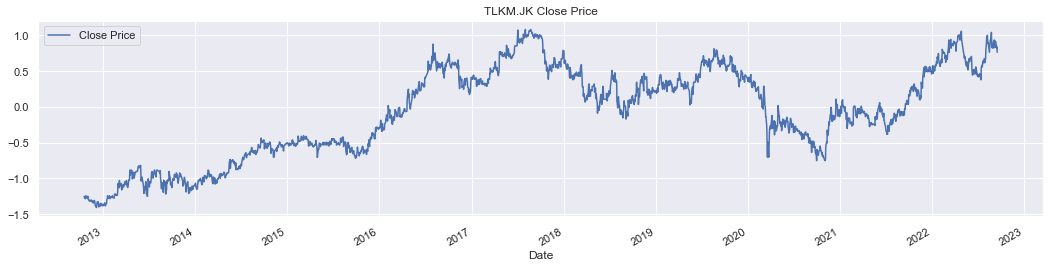

In [3]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('TLKM.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.89521
[1]	validation_0-rmse:0.88785
[2]	validation_0-rmse:0.88056
[3]	validation_0-rmse:0.87334
[4]	validation_0-rmse:0.86623
[5]	validation_0-rmse:0.85916
[6]	validation_0-rmse:0.85216
[7]	validation_0-rmse:0.84531
[8]	validation_0-rmse:0.83845
[9]	validation_0-rmse:0.83167
[10]	validation_0-rmse:0.82503
[11]	validation_0-rmse:0.81845
[12]	validation_0-rmse:0.81187
[13]	validation_0-rmse:0.80536
[14]	validation_0-rmse:0.79898
[15]	validation_0-rmse:0.79260
[16]	validation_0-rmse:0.78635
[17]	validation_0-rmse:0.78010
[18]	validation_0-rmse:0.77392
[19]	validation_0-rmse:0.76786
[20]	validation_0-rmse:0.76180
[21]	validation_0-rmse:0.75587
[22]	validation_0-rmse:0.74972
[23]	validation_0-rmse:0.74384
[24]	validation_0-rmse:0.73809
[25]	validation_0-rmse:0.73211
[26]	validation_0-rmse:0.72641
[27]	validation_0-rmse:0.72095
[28]	validation_0-rmse:0.71507
[29]	validation_0-rmse:0.70960
[30]	validation_0-rmse:0.70413
[31]	validation_0-rmse:0.69842
[32]	validation_0-

[260]	validation_0-rmse:0.20731
[261]	validation_0-rmse:0.20656
[262]	validation_0-rmse:0.20605
[263]	validation_0-rmse:0.20560
[264]	validation_0-rmse:0.20508
[265]	validation_0-rmse:0.20441
[266]	validation_0-rmse:0.20400
[267]	validation_0-rmse:0.20328
[268]	validation_0-rmse:0.20279
[269]	validation_0-rmse:0.20209
[270]	validation_0-rmse:0.20161
[271]	validation_0-rmse:0.20091
[272]	validation_0-rmse:0.20042
[273]	validation_0-rmse:0.19996
[274]	validation_0-rmse:0.19947
[275]	validation_0-rmse:0.19906
[276]	validation_0-rmse:0.19868
[277]	validation_0-rmse:0.19828
[278]	validation_0-rmse:0.19775
[279]	validation_0-rmse:0.19709
[280]	validation_0-rmse:0.19657
[281]	validation_0-rmse:0.19623
[282]	validation_0-rmse:0.19584
[283]	validation_0-rmse:0.19544
[284]	validation_0-rmse:0.19506
[285]	validation_0-rmse:0.19456
[286]	validation_0-rmse:0.19406
[287]	validation_0-rmse:0.19366
[288]	validation_0-rmse:0.19327
[289]	validation_0-rmse:0.19279
[290]	validation_0-rmse:0.19243
[291]	va

[17]	validation_0-rmse:0.75971
[18]	validation_0-rmse:0.75252
[19]	validation_0-rmse:0.74540
[20]	validation_0-rmse:0.73837
[21]	validation_0-rmse:0.73138
[22]	validation_0-rmse:0.72447
[23]	validation_0-rmse:0.71775
[24]	validation_0-rmse:0.71109
[25]	validation_0-rmse:0.70451
[26]	validation_0-rmse:0.69798
[27]	validation_0-rmse:0.69142
[28]	validation_0-rmse:0.68504
[29]	validation_0-rmse:0.67871
[30]	validation_0-rmse:0.67246
[31]	validation_0-rmse:0.66615
[32]	validation_0-rmse:0.66002
[33]	validation_0-rmse:0.65394
[34]	validation_0-rmse:0.64793
[35]	validation_0-rmse:0.64185
[36]	validation_0-rmse:0.63596
[37]	validation_0-rmse:0.63014
[38]	validation_0-rmse:0.62437
[39]	validation_0-rmse:0.61867
[40]	validation_0-rmse:0.61288
[41]	validation_0-rmse:0.60730
[42]	validation_0-rmse:0.60178
[43]	validation_0-rmse:0.59616
[44]	validation_0-rmse:0.59075
[45]	validation_0-rmse:0.58537
[46]	validation_0-rmse:0.57989
[47]	validation_0-rmse:0.57465
[48]	validation_0-rmse:0.56945
[49]	val

[276]	validation_0-rmse:0.08374
[277]	validation_0-rmse:0.08319
[278]	validation_0-rmse:0.08272
[279]	validation_0-rmse:0.08220
[280]	validation_0-rmse:0.08173
[281]	validation_0-rmse:0.08127
[282]	validation_0-rmse:0.08075
[283]	validation_0-rmse:0.08032
[284]	validation_0-rmse:0.07980
[285]	validation_0-rmse:0.07935
[286]	validation_0-rmse:0.07892
[287]	validation_0-rmse:0.07841
[288]	validation_0-rmse:0.07801
[289]	validation_0-rmse:0.07754
[290]	validation_0-rmse:0.07712
[291]	validation_0-rmse:0.07664
[292]	validation_0-rmse:0.07624
[293]	validation_0-rmse:0.07578
[294]	validation_0-rmse:0.07539
[295]	validation_0-rmse:0.07497
[296]	validation_0-rmse:0.07452
[297]	validation_0-rmse:0.07413
[298]	validation_0-rmse:0.07369
[299]	validation_0-rmse:0.07330
[300]	validation_0-rmse:0.07295
[301]	validation_0-rmse:0.07253
[302]	validation_0-rmse:0.07217
[303]	validation_0-rmse:0.07176
[304]	validation_0-rmse:0.07140
[305]	validation_0-rmse:0.07104
[306]	validation_0-rmse:0.07065
[307]	va

[34]	validation_0-rmse:0.64013
[35]	validation_0-rmse:0.63392
[36]	validation_0-rmse:0.62776
[37]	validation_0-rmse:0.62168
[38]	validation_0-rmse:0.61562
[39]	validation_0-rmse:0.60966
[40]	validation_0-rmse:0.60374
[41]	validation_0-rmse:0.59788
[42]	validation_0-rmse:0.59210
[43]	validation_0-rmse:0.58636
[44]	validation_0-rmse:0.58068
[45]	validation_0-rmse:0.57506
[46]	validation_0-rmse:0.56950
[47]	validation_0-rmse:0.56398
[48]	validation_0-rmse:0.55852
[49]	validation_0-rmse:0.55310
[50]	validation_0-rmse:0.54775
[51]	validation_0-rmse:0.54244
[52]	validation_0-rmse:0.53718
[53]	validation_0-rmse:0.53197
[54]	validation_0-rmse:0.52681
[55]	validation_0-rmse:0.52172
[56]	validation_0-rmse:0.51667
[57]	validation_0-rmse:0.51166
[58]	validation_0-rmse:0.50671
[59]	validation_0-rmse:0.50180
[60]	validation_0-rmse:0.49697
[61]	validation_0-rmse:0.49217
[62]	validation_0-rmse:0.48740
[63]	validation_0-rmse:0.48269
[64]	validation_0-rmse:0.47805
[65]	validation_0-rmse:0.47344
[66]	val

[293]	validation_0-rmse:0.06823
[294]	validation_0-rmse:0.06781
[295]	validation_0-rmse:0.06739
[296]	validation_0-rmse:0.06697
[297]	validation_0-rmse:0.06656
[298]	validation_0-rmse:0.06615
[299]	validation_0-rmse:0.06575
[300]	validation_0-rmse:0.06535
[301]	validation_0-rmse:0.06495
[302]	validation_0-rmse:0.06456
[303]	validation_0-rmse:0.06417
[304]	validation_0-rmse:0.06379
[305]	validation_0-rmse:0.06341
[306]	validation_0-rmse:0.06304
[307]	validation_0-rmse:0.06266
[308]	validation_0-rmse:0.06230
[309]	validation_0-rmse:0.06194
[310]	validation_0-rmse:0.06158
[311]	validation_0-rmse:0.06122
[312]	validation_0-rmse:0.06087
[313]	validation_0-rmse:0.06052
[314]	validation_0-rmse:0.06018
[315]	validation_0-rmse:0.05985
[316]	validation_0-rmse:0.05951
[317]	validation_0-rmse:0.05917
[318]	validation_0-rmse:0.05884
[319]	validation_0-rmse:0.05851
[320]	validation_0-rmse:0.05819
[321]	validation_0-rmse:0.05787
[322]	validation_0-rmse:0.05756
[323]	validation_0-rmse:0.05724
[324]	va

[51]	validation_0-rmse:0.54188
[52]	validation_0-rmse:0.53665
[53]	validation_0-rmse:0.53145
[54]	validation_0-rmse:0.52629
[55]	validation_0-rmse:0.52120
[56]	validation_0-rmse:0.51618
[57]	validation_0-rmse:0.51119
[58]	validation_0-rmse:0.50628
[59]	validation_0-rmse:0.50142
[60]	validation_0-rmse:0.49660
[61]	validation_0-rmse:0.49182
[62]	validation_0-rmse:0.48708
[63]	validation_0-rmse:0.48240
[64]	validation_0-rmse:0.47779
[65]	validation_0-rmse:0.47318
[66]	validation_0-rmse:0.46865
[67]	validation_0-rmse:0.46417
[68]	validation_0-rmse:0.45968
[69]	validation_0-rmse:0.45525
[70]	validation_0-rmse:0.45091
[71]	validation_0-rmse:0.44657
[72]	validation_0-rmse:0.44231
[73]	validation_0-rmse:0.43806
[74]	validation_0-rmse:0.43386
[75]	validation_0-rmse:0.42970
[76]	validation_0-rmse:0.42561
[77]	validation_0-rmse:0.42153
[78]	validation_0-rmse:0.41747
[79]	validation_0-rmse:0.41350
[80]	validation_0-rmse:0.40957
[81]	validation_0-rmse:0.40565
[82]	validation_0-rmse:0.40177
[83]	val

[309]	validation_0-rmse:0.06317
[310]	validation_0-rmse:0.06279
[311]	validation_0-rmse:0.06243
[312]	validation_0-rmse:0.06207
[313]	validation_0-rmse:0.06170
[314]	validation_0-rmse:0.06136
[315]	validation_0-rmse:0.06103
[316]	validation_0-rmse:0.06068
[317]	validation_0-rmse:0.06037
[318]	validation_0-rmse:0.06002
[319]	validation_0-rmse:0.05970
[320]	validation_0-rmse:0.05936
[321]	validation_0-rmse:0.05906
[322]	validation_0-rmse:0.05876
[323]	validation_0-rmse:0.05844
[324]	validation_0-rmse:0.05815
[325]	validation_0-rmse:0.05785
[326]	validation_0-rmse:0.05754
[327]	validation_0-rmse:0.05725
[328]	validation_0-rmse:0.05696
[329]	validation_0-rmse:0.05665
[330]	validation_0-rmse:0.05635
[331]	validation_0-rmse:0.05609
[332]	validation_0-rmse:0.05581
[333]	validation_0-rmse:0.05555
[334]	validation_0-rmse:0.05526
[335]	validation_0-rmse:0.05500
[336]	validation_0-rmse:0.05474
[337]	validation_0-rmse:0.05446
[338]	validation_0-rmse:0.05418
[339]	validation_0-rmse:0.05394
[340]	va

[67]	validation_0-rmse:0.46609
[68]	validation_0-rmse:0.46165
[69]	validation_0-rmse:0.45725
[70]	validation_0-rmse:0.45289
[71]	validation_0-rmse:0.44857
[72]	validation_0-rmse:0.44430
[73]	validation_0-rmse:0.44008
[74]	validation_0-rmse:0.43589
[75]	validation_0-rmse:0.43174
[76]	validation_0-rmse:0.42760
[77]	validation_0-rmse:0.42355
[78]	validation_0-rmse:0.41954
[79]	validation_0-rmse:0.41556
[80]	validation_0-rmse:0.41163
[81]	validation_0-rmse:0.40774
[82]	validation_0-rmse:0.40388
[83]	validation_0-rmse:0.40006
[84]	validation_0-rmse:0.39627
[85]	validation_0-rmse:0.39252
[86]	validation_0-rmse:0.38882
[87]	validation_0-rmse:0.38517
[88]	validation_0-rmse:0.38155
[89]	validation_0-rmse:0.37796
[90]	validation_0-rmse:0.37440
[91]	validation_0-rmse:0.37087
[92]	validation_0-rmse:0.36739
[93]	validation_0-rmse:0.36394
[94]	validation_0-rmse:0.36052
[95]	validation_0-rmse:0.35713
[96]	validation_0-rmse:0.35379
[97]	validation_0-rmse:0.35047
[98]	validation_0-rmse:0.34718
[99]	val

[325]	validation_0-rmse:0.06001
[326]	validation_0-rmse:0.05971
[327]	validation_0-rmse:0.05943
[328]	validation_0-rmse:0.05912
[329]	validation_0-rmse:0.05885
[330]	validation_0-rmse:0.05857
[331]	validation_0-rmse:0.05829
[332]	validation_0-rmse:0.05802
[333]	validation_0-rmse:0.05776
[334]	validation_0-rmse:0.05747
[335]	validation_0-rmse:0.05722
[336]	validation_0-rmse:0.05696
[337]	validation_0-rmse:0.05672
[338]	validation_0-rmse:0.05648
[339]	validation_0-rmse:0.05622
[340]	validation_0-rmse:0.05600
[341]	validation_0-rmse:0.05574
[342]	validation_0-rmse:0.05551
[343]	validation_0-rmse:0.05527
[344]	validation_0-rmse:0.05503
[345]	validation_0-rmse:0.05481
[346]	validation_0-rmse:0.05456
[347]	validation_0-rmse:0.05433
[348]	validation_0-rmse:0.05412
[349]	validation_0-rmse:0.05388
[350]	validation_0-rmse:0.05368
[351]	validation_0-rmse:0.05347
[352]	validation_0-rmse:0.05323
[353]	validation_0-rmse:0.05303
[354]	validation_0-rmse:0.05281
[355]	validation_0-rmse:0.05262
[356]	va

[84]	validation_0-rmse:0.47204
[85]	validation_0-rmse:0.46859
[86]	validation_0-rmse:0.46563
[87]	validation_0-rmse:0.46271
[88]	validation_0-rmse:0.45934
[89]	validation_0-rmse:0.45619
[90]	validation_0-rmse:0.45290
[91]	validation_0-rmse:0.45009
[92]	validation_0-rmse:0.44686
[93]	validation_0-rmse:0.44411
[94]	validation_0-rmse:0.44102
[95]	validation_0-rmse:0.43788
[96]	validation_0-rmse:0.43522
[97]	validation_0-rmse:0.43254
[98]	validation_0-rmse:0.42949
[99]	validation_0-rmse:0.42663
[100]	validation_0-rmse:0.42408
[101]	validation_0-rmse:0.42111
[102]	validation_0-rmse:0.41857
[103]	validation_0-rmse:0.41566
[104]	validation_0-rmse:0.41294
[105]	validation_0-rmse:0.41009
[106]	validation_0-rmse:0.40766
[107]	validation_0-rmse:0.40486
[108]	validation_0-rmse:0.40209
[109]	validation_0-rmse:0.39973
[110]	validation_0-rmse:0.39702
[111]	validation_0-rmse:0.39474
[112]	validation_0-rmse:0.39208
[113]	validation_0-rmse:0.38980
[114]	validation_0-rmse:0.38718
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.17533
[342]	validation_0-rmse:0.17493
[343]	validation_0-rmse:0.17478
[344]	validation_0-rmse:0.17439
[345]	validation_0-rmse:0.17397
[346]	validation_0-rmse:0.17376
[347]	validation_0-rmse:0.17351
[348]	validation_0-rmse:0.17329
[349]	validation_0-rmse:0.17289
[350]	validation_0-rmse:0.17259
[351]	validation_0-rmse:0.17245
[352]	validation_0-rmse:0.17208
[353]	validation_0-rmse:0.17188
[354]	validation_0-rmse:0.17151
[355]	validation_0-rmse:0.17132
[356]	validation_0-rmse:0.17119
[357]	validation_0-rmse:0.17100
[358]	validation_0-rmse:0.17064
[359]	validation_0-rmse:0.17046
[360]	validation_0-rmse:0.17033
[361]	validation_0-rmse:0.16998
[362]	validation_0-rmse:0.16980
[363]	validation_0-rmse:0.16966
[364]	validation_0-rmse:0.16947
[365]	validation_0-rmse:0.16912
[366]	validation_0-rmse:0.16895
[367]	validation_0-rmse:0.16881
[368]	validation_0-rmse:0.16848
[369]	validation_0-rmse:0.16837
[370]	validation_0-rmse:0.16824
[371]	validation_0-rmse:0.16790
[372]	va

[598]	validation_0-rmse:0.14359
[599]	validation_0-rmse:0.14353
[0]	validation_0-rmse:0.89399
[1]	validation_0-rmse:0.88542
[2]	validation_0-rmse:0.87693
[3]	validation_0-rmse:0.86853
[4]	validation_0-rmse:0.86021
[5]	validation_0-rmse:0.85199
[6]	validation_0-rmse:0.84384
[7]	validation_0-rmse:0.83579
[8]	validation_0-rmse:0.82779
[9]	validation_0-rmse:0.81990
[10]	validation_0-rmse:0.81209
[11]	validation_0-rmse:0.80439
[12]	validation_0-rmse:0.79674
[13]	validation_0-rmse:0.78916
[14]	validation_0-rmse:0.78171
[15]	validation_0-rmse:0.77431
[16]	validation_0-rmse:0.76697
[17]	validation_0-rmse:0.75971
[18]	validation_0-rmse:0.75252
[19]	validation_0-rmse:0.74540
[20]	validation_0-rmse:0.73837
[21]	validation_0-rmse:0.73138
[22]	validation_0-rmse:0.72447
[23]	validation_0-rmse:0.71775
[24]	validation_0-rmse:0.71109
[25]	validation_0-rmse:0.70451
[26]	validation_0-rmse:0.69798
[27]	validation_0-rmse:0.69142
[28]	validation_0-rmse:0.68504
[29]	validation_0-rmse:0.67871
[30]	validation_

[258]	validation_0-rmse:0.09351
[259]	validation_0-rmse:0.09295
[260]	validation_0-rmse:0.09236
[261]	validation_0-rmse:0.09170
[262]	validation_0-rmse:0.09114
[263]	validation_0-rmse:0.09056
[264]	validation_0-rmse:0.09000
[265]	validation_0-rmse:0.08937
[266]	validation_0-rmse:0.08885
[267]	validation_0-rmse:0.08833
[268]	validation_0-rmse:0.08780
[269]	validation_0-rmse:0.08729
[270]	validation_0-rmse:0.08677
[271]	validation_0-rmse:0.08620
[272]	validation_0-rmse:0.08570
[273]	validation_0-rmse:0.08521
[274]	validation_0-rmse:0.08469
[275]	validation_0-rmse:0.08422
[276]	validation_0-rmse:0.08374
[277]	validation_0-rmse:0.08319
[278]	validation_0-rmse:0.08272
[279]	validation_0-rmse:0.08220
[280]	validation_0-rmse:0.08173
[281]	validation_0-rmse:0.08127
[282]	validation_0-rmse:0.08075
[283]	validation_0-rmse:0.08032
[284]	validation_0-rmse:0.07980
[285]	validation_0-rmse:0.07935
[286]	validation_0-rmse:0.07892
[287]	validation_0-rmse:0.07841
[288]	validation_0-rmse:0.07801
[289]	va

[515]	validation_0-rmse:0.04197
[516]	validation_0-rmse:0.04193
[517]	validation_0-rmse:0.04190
[518]	validation_0-rmse:0.04187
[519]	validation_0-rmse:0.04182
[520]	validation_0-rmse:0.04179
[521]	validation_0-rmse:0.04175
[522]	validation_0-rmse:0.04172
[523]	validation_0-rmse:0.04168
[524]	validation_0-rmse:0.04164
[525]	validation_0-rmse:0.04160
[526]	validation_0-rmse:0.04158
[527]	validation_0-rmse:0.04155
[528]	validation_0-rmse:0.04151
[529]	validation_0-rmse:0.04149
[530]	validation_0-rmse:0.04145
[531]	validation_0-rmse:0.04141
[532]	validation_0-rmse:0.04138
[533]	validation_0-rmse:0.04136
[534]	validation_0-rmse:0.04133
[535]	validation_0-rmse:0.04129
[536]	validation_0-rmse:0.04127
[537]	validation_0-rmse:0.04123
[538]	validation_0-rmse:0.04121
[539]	validation_0-rmse:0.04117
[540]	validation_0-rmse:0.04115
[541]	validation_0-rmse:0.04111
[542]	validation_0-rmse:0.04109
[543]	validation_0-rmse:0.04107
[544]	validation_0-rmse:0.04103
[545]	validation_0-rmse:0.04100
[546]	va

[175]	validation_0-rmse:0.16936
[176]	validation_0-rmse:0.16788
[177]	validation_0-rmse:0.16643
[178]	validation_0-rmse:0.16496
[179]	validation_0-rmse:0.16353
[180]	validation_0-rmse:0.16210
[181]	validation_0-rmse:0.16071
[182]	validation_0-rmse:0.15931
[183]	validation_0-rmse:0.15795
[184]	validation_0-rmse:0.15659
[185]	validation_0-rmse:0.15523
[186]	validation_0-rmse:0.15389
[187]	validation_0-rmse:0.15258
[188]	validation_0-rmse:0.15128
[189]	validation_0-rmse:0.14997
[190]	validation_0-rmse:0.14870
[191]	validation_0-rmse:0.14741
[192]	validation_0-rmse:0.14614
[193]	validation_0-rmse:0.14491
[194]	validation_0-rmse:0.14369
[195]	validation_0-rmse:0.14245
[196]	validation_0-rmse:0.14126
[197]	validation_0-rmse:0.14007
[198]	validation_0-rmse:0.13890
[199]	validation_0-rmse:0.13771
[200]	validation_0-rmse:0.13657
[201]	validation_0-rmse:0.13541
[202]	validation_0-rmse:0.13429
[203]	validation_0-rmse:0.13316
[204]	validation_0-rmse:0.13203
[205]	validation_0-rmse:0.13095
[206]	va

[432]	validation_0-rmse:0.03761
[433]	validation_0-rmse:0.03752
[434]	validation_0-rmse:0.03742
[435]	validation_0-rmse:0.03733
[436]	validation_0-rmse:0.03724
[437]	validation_0-rmse:0.03714
[438]	validation_0-rmse:0.03706
[439]	validation_0-rmse:0.03698
[440]	validation_0-rmse:0.03688
[441]	validation_0-rmse:0.03680
[442]	validation_0-rmse:0.03672
[443]	validation_0-rmse:0.03662
[444]	validation_0-rmse:0.03655
[445]	validation_0-rmse:0.03646
[446]	validation_0-rmse:0.03638
[447]	validation_0-rmse:0.03629
[448]	validation_0-rmse:0.03621
[449]	validation_0-rmse:0.03614
[450]	validation_0-rmse:0.03606
[451]	validation_0-rmse:0.03598
[452]	validation_0-rmse:0.03589
[453]	validation_0-rmse:0.03582
[454]	validation_0-rmse:0.03574
[455]	validation_0-rmse:0.03567
[456]	validation_0-rmse:0.03559
[457]	validation_0-rmse:0.03552
[458]	validation_0-rmse:0.03546
[459]	validation_0-rmse:0.03538
[460]	validation_0-rmse:0.03531
[461]	validation_0-rmse:0.03524
[462]	validation_0-rmse:0.03517
[463]	va

[92]	validation_0-rmse:0.36517
[93]	validation_0-rmse:0.36172
[94]	validation_0-rmse:0.35829
[95]	validation_0-rmse:0.35492
[96]	validation_0-rmse:0.35157
[97]	validation_0-rmse:0.34824
[98]	validation_0-rmse:0.34497
[99]	validation_0-rmse:0.34174
[100]	validation_0-rmse:0.33849
[101]	validation_0-rmse:0.33530
[102]	validation_0-rmse:0.33213
[103]	validation_0-rmse:0.32901
[104]	validation_0-rmse:0.32591
[105]	validation_0-rmse:0.32286
[106]	validation_0-rmse:0.31982
[107]	validation_0-rmse:0.31682
[108]	validation_0-rmse:0.31386
[109]	validation_0-rmse:0.31094
[110]	validation_0-rmse:0.30799
[111]	validation_0-rmse:0.30510
[112]	validation_0-rmse:0.30226
[113]	validation_0-rmse:0.29943
[114]	validation_0-rmse:0.29665
[115]	validation_0-rmse:0.29385
[116]	validation_0-rmse:0.29111
[117]	validation_0-rmse:0.28841
[118]	validation_0-rmse:0.28572
[119]	validation_0-rmse:0.28304
[120]	validation_0-rmse:0.28041
[121]	validation_0-rmse:0.27783
[122]	validation_0-rmse:0.27522
[123]	validation

[349]	validation_0-rmse:0.05147
[350]	validation_0-rmse:0.05124
[351]	validation_0-rmse:0.05101
[352]	validation_0-rmse:0.05081
[353]	validation_0-rmse:0.05060
[354]	validation_0-rmse:0.05038
[355]	validation_0-rmse:0.05015
[356]	validation_0-rmse:0.04993
[357]	validation_0-rmse:0.04973
[358]	validation_0-rmse:0.04953
[359]	validation_0-rmse:0.04933
[360]	validation_0-rmse:0.04911
[361]	validation_0-rmse:0.04892
[362]	validation_0-rmse:0.04872
[363]	validation_0-rmse:0.04850
[364]	validation_0-rmse:0.04831
[365]	validation_0-rmse:0.04813
[366]	validation_0-rmse:0.04791
[367]	validation_0-rmse:0.04773
[368]	validation_0-rmse:0.04755
[369]	validation_0-rmse:0.04737
[370]	validation_0-rmse:0.04717
[371]	validation_0-rmse:0.04700
[372]	validation_0-rmse:0.04684
[373]	validation_0-rmse:0.04665
[374]	validation_0-rmse:0.04648
[375]	validation_0-rmse:0.04632
[376]	validation_0-rmse:0.04617
[377]	validation_0-rmse:0.04598
[378]	validation_0-rmse:0.04583
[379]	validation_0-rmse:0.04567
[380]	va

[6]	validation_0-rmse:0.84300
[7]	validation_0-rmse:0.83480
[8]	validation_0-rmse:0.82671
[9]	validation_0-rmse:0.81867
[10]	validation_0-rmse:0.81072
[11]	validation_0-rmse:0.80282
[12]	validation_0-rmse:0.79505
[13]	validation_0-rmse:0.78730
[14]	validation_0-rmse:0.77966
[15]	validation_0-rmse:0.77209
[16]	validation_0-rmse:0.76458
[17]	validation_0-rmse:0.75714
[18]	validation_0-rmse:0.74980
[19]	validation_0-rmse:0.74254
[20]	validation_0-rmse:0.73528
[21]	validation_0-rmse:0.72813
[22]	validation_0-rmse:0.72105
[23]	validation_0-rmse:0.71408
[24]	validation_0-rmse:0.70714
[25]	validation_0-rmse:0.70028
[26]	validation_0-rmse:0.69348
[27]	validation_0-rmse:0.68676
[28]	validation_0-rmse:0.68010
[29]	validation_0-rmse:0.67350
[30]	validation_0-rmse:0.66696
[31]	validation_0-rmse:0.66048
[32]	validation_0-rmse:0.65408
[33]	validation_0-rmse:0.64775
[34]	validation_0-rmse:0.64147
[35]	validation_0-rmse:0.63525
[36]	validation_0-rmse:0.62910
[37]	validation_0-rmse:0.62303
[38]	validat

[266]	validation_0-rmse:0.08467
[267]	validation_0-rmse:0.08412
[268]	validation_0-rmse:0.08355
[269]	validation_0-rmse:0.08298
[270]	validation_0-rmse:0.08245
[271]	validation_0-rmse:0.08190
[272]	validation_0-rmse:0.08136
[273]	validation_0-rmse:0.08082
[274]	validation_0-rmse:0.08028
[275]	validation_0-rmse:0.07979
[276]	validation_0-rmse:0.07927
[277]	validation_0-rmse:0.07875
[278]	validation_0-rmse:0.07827
[279]	validation_0-rmse:0.07776
[280]	validation_0-rmse:0.07727
[281]	validation_0-rmse:0.07678
[282]	validation_0-rmse:0.07631
[283]	validation_0-rmse:0.07584
[284]	validation_0-rmse:0.07536
[285]	validation_0-rmse:0.07491
[286]	validation_0-rmse:0.07445
[287]	validation_0-rmse:0.07399
[288]	validation_0-rmse:0.07355
[289]	validation_0-rmse:0.07311
[290]	validation_0-rmse:0.07267
[291]	validation_0-rmse:0.07222
[292]	validation_0-rmse:0.07179
[293]	validation_0-rmse:0.07138
[294]	validation_0-rmse:0.07095
[295]	validation_0-rmse:0.07056
[296]	validation_0-rmse:0.07014
[297]	va

[523]	validation_0-rmse:0.03653
[524]	validation_0-rmse:0.03648
[525]	validation_0-rmse:0.03644
[526]	validation_0-rmse:0.03641
[527]	validation_0-rmse:0.03637
[528]	validation_0-rmse:0.03633
[529]	validation_0-rmse:0.03630
[530]	validation_0-rmse:0.03626
[531]	validation_0-rmse:0.03622
[532]	validation_0-rmse:0.03618
[533]	validation_0-rmse:0.03615
[534]	validation_0-rmse:0.03612
[535]	validation_0-rmse:0.03610
[536]	validation_0-rmse:0.03606
[537]	validation_0-rmse:0.03603
[538]	validation_0-rmse:0.03599
[539]	validation_0-rmse:0.03596
[540]	validation_0-rmse:0.03593
[541]	validation_0-rmse:0.03589
[542]	validation_0-rmse:0.03586
[543]	validation_0-rmse:0.03583
[544]	validation_0-rmse:0.03579
[545]	validation_0-rmse:0.03576
[546]	validation_0-rmse:0.03573
[547]	validation_0-rmse:0.03570
[548]	validation_0-rmse:0.03566
[549]	validation_0-rmse:0.03563
[550]	validation_0-rmse:0.03560
[551]	validation_0-rmse:0.03557
[552]	validation_0-rmse:0.03555
[553]	validation_0-rmse:0.03551
[554]	va

[182]	validation_0-rmse:0.27048
[183]	validation_0-rmse:0.26950
[184]	validation_0-rmse:0.26849
[185]	validation_0-rmse:0.26712
[186]	validation_0-rmse:0.26617
[187]	validation_0-rmse:0.26489
[188]	validation_0-rmse:0.26392
[189]	validation_0-rmse:0.26285
[190]	validation_0-rmse:0.26195
[191]	validation_0-rmse:0.26072
[192]	validation_0-rmse:0.25978
[193]	validation_0-rmse:0.25876
[194]	validation_0-rmse:0.25789
[195]	validation_0-rmse:0.25698
[196]	validation_0-rmse:0.25580
[197]	validation_0-rmse:0.25456
[198]	validation_0-rmse:0.25344
[199]	validation_0-rmse:0.25258
[200]	validation_0-rmse:0.25177
[201]	validation_0-rmse:0.25077
[202]	validation_0-rmse:0.24960
[203]	validation_0-rmse:0.24849
[204]	validation_0-rmse:0.24733
[205]	validation_0-rmse:0.24656
[206]	validation_0-rmse:0.24549
[207]	validation_0-rmse:0.24468
[208]	validation_0-rmse:0.24380
[209]	validation_0-rmse:0.24303
[210]	validation_0-rmse:0.24192
[211]	validation_0-rmse:0.24099
[212]	validation_0-rmse:0.24015
[213]	va

[439]	validation_0-rmse:0.15648
[440]	validation_0-rmse:0.15637
[441]	validation_0-rmse:0.15631
[442]	validation_0-rmse:0.15610
[443]	validation_0-rmse:0.15605
[444]	validation_0-rmse:0.15582
[445]	validation_0-rmse:0.15575
[446]	validation_0-rmse:0.15553
[447]	validation_0-rmse:0.15548
[448]	validation_0-rmse:0.15527
[449]	validation_0-rmse:0.15521
[450]	validation_0-rmse:0.15500
[451]	validation_0-rmse:0.15495
[452]	validation_0-rmse:0.15475
[453]	validation_0-rmse:0.15468
[454]	validation_0-rmse:0.15463
[455]	validation_0-rmse:0.15443
[456]	validation_0-rmse:0.15431
[457]	validation_0-rmse:0.15411
[458]	validation_0-rmse:0.15407
[459]	validation_0-rmse:0.15387
[460]	validation_0-rmse:0.15383
[461]	validation_0-rmse:0.15377
[462]	validation_0-rmse:0.15358
[463]	validation_0-rmse:0.15354
[464]	validation_0-rmse:0.15347
[465]	validation_0-rmse:0.15328
[466]	validation_0-rmse:0.15324
[467]	validation_0-rmse:0.15306
[468]	validation_0-rmse:0.15299
[469]	validation_0-rmse:0.15281
[470]	va

[696]	validation_0-rmse:0.14050
[697]	validation_0-rmse:0.14050
[698]	validation_0-rmse:0.14044
[699]	validation_0-rmse:0.14044
[0]	validation_0-rmse:0.89399
[1]	validation_0-rmse:0.88542
[2]	validation_0-rmse:0.87693
[3]	validation_0-rmse:0.86853
[4]	validation_0-rmse:0.86021
[5]	validation_0-rmse:0.85199
[6]	validation_0-rmse:0.84384
[7]	validation_0-rmse:0.83579
[8]	validation_0-rmse:0.82779
[9]	validation_0-rmse:0.81990
[10]	validation_0-rmse:0.81209
[11]	validation_0-rmse:0.80439
[12]	validation_0-rmse:0.79674
[13]	validation_0-rmse:0.78916
[14]	validation_0-rmse:0.78171
[15]	validation_0-rmse:0.77431
[16]	validation_0-rmse:0.76697
[17]	validation_0-rmse:0.75971
[18]	validation_0-rmse:0.75252
[19]	validation_0-rmse:0.74540
[20]	validation_0-rmse:0.73837
[21]	validation_0-rmse:0.73138
[22]	validation_0-rmse:0.72447
[23]	validation_0-rmse:0.71775
[24]	validation_0-rmse:0.71109
[25]	validation_0-rmse:0.70451
[26]	validation_0-rmse:0.69798
[27]	validation_0-rmse:0.69142
[28]	validatio

[256]	validation_0-rmse:0.09470
[257]	validation_0-rmse:0.09412
[258]	validation_0-rmse:0.09351
[259]	validation_0-rmse:0.09295
[260]	validation_0-rmse:0.09236
[261]	validation_0-rmse:0.09170
[262]	validation_0-rmse:0.09114
[263]	validation_0-rmse:0.09056
[264]	validation_0-rmse:0.09000
[265]	validation_0-rmse:0.08937
[266]	validation_0-rmse:0.08885
[267]	validation_0-rmse:0.08833
[268]	validation_0-rmse:0.08780
[269]	validation_0-rmse:0.08729
[270]	validation_0-rmse:0.08677
[271]	validation_0-rmse:0.08620
[272]	validation_0-rmse:0.08570
[273]	validation_0-rmse:0.08521
[274]	validation_0-rmse:0.08469
[275]	validation_0-rmse:0.08422
[276]	validation_0-rmse:0.08374
[277]	validation_0-rmse:0.08319
[278]	validation_0-rmse:0.08272
[279]	validation_0-rmse:0.08220
[280]	validation_0-rmse:0.08173
[281]	validation_0-rmse:0.08127
[282]	validation_0-rmse:0.08075
[283]	validation_0-rmse:0.08032
[284]	validation_0-rmse:0.07980
[285]	validation_0-rmse:0.07935
[286]	validation_0-rmse:0.07892
[287]	va

[513]	validation_0-rmse:0.04203
[514]	validation_0-rmse:0.04200
[515]	validation_0-rmse:0.04197
[516]	validation_0-rmse:0.04193
[517]	validation_0-rmse:0.04190
[518]	validation_0-rmse:0.04187
[519]	validation_0-rmse:0.04182
[520]	validation_0-rmse:0.04179
[521]	validation_0-rmse:0.04175
[522]	validation_0-rmse:0.04172
[523]	validation_0-rmse:0.04168
[524]	validation_0-rmse:0.04164
[525]	validation_0-rmse:0.04160
[526]	validation_0-rmse:0.04158
[527]	validation_0-rmse:0.04155
[528]	validation_0-rmse:0.04151
[529]	validation_0-rmse:0.04149
[530]	validation_0-rmse:0.04145
[531]	validation_0-rmse:0.04141
[532]	validation_0-rmse:0.04138
[533]	validation_0-rmse:0.04136
[534]	validation_0-rmse:0.04133
[535]	validation_0-rmse:0.04129
[536]	validation_0-rmse:0.04127
[537]	validation_0-rmse:0.04123
[538]	validation_0-rmse:0.04121
[539]	validation_0-rmse:0.04117
[540]	validation_0-rmse:0.04115
[541]	validation_0-rmse:0.04111
[542]	validation_0-rmse:0.04109
[543]	validation_0-rmse:0.04107
[544]	va

[72]	validation_0-rmse:0.44241
[73]	validation_0-rmse:0.43816
[74]	validation_0-rmse:0.43395
[75]	validation_0-rmse:0.42978
[76]	validation_0-rmse:0.42565
[77]	validation_0-rmse:0.42156
[78]	validation_0-rmse:0.41753
[79]	validation_0-rmse:0.41352
[80]	validation_0-rmse:0.40955
[81]	validation_0-rmse:0.40562
[82]	validation_0-rmse:0.40172
[83]	validation_0-rmse:0.39788
[84]	validation_0-rmse:0.39407
[85]	validation_0-rmse:0.39031
[86]	validation_0-rmse:0.38656
[87]	validation_0-rmse:0.38285
[88]	validation_0-rmse:0.37917
[89]	validation_0-rmse:0.37555
[90]	validation_0-rmse:0.37196
[91]	validation_0-rmse:0.36841
[92]	validation_0-rmse:0.36490
[93]	validation_0-rmse:0.36141
[94]	validation_0-rmse:0.35797
[95]	validation_0-rmse:0.35457
[96]	validation_0-rmse:0.35119
[97]	validation_0-rmse:0.34786
[98]	validation_0-rmse:0.34455
[99]	validation_0-rmse:0.34129
[100]	validation_0-rmse:0.33805
[101]	validation_0-rmse:0.33484
[102]	validation_0-rmse:0.33168
[103]	validation_0-rmse:0.32854
[104

[329]	validation_0-rmse:0.05544
[330]	validation_0-rmse:0.05515
[331]	validation_0-rmse:0.05486
[332]	validation_0-rmse:0.05459
[333]	validation_0-rmse:0.05430
[334]	validation_0-rmse:0.05403
[335]	validation_0-rmse:0.05376
[336]	validation_0-rmse:0.05349
[337]	validation_0-rmse:0.05321
[338]	validation_0-rmse:0.05296
[339]	validation_0-rmse:0.05270
[340]	validation_0-rmse:0.05244
[341]	validation_0-rmse:0.05218
[342]	validation_0-rmse:0.05193
[343]	validation_0-rmse:0.05168
[344]	validation_0-rmse:0.05143
[345]	validation_0-rmse:0.05119
[346]	validation_0-rmse:0.05095
[347]	validation_0-rmse:0.05070
[348]	validation_0-rmse:0.05047
[349]	validation_0-rmse:0.05024
[350]	validation_0-rmse:0.05001
[351]	validation_0-rmse:0.04978
[352]	validation_0-rmse:0.04955
[353]	validation_0-rmse:0.04932
[354]	validation_0-rmse:0.04911
[355]	validation_0-rmse:0.04889
[356]	validation_0-rmse:0.04867
[357]	validation_0-rmse:0.04845
[358]	validation_0-rmse:0.04825
[359]	validation_0-rmse:0.04803
[360]	va

[586]	validation_0-rmse:0.03015
[587]	validation_0-rmse:0.03012
[588]	validation_0-rmse:0.03010
[589]	validation_0-rmse:0.03007
[590]	validation_0-rmse:0.03005
[591]	validation_0-rmse:0.03002
[592]	validation_0-rmse:0.02999
[593]	validation_0-rmse:0.02997
[594]	validation_0-rmse:0.02995
[595]	validation_0-rmse:0.02992
[596]	validation_0-rmse:0.02991
[597]	validation_0-rmse:0.02988
[598]	validation_0-rmse:0.02987
[599]	validation_0-rmse:0.02984
[600]	validation_0-rmse:0.02982
[601]	validation_0-rmse:0.02980
[602]	validation_0-rmse:0.02978
[603]	validation_0-rmse:0.02976
[604]	validation_0-rmse:0.02974
[605]	validation_0-rmse:0.02972
[606]	validation_0-rmse:0.02970
[607]	validation_0-rmse:0.02968
[608]	validation_0-rmse:0.02966
[609]	validation_0-rmse:0.02963
[610]	validation_0-rmse:0.02961
[611]	validation_0-rmse:0.02959
[612]	validation_0-rmse:0.02957
[613]	validation_0-rmse:0.02955
[614]	validation_0-rmse:0.02952
[615]	validation_0-rmse:0.02950
[616]	validation_0-rmse:0.02948
[617]	va

[146]	validation_0-rmse:0.22048
[147]	validation_0-rmse:0.21848
[148]	validation_0-rmse:0.21648
[149]	validation_0-rmse:0.21454
[150]	validation_0-rmse:0.21259
[151]	validation_0-rmse:0.21069
[152]	validation_0-rmse:0.20877
[153]	validation_0-rmse:0.20691
[154]	validation_0-rmse:0.20505
[155]	validation_0-rmse:0.20320
[156]	validation_0-rmse:0.20138
[157]	validation_0-rmse:0.19959
[158]	validation_0-rmse:0.19782
[159]	validation_0-rmse:0.19605
[160]	validation_0-rmse:0.19428
[161]	validation_0-rmse:0.19257
[162]	validation_0-rmse:0.19085
[163]	validation_0-rmse:0.18914
[164]	validation_0-rmse:0.18745
[165]	validation_0-rmse:0.18580
[166]	validation_0-rmse:0.18416
[167]	validation_0-rmse:0.18253
[168]	validation_0-rmse:0.18091
[169]	validation_0-rmse:0.17933
[170]	validation_0-rmse:0.17776
[171]	validation_0-rmse:0.17620
[172]	validation_0-rmse:0.17466
[173]	validation_0-rmse:0.17315
[174]	validation_0-rmse:0.17163
[175]	validation_0-rmse:0.17014
[176]	validation_0-rmse:0.16865
[177]	va

[403]	validation_0-rmse:0.04219
[404]	validation_0-rmse:0.04205
[405]	validation_0-rmse:0.04193
[406]	validation_0-rmse:0.04181
[407]	validation_0-rmse:0.04167
[408]	validation_0-rmse:0.04157
[409]	validation_0-rmse:0.04144
[410]	validation_0-rmse:0.04132
[411]	validation_0-rmse:0.04122
[412]	validation_0-rmse:0.04108
[413]	validation_0-rmse:0.04099
[414]	validation_0-rmse:0.04088
[415]	validation_0-rmse:0.04077
[416]	validation_0-rmse:0.04069
[417]	validation_0-rmse:0.04055
[418]	validation_0-rmse:0.04045
[419]	validation_0-rmse:0.04037
[420]	validation_0-rmse:0.04024
[421]	validation_0-rmse:0.04012
[422]	validation_0-rmse:0.04003
[423]	validation_0-rmse:0.03991
[424]	validation_0-rmse:0.03983
[425]	validation_0-rmse:0.03974
[426]	validation_0-rmse:0.03962
[427]	validation_0-rmse:0.03954
[428]	validation_0-rmse:0.03945
[429]	validation_0-rmse:0.03937
[430]	validation_0-rmse:0.03926
[431]	validation_0-rmse:0.03917
[432]	validation_0-rmse:0.03906
[433]	validation_0-rmse:0.03897
[434]	va

[660]	validation_0-rmse:0.03011
[661]	validation_0-rmse:0.03010
[662]	validation_0-rmse:0.03008
[663]	validation_0-rmse:0.03005
[664]	validation_0-rmse:0.03004
[665]	validation_0-rmse:0.03001
[666]	validation_0-rmse:0.03000
[667]	validation_0-rmse:0.02998
[668]	validation_0-rmse:0.02996
[669]	validation_0-rmse:0.02994
[670]	validation_0-rmse:0.02992
[671]	validation_0-rmse:0.02991
[672]	validation_0-rmse:0.02989
[673]	validation_0-rmse:0.02988
[674]	validation_0-rmse:0.02986
[675]	validation_0-rmse:0.02985
[676]	validation_0-rmse:0.02982
[677]	validation_0-rmse:0.02981
[678]	validation_0-rmse:0.02978
[679]	validation_0-rmse:0.02977
[680]	validation_0-rmse:0.02976
[681]	validation_0-rmse:0.02974
[682]	validation_0-rmse:0.02973
[683]	validation_0-rmse:0.02971
[684]	validation_0-rmse:0.02969
[685]	validation_0-rmse:0.02967
[686]	validation_0-rmse:0.02966
[687]	validation_0-rmse:0.02964
[688]	validation_0-rmse:0.02963
[689]	validation_0-rmse:0.02962
[690]	validation_0-rmse:0.02961
[691]	va

[220]	validation_0-rmse:0.11873
[221]	validation_0-rmse:0.11778
[222]	validation_0-rmse:0.11685
[223]	validation_0-rmse:0.11594
[224]	validation_0-rmse:0.11506
[225]	validation_0-rmse:0.11415
[226]	validation_0-rmse:0.11327
[227]	validation_0-rmse:0.11240
[228]	validation_0-rmse:0.11153
[229]	validation_0-rmse:0.11069
[230]	validation_0-rmse:0.10985
[231]	validation_0-rmse:0.10900
[232]	validation_0-rmse:0.10817
[233]	validation_0-rmse:0.10734
[234]	validation_0-rmse:0.10654
[235]	validation_0-rmse:0.10574
[236]	validation_0-rmse:0.10493
[237]	validation_0-rmse:0.10415
[238]	validation_0-rmse:0.10337
[239]	validation_0-rmse:0.10259
[240]	validation_0-rmse:0.10184
[241]	validation_0-rmse:0.10111
[242]	validation_0-rmse:0.10035
[243]	validation_0-rmse:0.09961
[244]	validation_0-rmse:0.09888
[245]	validation_0-rmse:0.09818
[246]	validation_0-rmse:0.09746
[247]	validation_0-rmse:0.09675
[248]	validation_0-rmse:0.09605
[249]	validation_0-rmse:0.09536
[250]	validation_0-rmse:0.09467
[251]	va

[477]	validation_0-rmse:0.03860
[478]	validation_0-rmse:0.03854
[479]	validation_0-rmse:0.03848
[480]	validation_0-rmse:0.03843
[481]	validation_0-rmse:0.03837
[482]	validation_0-rmse:0.03833
[483]	validation_0-rmse:0.03828
[484]	validation_0-rmse:0.03822
[485]	validation_0-rmse:0.03817
[486]	validation_0-rmse:0.03812
[487]	validation_0-rmse:0.03806
[488]	validation_0-rmse:0.03801
[489]	validation_0-rmse:0.03796
[490]	validation_0-rmse:0.03791
[491]	validation_0-rmse:0.03786
[492]	validation_0-rmse:0.03782
[493]	validation_0-rmse:0.03776
[494]	validation_0-rmse:0.03772
[495]	validation_0-rmse:0.03767
[496]	validation_0-rmse:0.03762
[497]	validation_0-rmse:0.03757
[498]	validation_0-rmse:0.03753
[499]	validation_0-rmse:0.03749
[500]	validation_0-rmse:0.03745
[501]	validation_0-rmse:0.03739
[502]	validation_0-rmse:0.03735
[503]	validation_0-rmse:0.03731
[504]	validation_0-rmse:0.03726
[505]	validation_0-rmse:0.03722
[506]	validation_0-rmse:0.03718
[507]	validation_0-rmse:0.03713
[508]	va

[35]	validation_0-rmse:0.67734
[36]	validation_0-rmse:0.67190
[37]	validation_0-rmse:0.66686
[38]	validation_0-rmse:0.66153
[39]	validation_0-rmse:0.65633
[40]	validation_0-rmse:0.65145
[41]	validation_0-rmse:0.64627
[42]	validation_0-rmse:0.64115
[43]	validation_0-rmse:0.63651
[44]	validation_0-rmse:0.63140
[45]	validation_0-rmse:0.62670
[46]	validation_0-rmse:0.62169
[47]	validation_0-rmse:0.61708
[48]	validation_0-rmse:0.61216
[49]	validation_0-rmse:0.60746
[50]	validation_0-rmse:0.60314
[51]	validation_0-rmse:0.59837
[52]	validation_0-rmse:0.59364
[53]	validation_0-rmse:0.58933
[54]	validation_0-rmse:0.58510
[55]	validation_0-rmse:0.58050
[56]	validation_0-rmse:0.57630
[57]	validation_0-rmse:0.57180
[58]	validation_0-rmse:0.56752
[59]	validation_0-rmse:0.56326
[60]	validation_0-rmse:0.55888
[61]	validation_0-rmse:0.55503
[62]	validation_0-rmse:0.55074
[63]	validation_0-rmse:0.54697
[64]	validation_0-rmse:0.54276
[65]	validation_0-rmse:0.53907
[66]	validation_0-rmse:0.53494
[67]	val

[293]	validation_0-rmse:0.19135
[294]	validation_0-rmse:0.19089
[295]	validation_0-rmse:0.19054
[296]	validation_0-rmse:0.19027
[297]	validation_0-rmse:0.18981
[298]	validation_0-rmse:0.18948
[299]	validation_0-rmse:0.18913
[300]	validation_0-rmse:0.18876
[301]	validation_0-rmse:0.18841
[302]	validation_0-rmse:0.18806
[303]	validation_0-rmse:0.18771
[304]	validation_0-rmse:0.18737
[305]	validation_0-rmse:0.18703
[306]	validation_0-rmse:0.18669
[307]	validation_0-rmse:0.18636
[308]	validation_0-rmse:0.18599
[309]	validation_0-rmse:0.18565
[310]	validation_0-rmse:0.18524
[311]	validation_0-rmse:0.18477
[312]	validation_0-rmse:0.18433
[313]	validation_0-rmse:0.18402
[314]	validation_0-rmse:0.18373
[315]	validation_0-rmse:0.18343
[316]	validation_0-rmse:0.18298
[317]	validation_0-rmse:0.18253
[318]	validation_0-rmse:0.18234
[319]	validation_0-rmse:0.18205
[320]	validation_0-rmse:0.18185
[321]	validation_0-rmse:0.18148
[322]	validation_0-rmse:0.18129
[323]	validation_0-rmse:0.18083
[324]	va

[550]	validation_0-rmse:0.14606
[551]	validation_0-rmse:0.14602
[552]	validation_0-rmse:0.14590
[553]	validation_0-rmse:0.14584
[554]	validation_0-rmse:0.14581
[555]	validation_0-rmse:0.14578
[556]	validation_0-rmse:0.14576
[557]	validation_0-rmse:0.14566
[558]	validation_0-rmse:0.14556
[559]	validation_0-rmse:0.14546
[560]	validation_0-rmse:0.14539
[561]	validation_0-rmse:0.14537
[562]	validation_0-rmse:0.14534
[563]	validation_0-rmse:0.14529
[564]	validation_0-rmse:0.14528
[565]	validation_0-rmse:0.14517
[566]	validation_0-rmse:0.14515
[567]	validation_0-rmse:0.14504
[568]	validation_0-rmse:0.14494
[569]	validation_0-rmse:0.14493
[570]	validation_0-rmse:0.14491
[571]	validation_0-rmse:0.14489
[572]	validation_0-rmse:0.14479
[573]	validation_0-rmse:0.14468
[574]	validation_0-rmse:0.14466
[575]	validation_0-rmse:0.14460
[576]	validation_0-rmse:0.14457
[577]	validation_0-rmse:0.14448
[578]	validation_0-rmse:0.14446
[579]	validation_0-rmse:0.14438
[580]	validation_0-rmse:0.14431
[581]	va

[807]	validation_0-rmse:0.13888
[808]	validation_0-rmse:0.13888
[809]	validation_0-rmse:0.13884
[810]	validation_0-rmse:0.13884
[811]	validation_0-rmse:0.13884
[812]	validation_0-rmse:0.13884
[813]	validation_0-rmse:0.13883
[814]	validation_0-rmse:0.13883
[815]	validation_0-rmse:0.13883
[816]	validation_0-rmse:0.13883
[817]	validation_0-rmse:0.13882
[818]	validation_0-rmse:0.13882
[819]	validation_0-rmse:0.13879
[820]	validation_0-rmse:0.13879
[821]	validation_0-rmse:0.13878
[822]	validation_0-rmse:0.13878
[823]	validation_0-rmse:0.13878
[824]	validation_0-rmse:0.13878
[825]	validation_0-rmse:0.13877
[826]	validation_0-rmse:0.13872
[827]	validation_0-rmse:0.13872
[828]	validation_0-rmse:0.13871
[829]	validation_0-rmse:0.13870
[830]	validation_0-rmse:0.13870
[831]	validation_0-rmse:0.13867
[832]	validation_0-rmse:0.13867
[833]	validation_0-rmse:0.13866
[834]	validation_0-rmse:0.13866
[835]	validation_0-rmse:0.13866
[836]	validation_0-rmse:0.13865
[837]	validation_0-rmse:0.13865
[838]	va

[66]	validation_0-rmse:0.48297
[67]	validation_0-rmse:0.47870
[68]	validation_0-rmse:0.47451
[69]	validation_0-rmse:0.47035
[70]	validation_0-rmse:0.46587
[71]	validation_0-rmse:0.46114
[72]	validation_0-rmse:0.45647
[73]	validation_0-rmse:0.45227
[74]	validation_0-rmse:0.44769
[75]	validation_0-rmse:0.44359
[76]	validation_0-rmse:0.43904
[77]	validation_0-rmse:0.43502
[78]	validation_0-rmse:0.43062
[79]	validation_0-rmse:0.42651
[80]	validation_0-rmse:0.42261
[81]	validation_0-rmse:0.41835
[82]	validation_0-rmse:0.41452
[83]	validation_0-rmse:0.41074
[84]	validation_0-rmse:0.40656
[85]	validation_0-rmse:0.40247
[86]	validation_0-rmse:0.39897
[87]	validation_0-rmse:0.39519
[88]	validation_0-rmse:0.39174
[89]	validation_0-rmse:0.38781
[90]	validation_0-rmse:0.38445
[91]	validation_0-rmse:0.38067
[92]	validation_0-rmse:0.37735
[93]	validation_0-rmse:0.37390
[94]	validation_0-rmse:0.37039
[95]	validation_0-rmse:0.36692
[96]	validation_0-rmse:0.36333
[97]	validation_0-rmse:0.35992
[98]	val

[324]	validation_0-rmse:0.06463
[325]	validation_0-rmse:0.06433
[326]	validation_0-rmse:0.06403
[327]	validation_0-rmse:0.06370
[328]	validation_0-rmse:0.06343
[329]	validation_0-rmse:0.06314
[330]	validation_0-rmse:0.06286
[331]	validation_0-rmse:0.06259
[332]	validation_0-rmse:0.06230
[333]	validation_0-rmse:0.06201
[334]	validation_0-rmse:0.06172
[335]	validation_0-rmse:0.06146
[336]	validation_0-rmse:0.06115
[337]	validation_0-rmse:0.06093
[338]	validation_0-rmse:0.06071
[339]	validation_0-rmse:0.06046
[340]	validation_0-rmse:0.06024
[341]	validation_0-rmse:0.06004
[342]	validation_0-rmse:0.05978
[343]	validation_0-rmse:0.05950
[344]	validation_0-rmse:0.05927
[345]	validation_0-rmse:0.05900
[346]	validation_0-rmse:0.05878
[347]	validation_0-rmse:0.05855
[348]	validation_0-rmse:0.05834
[349]	validation_0-rmse:0.05811
[350]	validation_0-rmse:0.05789
[351]	validation_0-rmse:0.05764
[352]	validation_0-rmse:0.05743
[353]	validation_0-rmse:0.05721
[354]	validation_0-rmse:0.05699
[355]	va

[581]	validation_0-rmse:0.04017
[582]	validation_0-rmse:0.04016
[583]	validation_0-rmse:0.04014
[584]	validation_0-rmse:0.04012
[585]	validation_0-rmse:0.04011
[586]	validation_0-rmse:0.04008
[587]	validation_0-rmse:0.04006
[588]	validation_0-rmse:0.04005
[589]	validation_0-rmse:0.04002
[590]	validation_0-rmse:0.04001
[591]	validation_0-rmse:0.03999
[592]	validation_0-rmse:0.03997
[593]	validation_0-rmse:0.03995
[594]	validation_0-rmse:0.03994
[595]	validation_0-rmse:0.03993
[596]	validation_0-rmse:0.03992
[597]	validation_0-rmse:0.03990
[598]	validation_0-rmse:0.03988
[599]	validation_0-rmse:0.03986
[600]	validation_0-rmse:0.03985
[601]	validation_0-rmse:0.03985
[602]	validation_0-rmse:0.03984
[603]	validation_0-rmse:0.03981
[604]	validation_0-rmse:0.03979
[605]	validation_0-rmse:0.03978
[606]	validation_0-rmse:0.03977
[607]	validation_0-rmse:0.03975
[608]	validation_0-rmse:0.03973
[609]	validation_0-rmse:0.03972
[610]	validation_0-rmse:0.03971
[611]	validation_0-rmse:0.03970
[612]	va

[837]	validation_0-rmse:0.03813
[838]	validation_0-rmse:0.03812
[839]	validation_0-rmse:0.03812
[840]	validation_0-rmse:0.03812
[841]	validation_0-rmse:0.03811
[842]	validation_0-rmse:0.03811
[843]	validation_0-rmse:0.03811
[844]	validation_0-rmse:0.03811
[845]	validation_0-rmse:0.03811
[846]	validation_0-rmse:0.03810
[847]	validation_0-rmse:0.03810
[848]	validation_0-rmse:0.03810
[849]	validation_0-rmse:0.03809
[850]	validation_0-rmse:0.03809
[851]	validation_0-rmse:0.03808
[852]	validation_0-rmse:0.03808
[853]	validation_0-rmse:0.03807
[854]	validation_0-rmse:0.03807
[855]	validation_0-rmse:0.03807
[856]	validation_0-rmse:0.03806
[857]	validation_0-rmse:0.03806
[858]	validation_0-rmse:0.03807
[859]	validation_0-rmse:0.03806
[860]	validation_0-rmse:0.03806
[861]	validation_0-rmse:0.03806
[862]	validation_0-rmse:0.03805
[863]	validation_0-rmse:0.03806
[864]	validation_0-rmse:0.03805
[865]	validation_0-rmse:0.03805
[866]	validation_0-rmse:0.03805
[867]	validation_0-rmse:0.03805
[868]	va

[97]	validation_0-rmse:0.34786
[98]	validation_0-rmse:0.34455
[99]	validation_0-rmse:0.34129
[100]	validation_0-rmse:0.33805
[101]	validation_0-rmse:0.33484
[102]	validation_0-rmse:0.33168
[103]	validation_0-rmse:0.32854
[104]	validation_0-rmse:0.32544
[105]	validation_0-rmse:0.32236
[106]	validation_0-rmse:0.31931
[107]	validation_0-rmse:0.31628
[108]	validation_0-rmse:0.31330
[109]	validation_0-rmse:0.31037
[110]	validation_0-rmse:0.30743
[111]	validation_0-rmse:0.30452
[112]	validation_0-rmse:0.30163
[113]	validation_0-rmse:0.29882
[114]	validation_0-rmse:0.29602
[115]	validation_0-rmse:0.29325
[116]	validation_0-rmse:0.29048
[117]	validation_0-rmse:0.28775
[118]	validation_0-rmse:0.28508
[119]	validation_0-rmse:0.28239
[120]	validation_0-rmse:0.27973
[121]	validation_0-rmse:0.27714
[122]	validation_0-rmse:0.27455
[123]	validation_0-rmse:0.27199
[124]	validation_0-rmse:0.26947
[125]	validation_0-rmse:0.26694
[126]	validation_0-rmse:0.26447
[127]	validation_0-rmse:0.26202
[128]	valid

[354]	validation_0-rmse:0.04911
[355]	validation_0-rmse:0.04889
[356]	validation_0-rmse:0.04867
[357]	validation_0-rmse:0.04845
[358]	validation_0-rmse:0.04825
[359]	validation_0-rmse:0.04803
[360]	validation_0-rmse:0.04782
[361]	validation_0-rmse:0.04762
[362]	validation_0-rmse:0.04742
[363]	validation_0-rmse:0.04721
[364]	validation_0-rmse:0.04701
[365]	validation_0-rmse:0.04682
[366]	validation_0-rmse:0.04662
[367]	validation_0-rmse:0.04642
[368]	validation_0-rmse:0.04623
[369]	validation_0-rmse:0.04604
[370]	validation_0-rmse:0.04586
[371]	validation_0-rmse:0.04568
[372]	validation_0-rmse:0.04551
[373]	validation_0-rmse:0.04533
[374]	validation_0-rmse:0.04515
[375]	validation_0-rmse:0.04498
[376]	validation_0-rmse:0.04480
[377]	validation_0-rmse:0.04463
[378]	validation_0-rmse:0.04447
[379]	validation_0-rmse:0.04429
[380]	validation_0-rmse:0.04412
[381]	validation_0-rmse:0.04396
[382]	validation_0-rmse:0.04380
[383]	validation_0-rmse:0.04364
[384]	validation_0-rmse:0.04347
[385]	va

[611]	validation_0-rmse:0.02959
[612]	validation_0-rmse:0.02957
[613]	validation_0-rmse:0.02955
[614]	validation_0-rmse:0.02952
[615]	validation_0-rmse:0.02950
[616]	validation_0-rmse:0.02948
[617]	validation_0-rmse:0.02947
[618]	validation_0-rmse:0.02945
[619]	validation_0-rmse:0.02943
[620]	validation_0-rmse:0.02942
[621]	validation_0-rmse:0.02940
[622]	validation_0-rmse:0.02938
[623]	validation_0-rmse:0.02936
[624]	validation_0-rmse:0.02934
[625]	validation_0-rmse:0.02932
[626]	validation_0-rmse:0.02930
[627]	validation_0-rmse:0.02929
[628]	validation_0-rmse:0.02926
[629]	validation_0-rmse:0.02925
[630]	validation_0-rmse:0.02923
[631]	validation_0-rmse:0.02922
[632]	validation_0-rmse:0.02921
[633]	validation_0-rmse:0.02919
[634]	validation_0-rmse:0.02917
[635]	validation_0-rmse:0.02915
[636]	validation_0-rmse:0.02913
[637]	validation_0-rmse:0.02912
[638]	validation_0-rmse:0.02910
[639]	validation_0-rmse:0.02908
[640]	validation_0-rmse:0.02906
[641]	validation_0-rmse:0.02904
[642]	va

[868]	validation_0-rmse:0.02701
[869]	validation_0-rmse:0.02700
[870]	validation_0-rmse:0.02699
[871]	validation_0-rmse:0.02698
[872]	validation_0-rmse:0.02697
[873]	validation_0-rmse:0.02697
[874]	validation_0-rmse:0.02696
[875]	validation_0-rmse:0.02696
[876]	validation_0-rmse:0.02695
[877]	validation_0-rmse:0.02694
[878]	validation_0-rmse:0.02694
[879]	validation_0-rmse:0.02694
[880]	validation_0-rmse:0.02693
[881]	validation_0-rmse:0.02692
[882]	validation_0-rmse:0.02691
[883]	validation_0-rmse:0.02691
[884]	validation_0-rmse:0.02690
[885]	validation_0-rmse:0.02690
[886]	validation_0-rmse:0.02690
[887]	validation_0-rmse:0.02689
[888]	validation_0-rmse:0.02689
[889]	validation_0-rmse:0.02688
[890]	validation_0-rmse:0.02687
[891]	validation_0-rmse:0.02687
[892]	validation_0-rmse:0.02686
[893]	validation_0-rmse:0.02686
[894]	validation_0-rmse:0.02685
[895]	validation_0-rmse:0.02685
[896]	validation_0-rmse:0.02684
[897]	validation_0-rmse:0.02684
[898]	validation_0-rmse:0.02683
[899]	va

[128]	validation_0-rmse:0.26026
[129]	validation_0-rmse:0.25785
[130]	validation_0-rmse:0.25547
[131]	validation_0-rmse:0.25309
[132]	validation_0-rmse:0.25074
[133]	validation_0-rmse:0.24845
[134]	validation_0-rmse:0.24617
[135]	validation_0-rmse:0.24390
[136]	validation_0-rmse:0.24166
[137]	validation_0-rmse:0.23944
[138]	validation_0-rmse:0.23726
[139]	validation_0-rmse:0.23509
[140]	validation_0-rmse:0.23292
[141]	validation_0-rmse:0.23077
[142]	validation_0-rmse:0.22868
[143]	validation_0-rmse:0.22660
[144]	validation_0-rmse:0.22453
[145]	validation_0-rmse:0.22249
[146]	validation_0-rmse:0.22048
[147]	validation_0-rmse:0.21848
[148]	validation_0-rmse:0.21648
[149]	validation_0-rmse:0.21454
[150]	validation_0-rmse:0.21259
[151]	validation_0-rmse:0.21069
[152]	validation_0-rmse:0.20877
[153]	validation_0-rmse:0.20691
[154]	validation_0-rmse:0.20505
[155]	validation_0-rmse:0.20320
[156]	validation_0-rmse:0.20138
[157]	validation_0-rmse:0.19959
[158]	validation_0-rmse:0.19782
[159]	va

[385]	validation_0-rmse:0.04470
[386]	validation_0-rmse:0.04457
[387]	validation_0-rmse:0.04441
[388]	validation_0-rmse:0.04427
[389]	validation_0-rmse:0.04409
[390]	validation_0-rmse:0.04397
[391]	validation_0-rmse:0.04380
[392]	validation_0-rmse:0.04367
[393]	validation_0-rmse:0.04354
[394]	validation_0-rmse:0.04341
[395]	validation_0-rmse:0.04326
[396]	validation_0-rmse:0.04313
[397]	validation_0-rmse:0.04297
[398]	validation_0-rmse:0.04284
[399]	validation_0-rmse:0.04273
[400]	validation_0-rmse:0.04258
[401]	validation_0-rmse:0.04245
[402]	validation_0-rmse:0.04234
[403]	validation_0-rmse:0.04219
[404]	validation_0-rmse:0.04205
[405]	validation_0-rmse:0.04193
[406]	validation_0-rmse:0.04181
[407]	validation_0-rmse:0.04167
[408]	validation_0-rmse:0.04157
[409]	validation_0-rmse:0.04144
[410]	validation_0-rmse:0.04132
[411]	validation_0-rmse:0.04122
[412]	validation_0-rmse:0.04108
[413]	validation_0-rmse:0.04099
[414]	validation_0-rmse:0.04088
[415]	validation_0-rmse:0.04077
[416]	va

[642]	validation_0-rmse:0.03044
[643]	validation_0-rmse:0.03042
[644]	validation_0-rmse:0.03039
[645]	validation_0-rmse:0.03037
[646]	validation_0-rmse:0.03034
[647]	validation_0-rmse:0.03033
[648]	validation_0-rmse:0.03032
[649]	validation_0-rmse:0.03030
[650]	validation_0-rmse:0.03027
[651]	validation_0-rmse:0.03026
[652]	validation_0-rmse:0.03024
[653]	validation_0-rmse:0.03023
[654]	validation_0-rmse:0.03021
[655]	validation_0-rmse:0.03019
[656]	validation_0-rmse:0.03018
[657]	validation_0-rmse:0.03016
[658]	validation_0-rmse:0.03014
[659]	validation_0-rmse:0.03013
[660]	validation_0-rmse:0.03011
[661]	validation_0-rmse:0.03010
[662]	validation_0-rmse:0.03008
[663]	validation_0-rmse:0.03005
[664]	validation_0-rmse:0.03004
[665]	validation_0-rmse:0.03001
[666]	validation_0-rmse:0.03000
[667]	validation_0-rmse:0.02998
[668]	validation_0-rmse:0.02996
[669]	validation_0-rmse:0.02994
[670]	validation_0-rmse:0.02992
[671]	validation_0-rmse:0.02991
[672]	validation_0-rmse:0.02989
[673]	va

[899]	validation_0-rmse:0.02750
[900]	validation_0-rmse:0.02750
[901]	validation_0-rmse:0.02749
[902]	validation_0-rmse:0.02748
[903]	validation_0-rmse:0.02748
[904]	validation_0-rmse:0.02748
[905]	validation_0-rmse:0.02746
[906]	validation_0-rmse:0.02745
[907]	validation_0-rmse:0.02744
[908]	validation_0-rmse:0.02744
[909]	validation_0-rmse:0.02744
[910]	validation_0-rmse:0.02743
[911]	validation_0-rmse:0.02742
[912]	validation_0-rmse:0.02741
[913]	validation_0-rmse:0.02741
[914]	validation_0-rmse:0.02740
[915]	validation_0-rmse:0.02739
[916]	validation_0-rmse:0.02738
[917]	validation_0-rmse:0.02738
[918]	validation_0-rmse:0.02738
[919]	validation_0-rmse:0.02737
[920]	validation_0-rmse:0.02736
[921]	validation_0-rmse:0.02736
[922]	validation_0-rmse:0.02734
[923]	validation_0-rmse:0.02733
[924]	validation_0-rmse:0.02733
[925]	validation_0-rmse:0.02733
[926]	validation_0-rmse:0.02732
[927]	validation_0-rmse:0.02731
[928]	validation_0-rmse:0.02730
[929]	validation_0-rmse:0.02730
[930]	va

[159]	validation_0-rmse:0.19875
[160]	validation_0-rmse:0.19697
[161]	validation_0-rmse:0.19526
[162]	validation_0-rmse:0.19354
[163]	validation_0-rmse:0.19187
[164]	validation_0-rmse:0.19020
[165]	validation_0-rmse:0.18855
[166]	validation_0-rmse:0.18691
[167]	validation_0-rmse:0.18528
[168]	validation_0-rmse:0.18369
[169]	validation_0-rmse:0.18207
[170]	validation_0-rmse:0.18048
[171]	validation_0-rmse:0.17888
[172]	validation_0-rmse:0.17736
[173]	validation_0-rmse:0.17580
[174]	validation_0-rmse:0.17429
[175]	validation_0-rmse:0.17276
[176]	validation_0-rmse:0.17129
[177]	validation_0-rmse:0.16979
[178]	validation_0-rmse:0.16835
[179]	validation_0-rmse:0.16688
[180]	validation_0-rmse:0.16545
[181]	validation_0-rmse:0.16402
[182]	validation_0-rmse:0.16264
[183]	validation_0-rmse:0.16123
[184]	validation_0-rmse:0.15986
[185]	validation_0-rmse:0.15848
[186]	validation_0-rmse:0.15715
[187]	validation_0-rmse:0.15580
[188]	validation_0-rmse:0.15449
[189]	validation_0-rmse:0.15316
[190]	va

[416]	validation_0-rmse:0.04348
[417]	validation_0-rmse:0.04337
[418]	validation_0-rmse:0.04325
[419]	validation_0-rmse:0.04316
[420]	validation_0-rmse:0.04304
[421]	validation_0-rmse:0.04296
[422]	validation_0-rmse:0.04286
[423]	validation_0-rmse:0.04275
[424]	validation_0-rmse:0.04264
[425]	validation_0-rmse:0.04256
[426]	validation_0-rmse:0.04246
[427]	validation_0-rmse:0.04235
[428]	validation_0-rmse:0.04226
[429]	validation_0-rmse:0.04217
[430]	validation_0-rmse:0.04209
[431]	validation_0-rmse:0.04198
[432]	validation_0-rmse:0.04188
[433]	validation_0-rmse:0.04180
[434]	validation_0-rmse:0.04170
[435]	validation_0-rmse:0.04162
[436]	validation_0-rmse:0.04153
[437]	validation_0-rmse:0.04145
[438]	validation_0-rmse:0.04136
[439]	validation_0-rmse:0.04128
[440]	validation_0-rmse:0.04120
[441]	validation_0-rmse:0.04110
[442]	validation_0-rmse:0.04102
[443]	validation_0-rmse:0.04095
[444]	validation_0-rmse:0.04086
[445]	validation_0-rmse:0.04077
[446]	validation_0-rmse:0.04070
[447]	va

[673]	validation_0-rmse:0.03310
[674]	validation_0-rmse:0.03308
[675]	validation_0-rmse:0.03307
[676]	validation_0-rmse:0.03306
[677]	validation_0-rmse:0.03304
[678]	validation_0-rmse:0.03303
[679]	validation_0-rmse:0.03302
[680]	validation_0-rmse:0.03301
[681]	validation_0-rmse:0.03299
[682]	validation_0-rmse:0.03297
[683]	validation_0-rmse:0.03296
[684]	validation_0-rmse:0.03295
[685]	validation_0-rmse:0.03295
[686]	validation_0-rmse:0.03294
[687]	validation_0-rmse:0.03293
[688]	validation_0-rmse:0.03291
[689]	validation_0-rmse:0.03290
[690]	validation_0-rmse:0.03289
[691]	validation_0-rmse:0.03289
[692]	validation_0-rmse:0.03287
[693]	validation_0-rmse:0.03286
[694]	validation_0-rmse:0.03285
[695]	validation_0-rmse:0.03284
[696]	validation_0-rmse:0.03283
[697]	validation_0-rmse:0.03282
[698]	validation_0-rmse:0.03281
[699]	validation_0-rmse:0.03280
[700]	validation_0-rmse:0.03278
[701]	validation_0-rmse:0.03277
[702]	validation_0-rmse:0.03276
[703]	validation_0-rmse:0.03276
[704]	va

[930]	validation_0-rmse:0.03129
[931]	validation_0-rmse:0.03129
[932]	validation_0-rmse:0.03128
[933]	validation_0-rmse:0.03128
[934]	validation_0-rmse:0.03128
[935]	validation_0-rmse:0.03127
[936]	validation_0-rmse:0.03126
[937]	validation_0-rmse:0.03126
[938]	validation_0-rmse:0.03125
[939]	validation_0-rmse:0.03125
[940]	validation_0-rmse:0.03124
[941]	validation_0-rmse:0.03124
[942]	validation_0-rmse:0.03124
[943]	validation_0-rmse:0.03124
[944]	validation_0-rmse:0.03124
[945]	validation_0-rmse:0.03124
[946]	validation_0-rmse:0.03123
[947]	validation_0-rmse:0.03123
[948]	validation_0-rmse:0.03122
[949]	validation_0-rmse:0.03122
[950]	validation_0-rmse:0.03121
[951]	validation_0-rmse:0.03121
[952]	validation_0-rmse:0.03120
[953]	validation_0-rmse:0.03120
[954]	validation_0-rmse:0.03119
[955]	validation_0-rmse:0.03119
[956]	validation_0-rmse:0.03118
[957]	validation_0-rmse:0.03118
[958]	validation_0-rmse:0.03118
[959]	validation_0-rmse:0.03117
[960]	validation_0-rmse:0.03116
[961]	va

[190]	validation_0-rmse:0.24841
[191]	validation_0-rmse:0.24728
[192]	validation_0-rmse:0.24630
[193]	validation_0-rmse:0.24522
[194]	validation_0-rmse:0.24413
[195]	validation_0-rmse:0.24300
[196]	validation_0-rmse:0.24206
[197]	validation_0-rmse:0.24113
[198]	validation_0-rmse:0.24015
[199]	validation_0-rmse:0.23920
[200]	validation_0-rmse:0.23831
[201]	validation_0-rmse:0.23744
[202]	validation_0-rmse:0.23645
[203]	validation_0-rmse:0.23545
[204]	validation_0-rmse:0.23448
[205]	validation_0-rmse:0.23345
[206]	validation_0-rmse:0.23262
[207]	validation_0-rmse:0.23168
[208]	validation_0-rmse:0.23068
[209]	validation_0-rmse:0.22976
[210]	validation_0-rmse:0.22896
[211]	validation_0-rmse:0.22796
[212]	validation_0-rmse:0.22714
[213]	validation_0-rmse:0.22631
[214]	validation_0-rmse:0.22533
[215]	validation_0-rmse:0.22445
[216]	validation_0-rmse:0.22359
[217]	validation_0-rmse:0.22281
[218]	validation_0-rmse:0.22195
[219]	validation_0-rmse:0.22106
[220]	validation_0-rmse:0.22021
[221]	va

[447]	validation_0-rmse:0.14609
[448]	validation_0-rmse:0.14597
[449]	validation_0-rmse:0.14585
[450]	validation_0-rmse:0.14579
[451]	validation_0-rmse:0.14567
[452]	validation_0-rmse:0.14560
[453]	validation_0-rmse:0.14548
[454]	validation_0-rmse:0.14536
[455]	validation_0-rmse:0.14531
[456]	validation_0-rmse:0.14524
[457]	validation_0-rmse:0.14516
[458]	validation_0-rmse:0.14505
[459]	validation_0-rmse:0.14499
[460]	validation_0-rmse:0.14493
[461]	validation_0-rmse:0.14482
[462]	validation_0-rmse:0.14472
[463]	validation_0-rmse:0.14465
[464]	validation_0-rmse:0.14460
[465]	validation_0-rmse:0.14450
[466]	validation_0-rmse:0.14443
[467]	validation_0-rmse:0.14436
[468]	validation_0-rmse:0.14430
[469]	validation_0-rmse:0.14422
[470]	validation_0-rmse:0.14412
[471]	validation_0-rmse:0.14406
[472]	validation_0-rmse:0.14399
[473]	validation_0-rmse:0.14393
[474]	validation_0-rmse:0.14383
[475]	validation_0-rmse:0.14377
[476]	validation_0-rmse:0.14371
[477]	validation_0-rmse:0.14361
[478]	va

[207]	validation_0-rmse:0.12981
[208]	validation_0-rmse:0.12871
[209]	validation_0-rmse:0.12761
[210]	validation_0-rmse:0.12651
[211]	validation_0-rmse:0.12544
[212]	validation_0-rmse:0.12439
[213]	validation_0-rmse:0.12337
[214]	validation_0-rmse:0.12224
[215]	validation_0-rmse:0.12130
[216]	validation_0-rmse:0.12017
[217]	validation_0-rmse:0.11908
[218]	validation_0-rmse:0.11809
[219]	validation_0-rmse:0.11710
[220]	validation_0-rmse:0.11622
[221]	validation_0-rmse:0.11535
[222]	validation_0-rmse:0.11429
[223]	validation_0-rmse:0.11338
[224]	validation_0-rmse:0.11244
[225]	validation_0-rmse:0.11160
[226]	validation_0-rmse:0.11070
[227]	validation_0-rmse:0.10979
[228]	validation_0-rmse:0.10882
[229]	validation_0-rmse:0.10801
[230]	validation_0-rmse:0.10716
[231]	validation_0-rmse:0.10622
[232]	validation_0-rmse:0.10537
[233]	validation_0-rmse:0.10452
[234]	validation_0-rmse:0.10369
[235]	validation_0-rmse:0.10278
[236]	validation_0-rmse:0.10189
[237]	validation_0-rmse:0.10115
[238]	va

[464]	validation_0-rmse:0.03715
[465]	validation_0-rmse:0.03710
[466]	validation_0-rmse:0.03705
[467]	validation_0-rmse:0.03699
[468]	validation_0-rmse:0.03695
[469]	validation_0-rmse:0.03689
[470]	validation_0-rmse:0.03684
[471]	validation_0-rmse:0.03680
[472]	validation_0-rmse:0.03675
[473]	validation_0-rmse:0.03670
[474]	validation_0-rmse:0.03666
[475]	validation_0-rmse:0.03661
[476]	validation_0-rmse:0.03656
[477]	validation_0-rmse:0.03651
[478]	validation_0-rmse:0.03647
[479]	validation_0-rmse:0.03643
[480]	validation_0-rmse:0.03638
[481]	validation_0-rmse:0.03634
[482]	validation_0-rmse:0.03630
[483]	validation_0-rmse:0.03625
[484]	validation_0-rmse:0.03621
[485]	validation_0-rmse:0.03617
[486]	validation_0-rmse:0.03613
[487]	validation_0-rmse:0.03609
[488]	validation_0-rmse:0.03605
[489]	validation_0-rmse:0.03601
[490]	validation_0-rmse:0.03598
[491]	validation_0-rmse:0.03593
[492]	validation_0-rmse:0.03590
[493]	validation_0-rmse:0.03586
[494]	validation_0-rmse:0.03582
[495]	va

[224]	validation_0-rmse:0.10664
[225]	validation_0-rmse:0.10572
[226]	validation_0-rmse:0.10482
[227]	validation_0-rmse:0.10393
[228]	validation_0-rmse:0.10305
[229]	validation_0-rmse:0.10218
[230]	validation_0-rmse:0.10131
[231]	validation_0-rmse:0.10046
[232]	validation_0-rmse:0.09961
[233]	validation_0-rmse:0.09878
[234]	validation_0-rmse:0.09795
[235]	validation_0-rmse:0.09712
[236]	validation_0-rmse:0.09633
[237]	validation_0-rmse:0.09552
[238]	validation_0-rmse:0.09472
[239]	validation_0-rmse:0.09394
[240]	validation_0-rmse:0.09316
[241]	validation_0-rmse:0.09239
[242]	validation_0-rmse:0.09163
[243]	validation_0-rmse:0.09087
[244]	validation_0-rmse:0.09012
[245]	validation_0-rmse:0.08937
[246]	validation_0-rmse:0.08865
[247]	validation_0-rmse:0.08792
[248]	validation_0-rmse:0.08720
[249]	validation_0-rmse:0.08649
[250]	validation_0-rmse:0.08580
[251]	validation_0-rmse:0.08510
[252]	validation_0-rmse:0.08441
[253]	validation_0-rmse:0.08372
[254]	validation_0-rmse:0.08306
[255]	va

[481]	validation_0-rmse:0.03111
[482]	validation_0-rmse:0.03107
[483]	validation_0-rmse:0.03104
[484]	validation_0-rmse:0.03100
[485]	validation_0-rmse:0.03096
[486]	validation_0-rmse:0.03092
[487]	validation_0-rmse:0.03089
[488]	validation_0-rmse:0.03086
[489]	validation_0-rmse:0.03082
[490]	validation_0-rmse:0.03079
[491]	validation_0-rmse:0.03076
[492]	validation_0-rmse:0.03073
[493]	validation_0-rmse:0.03070
[494]	validation_0-rmse:0.03067
[495]	validation_0-rmse:0.03064
[496]	validation_0-rmse:0.03060
[497]	validation_0-rmse:0.03057
[498]	validation_0-rmse:0.03053
[499]	validation_0-rmse:0.03051
[0]	validation_0-rmse:0.89377
[1]	validation_0-rmse:0.88498
[2]	validation_0-rmse:0.87628
[3]	validation_0-rmse:0.86768
[4]	validation_0-rmse:0.85914
[5]	validation_0-rmse:0.85071
[6]	validation_0-rmse:0.84235
[7]	validation_0-rmse:0.83407
[8]	validation_0-rmse:0.82587
[9]	validation_0-rmse:0.81778
[10]	validation_0-rmse:0.80975
[11]	validation_0-rmse:0.80180
[12]	validation_0-rmse:0.79393

[241]	validation_0-rmse:0.09211
[242]	validation_0-rmse:0.09135
[243]	validation_0-rmse:0.09060
[244]	validation_0-rmse:0.08986
[245]	validation_0-rmse:0.08911
[246]	validation_0-rmse:0.08839
[247]	validation_0-rmse:0.08767
[248]	validation_0-rmse:0.08694
[249]	validation_0-rmse:0.08622
[250]	validation_0-rmse:0.08551
[251]	validation_0-rmse:0.08481
[252]	validation_0-rmse:0.08413
[253]	validation_0-rmse:0.08344
[254]	validation_0-rmse:0.08276
[255]	validation_0-rmse:0.08210
[256]	validation_0-rmse:0.08144
[257]	validation_0-rmse:0.08078
[258]	validation_0-rmse:0.08013
[259]	validation_0-rmse:0.07950
[260]	validation_0-rmse:0.07886
[261]	validation_0-rmse:0.07823
[262]	validation_0-rmse:0.07761
[263]	validation_0-rmse:0.07701
[264]	validation_0-rmse:0.07641
[265]	validation_0-rmse:0.07581
[266]	validation_0-rmse:0.07521
[267]	validation_0-rmse:0.07462
[268]	validation_0-rmse:0.07405
[269]	validation_0-rmse:0.07347
[270]	validation_0-rmse:0.07290
[271]	validation_0-rmse:0.07234
[272]	va

[498]	validation_0-rmse:0.02888
[499]	validation_0-rmse:0.02884
[0]	validation_0-rmse:0.89384
[1]	validation_0-rmse:0.88510
[2]	validation_0-rmse:0.87646
[3]	validation_0-rmse:0.86789
[4]	validation_0-rmse:0.85942
[5]	validation_0-rmse:0.85103
[6]	validation_0-rmse:0.84271
[7]	validation_0-rmse:0.83448
[8]	validation_0-rmse:0.82633
[9]	validation_0-rmse:0.81827
[10]	validation_0-rmse:0.81031
[11]	validation_0-rmse:0.80242
[12]	validation_0-rmse:0.79461
[13]	validation_0-rmse:0.78686
[14]	validation_0-rmse:0.77919
[15]	validation_0-rmse:0.77162
[16]	validation_0-rmse:0.76412
[17]	validation_0-rmse:0.75668
[18]	validation_0-rmse:0.74934
[19]	validation_0-rmse:0.74206
[20]	validation_0-rmse:0.73484
[21]	validation_0-rmse:0.72769
[22]	validation_0-rmse:0.72063
[23]	validation_0-rmse:0.71361
[24]	validation_0-rmse:0.70663
[25]	validation_0-rmse:0.69977
[26]	validation_0-rmse:0.69296
[27]	validation_0-rmse:0.68622
[28]	validation_0-rmse:0.67956
[29]	validation_0-rmse:0.67294
[30]	validation_

[258]	validation_0-rmse:0.08340
[259]	validation_0-rmse:0.08278
[260]	validation_0-rmse:0.08216
[261]	validation_0-rmse:0.08155
[262]	validation_0-rmse:0.08094
[263]	validation_0-rmse:0.08032
[264]	validation_0-rmse:0.07971
[265]	validation_0-rmse:0.07913
[266]	validation_0-rmse:0.07853
[267]	validation_0-rmse:0.07795
[268]	validation_0-rmse:0.07738
[269]	validation_0-rmse:0.07682
[270]	validation_0-rmse:0.07625
[271]	validation_0-rmse:0.07571
[272]	validation_0-rmse:0.07515
[273]	validation_0-rmse:0.07462
[274]	validation_0-rmse:0.07408
[275]	validation_0-rmse:0.07355
[276]	validation_0-rmse:0.07302
[277]	validation_0-rmse:0.07251
[278]	validation_0-rmse:0.07201
[279]	validation_0-rmse:0.07149
[280]	validation_0-rmse:0.07099
[281]	validation_0-rmse:0.07049
[282]	validation_0-rmse:0.07000
[283]	validation_0-rmse:0.06953
[284]	validation_0-rmse:0.06904
[285]	validation_0-rmse:0.06857
[286]	validation_0-rmse:0.06811
[287]	validation_0-rmse:0.06765
[288]	validation_0-rmse:0.06719
[289]	va

[15]	validation_0-rmse:0.79232
[16]	validation_0-rmse:0.78599
[17]	validation_0-rmse:0.77978
[18]	validation_0-rmse:0.77358
[19]	validation_0-rmse:0.76744
[20]	validation_0-rmse:0.76136
[21]	validation_0-rmse:0.75541
[22]	validation_0-rmse:0.74945
[23]	validation_0-rmse:0.74334
[24]	validation_0-rmse:0.73757
[25]	validation_0-rmse:0.73179
[26]	validation_0-rmse:0.72586
[27]	validation_0-rmse:0.71982
[28]	validation_0-rmse:0.71422
[29]	validation_0-rmse:0.70838
[30]	validation_0-rmse:0.70251
[31]	validation_0-rmse:0.69713
[32]	validation_0-rmse:0.69154
[33]	validation_0-rmse:0.68628
[34]	validation_0-rmse:0.68100
[35]	validation_0-rmse:0.67550
[36]	validation_0-rmse:0.66996
[37]	validation_0-rmse:0.66448
[38]	validation_0-rmse:0.65914
[39]	validation_0-rmse:0.65415
[40]	validation_0-rmse:0.64924
[41]	validation_0-rmse:0.64405
[42]	validation_0-rmse:0.63925
[43]	validation_0-rmse:0.63423
[44]	validation_0-rmse:0.62919
[45]	validation_0-rmse:0.62453
[46]	validation_0-rmse:0.61959
[47]	val

[274]	validation_0-rmse:0.18648
[275]	validation_0-rmse:0.18597
[276]	validation_0-rmse:0.18558
[277]	validation_0-rmse:0.18506
[278]	validation_0-rmse:0.18464
[279]	validation_0-rmse:0.18414
[280]	validation_0-rmse:0.18373
[281]	validation_0-rmse:0.18331
[282]	validation_0-rmse:0.18281
[283]	validation_0-rmse:0.18240
[284]	validation_0-rmse:0.18195
[285]	validation_0-rmse:0.18156
[286]	validation_0-rmse:0.18116
[287]	validation_0-rmse:0.18069
[288]	validation_0-rmse:0.18033
[289]	validation_0-rmse:0.17989
[290]	validation_0-rmse:0.17951
[291]	validation_0-rmse:0.17907
[292]	validation_0-rmse:0.17870
[293]	validation_0-rmse:0.17832
[294]	validation_0-rmse:0.17788
[295]	validation_0-rmse:0.17753
[296]	validation_0-rmse:0.17718
[297]	validation_0-rmse:0.17676
[298]	validation_0-rmse:0.17643
[299]	validation_0-rmse:0.17600
[300]	validation_0-rmse:0.17570
[301]	validation_0-rmse:0.17530
[302]	validation_0-rmse:0.17500
[303]	validation_0-rmse:0.17459
[304]	validation_0-rmse:0.17420
[305]	va

[531]	validation_0-rmse:0.14088
[532]	validation_0-rmse:0.14085
[533]	validation_0-rmse:0.14083
[534]	validation_0-rmse:0.14080
[535]	validation_0-rmse:0.14074
[536]	validation_0-rmse:0.14071
[537]	validation_0-rmse:0.14069
[538]	validation_0-rmse:0.14067
[539]	validation_0-rmse:0.14065
[540]	validation_0-rmse:0.14060
[541]	validation_0-rmse:0.14058
[542]	validation_0-rmse:0.14055
[543]	validation_0-rmse:0.14049
[544]	validation_0-rmse:0.14042
[545]	validation_0-rmse:0.14040
[546]	validation_0-rmse:0.14034
[547]	validation_0-rmse:0.14029
[548]	validation_0-rmse:0.14027
[549]	validation_0-rmse:0.14025
[550]	validation_0-rmse:0.14021
[551]	validation_0-rmse:0.14019
[552]	validation_0-rmse:0.14018
[553]	validation_0-rmse:0.14016
[554]	validation_0-rmse:0.14009
[555]	validation_0-rmse:0.14008
[556]	validation_0-rmse:0.14004
[557]	validation_0-rmse:0.14001
[558]	validation_0-rmse:0.13999
[559]	validation_0-rmse:0.13995
[560]	validation_0-rmse:0.13992
[561]	validation_0-rmse:0.13989
[562]	va

[191]	validation_0-rmse:0.14930
[192]	validation_0-rmse:0.14799
[193]	validation_0-rmse:0.14670
[194]	validation_0-rmse:0.14552
[195]	validation_0-rmse:0.14414
[196]	validation_0-rmse:0.14277
[197]	validation_0-rmse:0.14150
[198]	validation_0-rmse:0.14038
[199]	validation_0-rmse:0.13927
[200]	validation_0-rmse:0.13795
[201]	validation_0-rmse:0.13674
[202]	validation_0-rmse:0.13566
[203]	validation_0-rmse:0.13450
[204]	validation_0-rmse:0.13334
[205]	validation_0-rmse:0.13217
[206]	validation_0-rmse:0.13104
[207]	validation_0-rmse:0.12981
[208]	validation_0-rmse:0.12871
[209]	validation_0-rmse:0.12761
[210]	validation_0-rmse:0.12651
[211]	validation_0-rmse:0.12544
[212]	validation_0-rmse:0.12439
[213]	validation_0-rmse:0.12337
[214]	validation_0-rmse:0.12224
[215]	validation_0-rmse:0.12130
[216]	validation_0-rmse:0.12017
[217]	validation_0-rmse:0.11908
[218]	validation_0-rmse:0.11809
[219]	validation_0-rmse:0.11710
[220]	validation_0-rmse:0.11622
[221]	validation_0-rmse:0.11535
[222]	va

[448]	validation_0-rmse:0.03814
[449]	validation_0-rmse:0.03807
[450]	validation_0-rmse:0.03800
[451]	validation_0-rmse:0.03794
[452]	validation_0-rmse:0.03787
[453]	validation_0-rmse:0.03780
[454]	validation_0-rmse:0.03774
[455]	validation_0-rmse:0.03767
[456]	validation_0-rmse:0.03761
[457]	validation_0-rmse:0.03755
[458]	validation_0-rmse:0.03748
[459]	validation_0-rmse:0.03742
[460]	validation_0-rmse:0.03736
[461]	validation_0-rmse:0.03731
[462]	validation_0-rmse:0.03726
[463]	validation_0-rmse:0.03721
[464]	validation_0-rmse:0.03715
[465]	validation_0-rmse:0.03710
[466]	validation_0-rmse:0.03705
[467]	validation_0-rmse:0.03699
[468]	validation_0-rmse:0.03695
[469]	validation_0-rmse:0.03689
[470]	validation_0-rmse:0.03684
[471]	validation_0-rmse:0.03680
[472]	validation_0-rmse:0.03675
[473]	validation_0-rmse:0.03670
[474]	validation_0-rmse:0.03666
[475]	validation_0-rmse:0.03661
[476]	validation_0-rmse:0.03656
[477]	validation_0-rmse:0.03651
[478]	validation_0-rmse:0.03647
[479]	va

[108]	validation_0-rmse:0.31130
[109]	validation_0-rmse:0.30832
[110]	validation_0-rmse:0.30537
[111]	validation_0-rmse:0.30245
[112]	validation_0-rmse:0.29958
[113]	validation_0-rmse:0.29671
[114]	validation_0-rmse:0.29388
[115]	validation_0-rmse:0.29107
[116]	validation_0-rmse:0.28829
[117]	validation_0-rmse:0.28554
[118]	validation_0-rmse:0.28282
[119]	validation_0-rmse:0.28012
[120]	validation_0-rmse:0.27748
[121]	validation_0-rmse:0.27483
[122]	validation_0-rmse:0.27223
[123]	validation_0-rmse:0.26964
[124]	validation_0-rmse:0.26708
[125]	validation_0-rmse:0.26455
[126]	validation_0-rmse:0.26203
[127]	validation_0-rmse:0.25954
[128]	validation_0-rmse:0.25709
[129]	validation_0-rmse:0.25466
[130]	validation_0-rmse:0.25223
[131]	validation_0-rmse:0.24986
[132]	validation_0-rmse:0.24748
[133]	validation_0-rmse:0.24514
[134]	validation_0-rmse:0.24281
[135]	validation_0-rmse:0.24051
[136]	validation_0-rmse:0.23823
[137]	validation_0-rmse:0.23598
[138]	validation_0-rmse:0.23375
[139]	va

[365]	validation_0-rmse:0.04138
[366]	validation_0-rmse:0.04120
[367]	validation_0-rmse:0.04104
[368]	validation_0-rmse:0.04087
[369]	validation_0-rmse:0.04070
[370]	validation_0-rmse:0.04053
[371]	validation_0-rmse:0.04036
[372]	validation_0-rmse:0.04020
[373]	validation_0-rmse:0.04005
[374]	validation_0-rmse:0.03989
[375]	validation_0-rmse:0.03973
[376]	validation_0-rmse:0.03957
[377]	validation_0-rmse:0.03942
[378]	validation_0-rmse:0.03928
[379]	validation_0-rmse:0.03913
[380]	validation_0-rmse:0.03899
[381]	validation_0-rmse:0.03884
[382]	validation_0-rmse:0.03870
[383]	validation_0-rmse:0.03857
[384]	validation_0-rmse:0.03843
[385]	validation_0-rmse:0.03830
[386]	validation_0-rmse:0.03816
[387]	validation_0-rmse:0.03802
[388]	validation_0-rmse:0.03789
[389]	validation_0-rmse:0.03776
[390]	validation_0-rmse:0.03764
[391]	validation_0-rmse:0.03752
[392]	validation_0-rmse:0.03739
[393]	validation_0-rmse:0.03727
[394]	validation_0-rmse:0.03715
[395]	validation_0-rmse:0.03703
[396]	va

[23]	validation_0-rmse:0.71230
[24]	validation_0-rmse:0.70531
[25]	validation_0-rmse:0.69840
[26]	validation_0-rmse:0.69153
[27]	validation_0-rmse:0.68476
[28]	validation_0-rmse:0.67807
[29]	validation_0-rmse:0.67141
[30]	validation_0-rmse:0.66485
[31]	validation_0-rmse:0.65832
[32]	validation_0-rmse:0.65186
[33]	validation_0-rmse:0.64548
[34]	validation_0-rmse:0.63918
[35]	validation_0-rmse:0.63291
[36]	validation_0-rmse:0.62672
[37]	validation_0-rmse:0.62058
[38]	validation_0-rmse:0.61451
[39]	validation_0-rmse:0.60849
[40]	validation_0-rmse:0.60255
[41]	validation_0-rmse:0.59665
[42]	validation_0-rmse:0.59083
[43]	validation_0-rmse:0.58505
[44]	validation_0-rmse:0.57934
[45]	validation_0-rmse:0.57367
[46]	validation_0-rmse:0.56806
[47]	validation_0-rmse:0.56251
[48]	validation_0-rmse:0.55702
[49]	validation_0-rmse:0.55159
[50]	validation_0-rmse:0.54620
[51]	validation_0-rmse:0.54086
[52]	validation_0-rmse:0.53559
[53]	validation_0-rmse:0.53036
[54]	validation_0-rmse:0.52520
[55]	val

[282]	validation_0-rmse:0.06659
[283]	validation_0-rmse:0.06609
[284]	validation_0-rmse:0.06562
[285]	validation_0-rmse:0.06514
[286]	validation_0-rmse:0.06466
[287]	validation_0-rmse:0.06420
[288]	validation_0-rmse:0.06375
[289]	validation_0-rmse:0.06328
[290]	validation_0-rmse:0.06285
[291]	validation_0-rmse:0.06239
[292]	validation_0-rmse:0.06196
[293]	validation_0-rmse:0.06151
[294]	validation_0-rmse:0.06109
[295]	validation_0-rmse:0.06067
[296]	validation_0-rmse:0.06024
[297]	validation_0-rmse:0.05982
[298]	validation_0-rmse:0.05942
[299]	validation_0-rmse:0.05902
[300]	validation_0-rmse:0.05861
[301]	validation_0-rmse:0.05821
[302]	validation_0-rmse:0.05781
[303]	validation_0-rmse:0.05743
[304]	validation_0-rmse:0.05704
[305]	validation_0-rmse:0.05666
[306]	validation_0-rmse:0.05629
[307]	validation_0-rmse:0.05592
[308]	validation_0-rmse:0.05555
[309]	validation_0-rmse:0.05518
[310]	validation_0-rmse:0.05483
[311]	validation_0-rmse:0.05446
[312]	validation_0-rmse:0.05410
[313]	va

[539]	validation_0-rmse:0.02773
[540]	validation_0-rmse:0.02771
[541]	validation_0-rmse:0.02769
[542]	validation_0-rmse:0.02767
[543]	validation_0-rmse:0.02765
[544]	validation_0-rmse:0.02763
[545]	validation_0-rmse:0.02760
[546]	validation_0-rmse:0.02759
[547]	validation_0-rmse:0.02757
[548]	validation_0-rmse:0.02754
[549]	validation_0-rmse:0.02752
[550]	validation_0-rmse:0.02750
[551]	validation_0-rmse:0.02748
[552]	validation_0-rmse:0.02747
[553]	validation_0-rmse:0.02745
[554]	validation_0-rmse:0.02743
[555]	validation_0-rmse:0.02741
[556]	validation_0-rmse:0.02739
[557]	validation_0-rmse:0.02737
[558]	validation_0-rmse:0.02735
[559]	validation_0-rmse:0.02734
[560]	validation_0-rmse:0.02732
[561]	validation_0-rmse:0.02730
[562]	validation_0-rmse:0.02728
[563]	validation_0-rmse:0.02727
[564]	validation_0-rmse:0.02725
[565]	validation_0-rmse:0.02723
[566]	validation_0-rmse:0.02722
[567]	validation_0-rmse:0.02720
[568]	validation_0-rmse:0.02718
[569]	validation_0-rmse:0.02716
[570]	va

[199]	validation_0-rmse:0.13540
[200]	validation_0-rmse:0.13423
[201]	validation_0-rmse:0.13305
[202]	validation_0-rmse:0.13190
[203]	validation_0-rmse:0.13075
[204]	validation_0-rmse:0.12962
[205]	validation_0-rmse:0.12850
[206]	validation_0-rmse:0.12739
[207]	validation_0-rmse:0.12629
[208]	validation_0-rmse:0.12521
[209]	validation_0-rmse:0.12413
[210]	validation_0-rmse:0.12307
[211]	validation_0-rmse:0.12202
[212]	validation_0-rmse:0.12099
[213]	validation_0-rmse:0.11996
[214]	validation_0-rmse:0.11894
[215]	validation_0-rmse:0.11793
[216]	validation_0-rmse:0.11694
[217]	validation_0-rmse:0.11594
[218]	validation_0-rmse:0.11496
[219]	validation_0-rmse:0.11400
[220]	validation_0-rmse:0.11305
[221]	validation_0-rmse:0.11211
[222]	validation_0-rmse:0.11118
[223]	validation_0-rmse:0.11025
[224]	validation_0-rmse:0.10934
[225]	validation_0-rmse:0.10843
[226]	validation_0-rmse:0.10753
[227]	validation_0-rmse:0.10665
[228]	validation_0-rmse:0.10577
[229]	validation_0-rmse:0.10491
[230]	va

[456]	validation_0-rmse:0.03466
[457]	validation_0-rmse:0.03461
[458]	validation_0-rmse:0.03456
[459]	validation_0-rmse:0.03450
[460]	validation_0-rmse:0.03444
[461]	validation_0-rmse:0.03439
[462]	validation_0-rmse:0.03434
[463]	validation_0-rmse:0.03429
[464]	validation_0-rmse:0.03424
[465]	validation_0-rmse:0.03420
[466]	validation_0-rmse:0.03415
[467]	validation_0-rmse:0.03410
[468]	validation_0-rmse:0.03406
[469]	validation_0-rmse:0.03400
[470]	validation_0-rmse:0.03396
[471]	validation_0-rmse:0.03390
[472]	validation_0-rmse:0.03386
[473]	validation_0-rmse:0.03381
[474]	validation_0-rmse:0.03375
[475]	validation_0-rmse:0.03370
[476]	validation_0-rmse:0.03366
[477]	validation_0-rmse:0.03361
[478]	validation_0-rmse:0.03356
[479]	validation_0-rmse:0.03353
[480]	validation_0-rmse:0.03348
[481]	validation_0-rmse:0.03342
[482]	validation_0-rmse:0.03338
[483]	validation_0-rmse:0.03333
[484]	validation_0-rmse:0.03327
[485]	validation_0-rmse:0.03324
[486]	validation_0-rmse:0.03320
[487]	va

[116]	validation_0-rmse:0.37205
[117]	validation_0-rmse:0.36956
[118]	validation_0-rmse:0.36717
[119]	validation_0-rmse:0.36474
[120]	validation_0-rmse:0.36245
[121]	validation_0-rmse:0.36006
[122]	validation_0-rmse:0.35772
[123]	validation_0-rmse:0.35541
[124]	validation_0-rmse:0.35309
[125]	validation_0-rmse:0.35079
[126]	validation_0-rmse:0.34863
[127]	validation_0-rmse:0.34650
[128]	validation_0-rmse:0.34427
[129]	validation_0-rmse:0.34218
[130]	validation_0-rmse:0.34000
[131]	validation_0-rmse:0.33786
[132]	validation_0-rmse:0.33599
[133]	validation_0-rmse:0.33388
[134]	validation_0-rmse:0.33185
[135]	validation_0-rmse:0.32978
[136]	validation_0-rmse:0.32784
[137]	validation_0-rmse:0.32579
[138]	validation_0-rmse:0.32401
[139]	validation_0-rmse:0.32228
[140]	validation_0-rmse:0.32041
[141]	validation_0-rmse:0.31845
[142]	validation_0-rmse:0.31657
[143]	validation_0-rmse:0.31492
[144]	validation_0-rmse:0.31302
[145]	validation_0-rmse:0.31140
[146]	validation_0-rmse:0.30953
[147]	va

[373]	validation_0-rmse:0.15607
[374]	validation_0-rmse:0.15590
[375]	validation_0-rmse:0.15570
[376]	validation_0-rmse:0.15556
[377]	validation_0-rmse:0.15541
[378]	validation_0-rmse:0.15525
[379]	validation_0-rmse:0.15509
[380]	validation_0-rmse:0.15487
[381]	validation_0-rmse:0.15469
[382]	validation_0-rmse:0.15448
[383]	validation_0-rmse:0.15427
[384]	validation_0-rmse:0.15409
[385]	validation_0-rmse:0.15394
[386]	validation_0-rmse:0.15376
[387]	validation_0-rmse:0.15359
[388]	validation_0-rmse:0.15345
[389]	validation_0-rmse:0.15324
[390]	validation_0-rmse:0.15311
[391]	validation_0-rmse:0.15291
[392]	validation_0-rmse:0.15274
[393]	validation_0-rmse:0.15254
[394]	validation_0-rmse:0.15243
[395]	validation_0-rmse:0.15229
[396]	validation_0-rmse:0.15217
[397]	validation_0-rmse:0.15206
[398]	validation_0-rmse:0.15193
[399]	validation_0-rmse:0.15180
[400]	validation_0-rmse:0.15169
[401]	validation_0-rmse:0.15154
[402]	validation_0-rmse:0.15141
[403]	validation_0-rmse:0.15131
[404]	va

[630]	validation_0-rmse:0.13849
[631]	validation_0-rmse:0.13848
[632]	validation_0-rmse:0.13847
[633]	validation_0-rmse:0.13846
[634]	validation_0-rmse:0.13843
[635]	validation_0-rmse:0.13841
[636]	validation_0-rmse:0.13841
[637]	validation_0-rmse:0.13837
[638]	validation_0-rmse:0.13836
[639]	validation_0-rmse:0.13834
[640]	validation_0-rmse:0.13831
[641]	validation_0-rmse:0.13830
[642]	validation_0-rmse:0.13829
[643]	validation_0-rmse:0.13828
[644]	validation_0-rmse:0.13827
[645]	validation_0-rmse:0.13826
[646]	validation_0-rmse:0.13825
[647]	validation_0-rmse:0.13820
[648]	validation_0-rmse:0.13819
[649]	validation_0-rmse:0.13818
[650]	validation_0-rmse:0.13817
[651]	validation_0-rmse:0.13816
[652]	validation_0-rmse:0.13815
[653]	validation_0-rmse:0.13815
[654]	validation_0-rmse:0.13812
[655]	validation_0-rmse:0.13811
[656]	validation_0-rmse:0.13810
[657]	validation_0-rmse:0.13810
[658]	validation_0-rmse:0.13809
[659]	validation_0-rmse:0.13805
[660]	validation_0-rmse:0.13804
[661]	va

[190]	validation_0-rmse:0.15065
[191]	validation_0-rmse:0.14930
[192]	validation_0-rmse:0.14799
[193]	validation_0-rmse:0.14670
[194]	validation_0-rmse:0.14552
[195]	validation_0-rmse:0.14414
[196]	validation_0-rmse:0.14277
[197]	validation_0-rmse:0.14150
[198]	validation_0-rmse:0.14038
[199]	validation_0-rmse:0.13927
[200]	validation_0-rmse:0.13795
[201]	validation_0-rmse:0.13674
[202]	validation_0-rmse:0.13566
[203]	validation_0-rmse:0.13450
[204]	validation_0-rmse:0.13334
[205]	validation_0-rmse:0.13217
[206]	validation_0-rmse:0.13104
[207]	validation_0-rmse:0.12981
[208]	validation_0-rmse:0.12871
[209]	validation_0-rmse:0.12761
[210]	validation_0-rmse:0.12651
[211]	validation_0-rmse:0.12544
[212]	validation_0-rmse:0.12439
[213]	validation_0-rmse:0.12337
[214]	validation_0-rmse:0.12224
[215]	validation_0-rmse:0.12130
[216]	validation_0-rmse:0.12017
[217]	validation_0-rmse:0.11908
[218]	validation_0-rmse:0.11809
[219]	validation_0-rmse:0.11710
[220]	validation_0-rmse:0.11622
[221]	va

[447]	validation_0-rmse:0.03821
[448]	validation_0-rmse:0.03814
[449]	validation_0-rmse:0.03807
[450]	validation_0-rmse:0.03800
[451]	validation_0-rmse:0.03794
[452]	validation_0-rmse:0.03787
[453]	validation_0-rmse:0.03780
[454]	validation_0-rmse:0.03774
[455]	validation_0-rmse:0.03767
[456]	validation_0-rmse:0.03761
[457]	validation_0-rmse:0.03755
[458]	validation_0-rmse:0.03748
[459]	validation_0-rmse:0.03742
[460]	validation_0-rmse:0.03736
[461]	validation_0-rmse:0.03731
[462]	validation_0-rmse:0.03726
[463]	validation_0-rmse:0.03721
[464]	validation_0-rmse:0.03715
[465]	validation_0-rmse:0.03710
[466]	validation_0-rmse:0.03705
[467]	validation_0-rmse:0.03699
[468]	validation_0-rmse:0.03695
[469]	validation_0-rmse:0.03689
[470]	validation_0-rmse:0.03684
[471]	validation_0-rmse:0.03680
[472]	validation_0-rmse:0.03675
[473]	validation_0-rmse:0.03670
[474]	validation_0-rmse:0.03666
[475]	validation_0-rmse:0.03661
[476]	validation_0-rmse:0.03656
[477]	validation_0-rmse:0.03651
[478]	va

[3]	validation_0-rmse:0.86772
[4]	validation_0-rmse:0.85920
[5]	validation_0-rmse:0.85077
[6]	validation_0-rmse:0.84242
[7]	validation_0-rmse:0.83415
[8]	validation_0-rmse:0.82598
[9]	validation_0-rmse:0.81787
[10]	validation_0-rmse:0.80986
[11]	validation_0-rmse:0.80193
[12]	validation_0-rmse:0.79407
[13]	validation_0-rmse:0.78629
[14]	validation_0-rmse:0.77858
[15]	validation_0-rmse:0.77096
[16]	validation_0-rmse:0.76340
[17]	validation_0-rmse:0.75593
[18]	validation_0-rmse:0.74853
[19]	validation_0-rmse:0.74118
[20]	validation_0-rmse:0.73392
[21]	validation_0-rmse:0.72675
[22]	validation_0-rmse:0.71963
[23]	validation_0-rmse:0.71259
[24]	validation_0-rmse:0.70560
[25]	validation_0-rmse:0.69870
[26]	validation_0-rmse:0.69185
[27]	validation_0-rmse:0.68508
[28]	validation_0-rmse:0.67837
[29]	validation_0-rmse:0.67174
[30]	validation_0-rmse:0.66518
[31]	validation_0-rmse:0.65866
[32]	validation_0-rmse:0.65223
[33]	validation_0-rmse:0.64584
[34]	validation_0-rmse:0.63954
[35]	validation

[263]	validation_0-rmse:0.07736
[264]	validation_0-rmse:0.07676
[265]	validation_0-rmse:0.07617
[266]	validation_0-rmse:0.07557
[267]	validation_0-rmse:0.07500
[268]	validation_0-rmse:0.07442
[269]	validation_0-rmse:0.07386
[270]	validation_0-rmse:0.07330
[271]	validation_0-rmse:0.07275
[272]	validation_0-rmse:0.07219
[273]	validation_0-rmse:0.07165
[274]	validation_0-rmse:0.07112
[275]	validation_0-rmse:0.07059
[276]	validation_0-rmse:0.07007
[277]	validation_0-rmse:0.06955
[278]	validation_0-rmse:0.06904
[279]	validation_0-rmse:0.06854
[280]	validation_0-rmse:0.06804
[281]	validation_0-rmse:0.06754
[282]	validation_0-rmse:0.06704
[283]	validation_0-rmse:0.06656
[284]	validation_0-rmse:0.06608
[285]	validation_0-rmse:0.06561
[286]	validation_0-rmse:0.06513
[287]	validation_0-rmse:0.06467
[288]	validation_0-rmse:0.06421
[289]	validation_0-rmse:0.06375
[290]	validation_0-rmse:0.06331
[291]	validation_0-rmse:0.06287
[292]	validation_0-rmse:0.06243
[293]	validation_0-rmse:0.06198
[294]	va

[520]	validation_0-rmse:0.02995
[521]	validation_0-rmse:0.02993
[522]	validation_0-rmse:0.02991
[523]	validation_0-rmse:0.02988
[524]	validation_0-rmse:0.02986
[525]	validation_0-rmse:0.02984
[526]	validation_0-rmse:0.02982
[527]	validation_0-rmse:0.02980
[528]	validation_0-rmse:0.02978
[529]	validation_0-rmse:0.02976
[530]	validation_0-rmse:0.02974
[531]	validation_0-rmse:0.02972
[532]	validation_0-rmse:0.02970
[533]	validation_0-rmse:0.02968
[534]	validation_0-rmse:0.02966
[535]	validation_0-rmse:0.02964
[536]	validation_0-rmse:0.02962
[537]	validation_0-rmse:0.02960
[538]	validation_0-rmse:0.02958
[539]	validation_0-rmse:0.02957
[540]	validation_0-rmse:0.02955
[541]	validation_0-rmse:0.02953
[542]	validation_0-rmse:0.02951
[543]	validation_0-rmse:0.02950
[544]	validation_0-rmse:0.02948
[545]	validation_0-rmse:0.02946
[546]	validation_0-rmse:0.02945
[547]	validation_0-rmse:0.02943
[548]	validation_0-rmse:0.02941
[549]	validation_0-rmse:0.02939
[550]	validation_0-rmse:0.02938
[551]	va

[79]	validation_0-rmse:0.41130
[80]	validation_0-rmse:0.40732
[81]	validation_0-rmse:0.40339
[82]	validation_0-rmse:0.39947
[83]	validation_0-rmse:0.39560
[84]	validation_0-rmse:0.39178
[85]	validation_0-rmse:0.38799
[86]	validation_0-rmse:0.38424
[87]	validation_0-rmse:0.38051
[88]	validation_0-rmse:0.37683
[89]	validation_0-rmse:0.37318
[90]	validation_0-rmse:0.36958
[91]	validation_0-rmse:0.36600
[92]	validation_0-rmse:0.36246
[93]	validation_0-rmse:0.35896
[94]	validation_0-rmse:0.35551
[95]	validation_0-rmse:0.35208
[96]	validation_0-rmse:0.34869
[97]	validation_0-rmse:0.34533
[98]	validation_0-rmse:0.34200
[99]	validation_0-rmse:0.33871
[100]	validation_0-rmse:0.33546
[101]	validation_0-rmse:0.33223
[102]	validation_0-rmse:0.32904
[103]	validation_0-rmse:0.32588
[104]	validation_0-rmse:0.32275
[105]	validation_0-rmse:0.31964
[106]	validation_0-rmse:0.31658
[107]	validation_0-rmse:0.31354
[108]	validation_0-rmse:0.31053
[109]	validation_0-rmse:0.30755
[110]	validation_0-rmse:0.304

[336]	validation_0-rmse:0.04680
[337]	validation_0-rmse:0.04654
[338]	validation_0-rmse:0.04628
[339]	validation_0-rmse:0.04603
[340]	validation_0-rmse:0.04577
[341]	validation_0-rmse:0.04553
[342]	validation_0-rmse:0.04529
[343]	validation_0-rmse:0.04505
[344]	validation_0-rmse:0.04481
[345]	validation_0-rmse:0.04457
[346]	validation_0-rmse:0.04434
[347]	validation_0-rmse:0.04411
[348]	validation_0-rmse:0.04388
[349]	validation_0-rmse:0.04366
[350]	validation_0-rmse:0.04344
[351]	validation_0-rmse:0.04322
[352]	validation_0-rmse:0.04301
[353]	validation_0-rmse:0.04279
[354]	validation_0-rmse:0.04258
[355]	validation_0-rmse:0.04237
[356]	validation_0-rmse:0.04215
[357]	validation_0-rmse:0.04196
[358]	validation_0-rmse:0.04175
[359]	validation_0-rmse:0.04155
[360]	validation_0-rmse:0.04136
[361]	validation_0-rmse:0.04116
[362]	validation_0-rmse:0.04097
[363]	validation_0-rmse:0.04078
[364]	validation_0-rmse:0.04060
[365]	validation_0-rmse:0.04042
[366]	validation_0-rmse:0.04024
[367]	va

[593]	validation_0-rmse:0.02677
[594]	validation_0-rmse:0.02676
[595]	validation_0-rmse:0.02674
[596]	validation_0-rmse:0.02672
[597]	validation_0-rmse:0.02671
[598]	validation_0-rmse:0.02669
[599]	validation_0-rmse:0.02668
[600]	validation_0-rmse:0.02666
[601]	validation_0-rmse:0.02664
[602]	validation_0-rmse:0.02663
[603]	validation_0-rmse:0.02662
[604]	validation_0-rmse:0.02661
[605]	validation_0-rmse:0.02660
[606]	validation_0-rmse:0.02659
[607]	validation_0-rmse:0.02657
[608]	validation_0-rmse:0.02656
[609]	validation_0-rmse:0.02654
[610]	validation_0-rmse:0.02653
[611]	validation_0-rmse:0.02652
[612]	validation_0-rmse:0.02651
[613]	validation_0-rmse:0.02649
[614]	validation_0-rmse:0.02648
[615]	validation_0-rmse:0.02647
[616]	validation_0-rmse:0.02645
[617]	validation_0-rmse:0.02644
[618]	validation_0-rmse:0.02643
[619]	validation_0-rmse:0.02642
[620]	validation_0-rmse:0.02641
[621]	validation_0-rmse:0.02640
[622]	validation_0-rmse:0.02638
[623]	validation_0-rmse:0.02636
[624]	va

[152]	validation_0-rmse:0.20708
[153]	validation_0-rmse:0.20517
[154]	validation_0-rmse:0.20326
[155]	validation_0-rmse:0.20139
[156]	validation_0-rmse:0.19955
[157]	validation_0-rmse:0.19772
[158]	validation_0-rmse:0.19590
[159]	validation_0-rmse:0.19411
[160]	validation_0-rmse:0.19233
[161]	validation_0-rmse:0.19055
[162]	validation_0-rmse:0.18880
[163]	validation_0-rmse:0.18708
[164]	validation_0-rmse:0.18538
[165]	validation_0-rmse:0.18370
[166]	validation_0-rmse:0.18202
[167]	validation_0-rmse:0.18035
[168]	validation_0-rmse:0.17872
[169]	validation_0-rmse:0.17709
[170]	validation_0-rmse:0.17549
[171]	validation_0-rmse:0.17390
[172]	validation_0-rmse:0.17232
[173]	validation_0-rmse:0.17076
[174]	validation_0-rmse:0.16922
[175]	validation_0-rmse:0.16769
[176]	validation_0-rmse:0.16619
[177]	validation_0-rmse:0.16469
[178]	validation_0-rmse:0.16322
[179]	validation_0-rmse:0.16175
[180]	validation_0-rmse:0.16031
[181]	validation_0-rmse:0.15887
[182]	validation_0-rmse:0.15744
[183]	va

[409]	validation_0-rmse:0.03818
[410]	validation_0-rmse:0.03809
[411]	validation_0-rmse:0.03798
[412]	validation_0-rmse:0.03789
[413]	validation_0-rmse:0.03780
[414]	validation_0-rmse:0.03771
[415]	validation_0-rmse:0.03761
[416]	validation_0-rmse:0.03753
[417]	validation_0-rmse:0.03744
[418]	validation_0-rmse:0.03736
[419]	validation_0-rmse:0.03727
[420]	validation_0-rmse:0.03718
[421]	validation_0-rmse:0.03709
[422]	validation_0-rmse:0.03701
[423]	validation_0-rmse:0.03692
[424]	validation_0-rmse:0.03683
[425]	validation_0-rmse:0.03676
[426]	validation_0-rmse:0.03668
[427]	validation_0-rmse:0.03660
[428]	validation_0-rmse:0.03653
[429]	validation_0-rmse:0.03646
[430]	validation_0-rmse:0.03638
[431]	validation_0-rmse:0.03630
[432]	validation_0-rmse:0.03623
[433]	validation_0-rmse:0.03616
[434]	validation_0-rmse:0.03608
[435]	validation_0-rmse:0.03600
[436]	validation_0-rmse:0.03593
[437]	validation_0-rmse:0.03586
[438]	validation_0-rmse:0.03579
[439]	validation_0-rmse:0.03572
[440]	va

[666]	validation_0-rmse:0.02996
[667]	validation_0-rmse:0.02995
[668]	validation_0-rmse:0.02994
[669]	validation_0-rmse:0.02993
[670]	validation_0-rmse:0.02993
[671]	validation_0-rmse:0.02991
[672]	validation_0-rmse:0.02991
[673]	validation_0-rmse:0.02991
[674]	validation_0-rmse:0.02990
[675]	validation_0-rmse:0.02989
[676]	validation_0-rmse:0.02988
[677]	validation_0-rmse:0.02988
[678]	validation_0-rmse:0.02987
[679]	validation_0-rmse:0.02986
[680]	validation_0-rmse:0.02985
[681]	validation_0-rmse:0.02984
[682]	validation_0-rmse:0.02984
[683]	validation_0-rmse:0.02984
[684]	validation_0-rmse:0.02983
[685]	validation_0-rmse:0.02982
[686]	validation_0-rmse:0.02981
[687]	validation_0-rmse:0.02981
[688]	validation_0-rmse:0.02980
[689]	validation_0-rmse:0.02979
[690]	validation_0-rmse:0.02978
[691]	validation_0-rmse:0.02978
[692]	validation_0-rmse:0.02977
[693]	validation_0-rmse:0.02976
[694]	validation_0-rmse:0.02976
[695]	validation_0-rmse:0.02975
[696]	validation_0-rmse:0.02974
[697]	va

[226]	validation_0-rmse:0.21566
[227]	validation_0-rmse:0.21490
[228]	validation_0-rmse:0.21408
[229]	validation_0-rmse:0.21339
[230]	validation_0-rmse:0.21255
[231]	validation_0-rmse:0.21182
[232]	validation_0-rmse:0.21101
[233]	validation_0-rmse:0.21036
[234]	validation_0-rmse:0.20965
[235]	validation_0-rmse:0.20901
[236]	validation_0-rmse:0.20829
[237]	validation_0-rmse:0.20759
[238]	validation_0-rmse:0.20691
[239]	validation_0-rmse:0.20629
[240]	validation_0-rmse:0.20564
[241]	validation_0-rmse:0.20491
[242]	validation_0-rmse:0.20425
[243]	validation_0-rmse:0.20359
[244]	validation_0-rmse:0.20288
[245]	validation_0-rmse:0.20231
[246]	validation_0-rmse:0.20168
[247]	validation_0-rmse:0.20104
[248]	validation_0-rmse:0.20048
[249]	validation_0-rmse:0.19987
[250]	validation_0-rmse:0.19917
[251]	validation_0-rmse:0.19862
[252]	validation_0-rmse:0.19808
[253]	validation_0-rmse:0.19745
[254]	validation_0-rmse:0.19686
[255]	validation_0-rmse:0.19622
[256]	validation_0-rmse:0.19563
[257]	va

[483]	validation_0-rmse:0.14320
[484]	validation_0-rmse:0.14311
[485]	validation_0-rmse:0.14306
[486]	validation_0-rmse:0.14303
[487]	validation_0-rmse:0.14294
[488]	validation_0-rmse:0.14291
[489]	validation_0-rmse:0.14285
[490]	validation_0-rmse:0.14276
[491]	validation_0-rmse:0.14267
[492]	validation_0-rmse:0.14261
[493]	validation_0-rmse:0.14253
[494]	validation_0-rmse:0.14250
[495]	validation_0-rmse:0.14247
[496]	validation_0-rmse:0.14244
[497]	validation_0-rmse:0.14240
[498]	validation_0-rmse:0.14236
[499]	validation_0-rmse:0.14228
[500]	validation_0-rmse:0.14222
[501]	validation_0-rmse:0.14218
[502]	validation_0-rmse:0.14215
[503]	validation_0-rmse:0.14211
[504]	validation_0-rmse:0.14207
[505]	validation_0-rmse:0.14202
[506]	validation_0-rmse:0.14199
[507]	validation_0-rmse:0.14196
[508]	validation_0-rmse:0.14192
[509]	validation_0-rmse:0.14188
[510]	validation_0-rmse:0.14185
[511]	validation_0-rmse:0.14182
[512]	validation_0-rmse:0.14179
[513]	validation_0-rmse:0.14175
[514]	va

[740]	validation_0-rmse:0.13712
[741]	validation_0-rmse:0.13711
[742]	validation_0-rmse:0.13711
[743]	validation_0-rmse:0.13711
[744]	validation_0-rmse:0.13711
[745]	validation_0-rmse:0.13710
[746]	validation_0-rmse:0.13708
[747]	validation_0-rmse:0.13705
[748]	validation_0-rmse:0.13704
[749]	validation_0-rmse:0.13704
[750]	validation_0-rmse:0.13704
[751]	validation_0-rmse:0.13701
[752]	validation_0-rmse:0.13700
[753]	validation_0-rmse:0.13700
[754]	validation_0-rmse:0.13700
[755]	validation_0-rmse:0.13699
[756]	validation_0-rmse:0.13697
[757]	validation_0-rmse:0.13697
[758]	validation_0-rmse:0.13695
[759]	validation_0-rmse:0.13695
[760]	validation_0-rmse:0.13695
[761]	validation_0-rmse:0.13693
[762]	validation_0-rmse:0.13693
[763]	validation_0-rmse:0.13693
[764]	validation_0-rmse:0.13693
[765]	validation_0-rmse:0.13692
[766]	validation_0-rmse:0.13692
[767]	validation_0-rmse:0.13692
[768]	validation_0-rmse:0.13689
[769]	validation_0-rmse:0.13688
[770]	validation_0-rmse:0.13688
[771]	va

[997]	validation_0-rmse:0.13598
[998]	validation_0-rmse:0.13597
[999]	validation_0-rmse:0.13596
[0]	validation_0-rmse:0.89395
[1]	validation_0-rmse:0.88533
[2]	validation_0-rmse:0.87680
[3]	validation_0-rmse:0.86836
[4]	validation_0-rmse:0.86000
[5]	validation_0-rmse:0.85173
[6]	validation_0-rmse:0.84354
[7]	validation_0-rmse:0.83544
[8]	validation_0-rmse:0.82741
[9]	validation_0-rmse:0.81950
[10]	validation_0-rmse:0.81164
[11]	validation_0-rmse:0.80389
[12]	validation_0-rmse:0.79619
[13]	validation_0-rmse:0.78859
[14]	validation_0-rmse:0.78104
[15]	validation_0-rmse:0.77356
[16]	validation_0-rmse:0.76618
[17]	validation_0-rmse:0.75886
[18]	validation_0-rmse:0.75162
[19]	validation_0-rmse:0.74447
[20]	validation_0-rmse:0.73739
[21]	validation_0-rmse:0.73038
[22]	validation_0-rmse:0.72343
[23]	validation_0-rmse:0.71657
[24]	validation_0-rmse:0.70977
[25]	validation_0-rmse:0.70302
[26]	validation_0-rmse:0.69635
[27]	validation_0-rmse:0.68975
[28]	validation_0-rmse:0.68321
[29]	validation

[257]	validation_0-rmse:0.08674
[258]	validation_0-rmse:0.08610
[259]	validation_0-rmse:0.08548
[260]	validation_0-rmse:0.08478
[261]	validation_0-rmse:0.08416
[262]	validation_0-rmse:0.08355
[263]	validation_0-rmse:0.08300
[264]	validation_0-rmse:0.08240
[265]	validation_0-rmse:0.08181
[266]	validation_0-rmse:0.08116
[267]	validation_0-rmse:0.08062
[268]	validation_0-rmse:0.08006
[269]	validation_0-rmse:0.07953
[270]	validation_0-rmse:0.07894
[271]	validation_0-rmse:0.07833
[272]	validation_0-rmse:0.07778
[273]	validation_0-rmse:0.07719
[274]	validation_0-rmse:0.07666
[275]	validation_0-rmse:0.07618
[276]	validation_0-rmse:0.07566
[277]	validation_0-rmse:0.07519
[278]	validation_0-rmse:0.07462
[279]	validation_0-rmse:0.07412
[280]	validation_0-rmse:0.07358
[281]	validation_0-rmse:0.07313
[282]	validation_0-rmse:0.07260
[283]	validation_0-rmse:0.07210
[284]	validation_0-rmse:0.07166
[285]	validation_0-rmse:0.07122
[286]	validation_0-rmse:0.07079
[287]	validation_0-rmse:0.07032
[288]	va

[514]	validation_0-rmse:0.03513
[515]	validation_0-rmse:0.03510
[516]	validation_0-rmse:0.03507
[517]	validation_0-rmse:0.03505
[518]	validation_0-rmse:0.03502
[519]	validation_0-rmse:0.03499
[520]	validation_0-rmse:0.03496
[521]	validation_0-rmse:0.03494
[522]	validation_0-rmse:0.03491
[523]	validation_0-rmse:0.03489
[524]	validation_0-rmse:0.03486
[525]	validation_0-rmse:0.03484
[526]	validation_0-rmse:0.03481
[527]	validation_0-rmse:0.03479
[528]	validation_0-rmse:0.03476
[529]	validation_0-rmse:0.03474
[530]	validation_0-rmse:0.03472
[531]	validation_0-rmse:0.03469
[532]	validation_0-rmse:0.03467
[533]	validation_0-rmse:0.03465
[534]	validation_0-rmse:0.03462
[535]	validation_0-rmse:0.03460
[536]	validation_0-rmse:0.03458
[537]	validation_0-rmse:0.03456
[538]	validation_0-rmse:0.03454
[539]	validation_0-rmse:0.03451
[540]	validation_0-rmse:0.03449
[541]	validation_0-rmse:0.03446
[542]	validation_0-rmse:0.03444
[543]	validation_0-rmse:0.03442
[544]	validation_0-rmse:0.03440
[545]	va

[771]	validation_0-rmse:0.03224
[772]	validation_0-rmse:0.03223
[773]	validation_0-rmse:0.03223
[774]	validation_0-rmse:0.03222
[775]	validation_0-rmse:0.03222
[776]	validation_0-rmse:0.03221
[777]	validation_0-rmse:0.03221
[778]	validation_0-rmse:0.03220
[779]	validation_0-rmse:0.03220
[780]	validation_0-rmse:0.03219
[781]	validation_0-rmse:0.03219
[782]	validation_0-rmse:0.03218
[783]	validation_0-rmse:0.03217
[784]	validation_0-rmse:0.03217
[785]	validation_0-rmse:0.03216
[786]	validation_0-rmse:0.03216
[787]	validation_0-rmse:0.03215
[788]	validation_0-rmse:0.03215
[789]	validation_0-rmse:0.03215
[790]	validation_0-rmse:0.03214
[791]	validation_0-rmse:0.03214
[792]	validation_0-rmse:0.03213
[793]	validation_0-rmse:0.03213
[794]	validation_0-rmse:0.03213
[795]	validation_0-rmse:0.03212
[796]	validation_0-rmse:0.03212
[797]	validation_0-rmse:0.03211
[798]	validation_0-rmse:0.03211
[799]	validation_0-rmse:0.03211
[800]	validation_0-rmse:0.03210
[801]	validation_0-rmse:0.03210
[802]	va

[29]	validation_0-rmse:0.67174
[30]	validation_0-rmse:0.66518
[31]	validation_0-rmse:0.65866
[32]	validation_0-rmse:0.65223
[33]	validation_0-rmse:0.64584
[34]	validation_0-rmse:0.63954
[35]	validation_0-rmse:0.63330
[36]	validation_0-rmse:0.62712
[37]	validation_0-rmse:0.62100
[38]	validation_0-rmse:0.61492
[39]	validation_0-rmse:0.60893
[40]	validation_0-rmse:0.60299
[41]	validation_0-rmse:0.59711
[42]	validation_0-rmse:0.59127
[43]	validation_0-rmse:0.58551
[44]	validation_0-rmse:0.57979
[45]	validation_0-rmse:0.57414
[46]	validation_0-rmse:0.56855
[47]	validation_0-rmse:0.56301
[48]	validation_0-rmse:0.55752
[49]	validation_0-rmse:0.55209
[50]	validation_0-rmse:0.54672
[51]	validation_0-rmse:0.54140
[52]	validation_0-rmse:0.53615
[53]	validation_0-rmse:0.53093
[54]	validation_0-rmse:0.52577
[55]	validation_0-rmse:0.52067
[56]	validation_0-rmse:0.51562
[57]	validation_0-rmse:0.51060
[58]	validation_0-rmse:0.50564
[59]	validation_0-rmse:0.50072
[60]	validation_0-rmse:0.49587
[61]	val

[288]	validation_0-rmse:0.06421
[289]	validation_0-rmse:0.06375
[290]	validation_0-rmse:0.06331
[291]	validation_0-rmse:0.06287
[292]	validation_0-rmse:0.06243
[293]	validation_0-rmse:0.06198
[294]	validation_0-rmse:0.06157
[295]	validation_0-rmse:0.06114
[296]	validation_0-rmse:0.06073
[297]	validation_0-rmse:0.06031
[298]	validation_0-rmse:0.05990
[299]	validation_0-rmse:0.05949
[300]	validation_0-rmse:0.05911
[301]	validation_0-rmse:0.05871
[302]	validation_0-rmse:0.05832
[303]	validation_0-rmse:0.05794
[304]	validation_0-rmse:0.05755
[305]	validation_0-rmse:0.05718
[306]	validation_0-rmse:0.05681
[307]	validation_0-rmse:0.05645
[308]	validation_0-rmse:0.05608
[309]	validation_0-rmse:0.05572
[310]	validation_0-rmse:0.05536
[311]	validation_0-rmse:0.05502
[312]	validation_0-rmse:0.05467
[313]	validation_0-rmse:0.05434
[314]	validation_0-rmse:0.05399
[315]	validation_0-rmse:0.05366
[316]	validation_0-rmse:0.05333
[317]	validation_0-rmse:0.05300
[318]	validation_0-rmse:0.05268
[319]	va

[545]	validation_0-rmse:0.02946
[546]	validation_0-rmse:0.02945
[547]	validation_0-rmse:0.02943
[548]	validation_0-rmse:0.02941
[549]	validation_0-rmse:0.02939
[550]	validation_0-rmse:0.02938
[551]	validation_0-rmse:0.02936
[552]	validation_0-rmse:0.02934
[553]	validation_0-rmse:0.02933
[554]	validation_0-rmse:0.02931
[555]	validation_0-rmse:0.02930
[556]	validation_0-rmse:0.02928
[557]	validation_0-rmse:0.02926
[558]	validation_0-rmse:0.02925
[559]	validation_0-rmse:0.02923
[560]	validation_0-rmse:0.02922
[561]	validation_0-rmse:0.02920
[562]	validation_0-rmse:0.02918
[563]	validation_0-rmse:0.02917
[564]	validation_0-rmse:0.02916
[565]	validation_0-rmse:0.02914
[566]	validation_0-rmse:0.02913
[567]	validation_0-rmse:0.02911
[568]	validation_0-rmse:0.02910
[569]	validation_0-rmse:0.02909
[570]	validation_0-rmse:0.02908
[571]	validation_0-rmse:0.02906
[572]	validation_0-rmse:0.02905
[573]	validation_0-rmse:0.02903
[574]	validation_0-rmse:0.02902
[575]	validation_0-rmse:0.02900
[576]	va

[802]	validation_0-rmse:0.02726
[803]	validation_0-rmse:0.02726
[804]	validation_0-rmse:0.02726
[805]	validation_0-rmse:0.02726
[806]	validation_0-rmse:0.02726
[807]	validation_0-rmse:0.02725
[808]	validation_0-rmse:0.02725
[809]	validation_0-rmse:0.02724
[810]	validation_0-rmse:0.02724
[811]	validation_0-rmse:0.02724
[812]	validation_0-rmse:0.02724
[813]	validation_0-rmse:0.02723
[814]	validation_0-rmse:0.02723
[815]	validation_0-rmse:0.02723
[816]	validation_0-rmse:0.02722
[817]	validation_0-rmse:0.02722
[818]	validation_0-rmse:0.02722
[819]	validation_0-rmse:0.02722
[820]	validation_0-rmse:0.02721
[821]	validation_0-rmse:0.02721
[822]	validation_0-rmse:0.02721
[823]	validation_0-rmse:0.02721
[824]	validation_0-rmse:0.02720
[825]	validation_0-rmse:0.02720
[826]	validation_0-rmse:0.02720
[827]	validation_0-rmse:0.02719
[828]	validation_0-rmse:0.02719
[829]	validation_0-rmse:0.02719
[830]	validation_0-rmse:0.02718
[831]	validation_0-rmse:0.02718
[832]	validation_0-rmse:0.02718
[833]	va

[61]	validation_0-rmse:0.49042
[62]	validation_0-rmse:0.48563
[63]	validation_0-rmse:0.48090
[64]	validation_0-rmse:0.47622
[65]	validation_0-rmse:0.47157
[66]	validation_0-rmse:0.46698
[67]	validation_0-rmse:0.46242
[68]	validation_0-rmse:0.45792
[69]	validation_0-rmse:0.45347
[70]	validation_0-rmse:0.44907
[71]	validation_0-rmse:0.44471
[72]	validation_0-rmse:0.44038
[73]	validation_0-rmse:0.43610
[74]	validation_0-rmse:0.43186
[75]	validation_0-rmse:0.42765
[76]	validation_0-rmse:0.42350
[77]	validation_0-rmse:0.41941
[78]	validation_0-rmse:0.41534
[79]	validation_0-rmse:0.41130
[80]	validation_0-rmse:0.40732
[81]	validation_0-rmse:0.40339
[82]	validation_0-rmse:0.39947
[83]	validation_0-rmse:0.39560
[84]	validation_0-rmse:0.39178
[85]	validation_0-rmse:0.38799
[86]	validation_0-rmse:0.38424
[87]	validation_0-rmse:0.38051
[88]	validation_0-rmse:0.37683
[89]	validation_0-rmse:0.37318
[90]	validation_0-rmse:0.36958
[91]	validation_0-rmse:0.36600
[92]	validation_0-rmse:0.36246
[93]	val

[319]	validation_0-rmse:0.05179
[320]	validation_0-rmse:0.05147
[321]	validation_0-rmse:0.05116
[322]	validation_0-rmse:0.05085
[323]	validation_0-rmse:0.05054
[324]	validation_0-rmse:0.05022
[325]	validation_0-rmse:0.04992
[326]	validation_0-rmse:0.04962
[327]	validation_0-rmse:0.04932
[328]	validation_0-rmse:0.04902
[329]	validation_0-rmse:0.04873
[330]	validation_0-rmse:0.04845
[331]	validation_0-rmse:0.04817
[332]	validation_0-rmse:0.04790
[333]	validation_0-rmse:0.04761
[334]	validation_0-rmse:0.04734
[335]	validation_0-rmse:0.04707
[336]	validation_0-rmse:0.04680
[337]	validation_0-rmse:0.04654
[338]	validation_0-rmse:0.04628
[339]	validation_0-rmse:0.04603
[340]	validation_0-rmse:0.04577
[341]	validation_0-rmse:0.04553
[342]	validation_0-rmse:0.04529
[343]	validation_0-rmse:0.04505
[344]	validation_0-rmse:0.04481
[345]	validation_0-rmse:0.04457
[346]	validation_0-rmse:0.04434
[347]	validation_0-rmse:0.04411
[348]	validation_0-rmse:0.04388
[349]	validation_0-rmse:0.04366
[350]	va

[576]	validation_0-rmse:0.02705
[577]	validation_0-rmse:0.02703
[578]	validation_0-rmse:0.02702
[579]	validation_0-rmse:0.02700
[580]	validation_0-rmse:0.02698
[581]	validation_0-rmse:0.02697
[582]	validation_0-rmse:0.02695
[583]	validation_0-rmse:0.02693
[584]	validation_0-rmse:0.02692
[585]	validation_0-rmse:0.02690
[586]	validation_0-rmse:0.02689
[587]	validation_0-rmse:0.02687
[588]	validation_0-rmse:0.02685
[589]	validation_0-rmse:0.02684
[590]	validation_0-rmse:0.02682
[591]	validation_0-rmse:0.02680
[592]	validation_0-rmse:0.02679
[593]	validation_0-rmse:0.02677
[594]	validation_0-rmse:0.02676
[595]	validation_0-rmse:0.02674
[596]	validation_0-rmse:0.02672
[597]	validation_0-rmse:0.02671
[598]	validation_0-rmse:0.02669
[599]	validation_0-rmse:0.02668
[600]	validation_0-rmse:0.02666
[601]	validation_0-rmse:0.02664
[602]	validation_0-rmse:0.02663
[603]	validation_0-rmse:0.02662
[604]	validation_0-rmse:0.02661
[605]	validation_0-rmse:0.02660
[606]	validation_0-rmse:0.02659
[607]	va

[832]	validation_0-rmse:0.02485
[833]	validation_0-rmse:0.02485
[834]	validation_0-rmse:0.02484
[835]	validation_0-rmse:0.02484
[836]	validation_0-rmse:0.02483
[837]	validation_0-rmse:0.02483
[838]	validation_0-rmse:0.02483
[839]	validation_0-rmse:0.02482
[840]	validation_0-rmse:0.02482
[841]	validation_0-rmse:0.02481
[842]	validation_0-rmse:0.02481
[843]	validation_0-rmse:0.02481
[844]	validation_0-rmse:0.02480
[845]	validation_0-rmse:0.02480
[846]	validation_0-rmse:0.02480
[847]	validation_0-rmse:0.02479
[848]	validation_0-rmse:0.02479
[849]	validation_0-rmse:0.02479
[850]	validation_0-rmse:0.02478
[851]	validation_0-rmse:0.02478
[852]	validation_0-rmse:0.02477
[853]	validation_0-rmse:0.02477
[854]	validation_0-rmse:0.02477
[855]	validation_0-rmse:0.02477
[856]	validation_0-rmse:0.02476
[857]	validation_0-rmse:0.02476
[858]	validation_0-rmse:0.02476
[859]	validation_0-rmse:0.02475
[860]	validation_0-rmse:0.02475
[861]	validation_0-rmse:0.02474
[862]	validation_0-rmse:0.02474
[863]	va

[92]	validation_0-rmse:0.36536
[93]	validation_0-rmse:0.36185
[94]	validation_0-rmse:0.35835
[95]	validation_0-rmse:0.35491
[96]	validation_0-rmse:0.35147
[97]	validation_0-rmse:0.34810
[98]	validation_0-rmse:0.34475
[99]	validation_0-rmse:0.34147
[100]	validation_0-rmse:0.33822
[101]	validation_0-rmse:0.33501
[102]	validation_0-rmse:0.33182
[103]	validation_0-rmse:0.32866
[104]	validation_0-rmse:0.32554
[105]	validation_0-rmse:0.32246
[106]	validation_0-rmse:0.31937
[107]	validation_0-rmse:0.31634
[108]	validation_0-rmse:0.31335
[109]	validation_0-rmse:0.31037
[110]	validation_0-rmse:0.30740
[111]	validation_0-rmse:0.30450
[112]	validation_0-rmse:0.30162
[113]	validation_0-rmse:0.29877
[114]	validation_0-rmse:0.29594
[115]	validation_0-rmse:0.29312
[116]	validation_0-rmse:0.29036
[117]	validation_0-rmse:0.28762
[118]	validation_0-rmse:0.28491
[119]	validation_0-rmse:0.28222
[120]	validation_0-rmse:0.27953
[121]	validation_0-rmse:0.27690
[122]	validation_0-rmse:0.27428
[123]	validation

[349]	validation_0-rmse:0.04733
[350]	validation_0-rmse:0.04712
[351]	validation_0-rmse:0.04690
[352]	validation_0-rmse:0.04669
[353]	validation_0-rmse:0.04648
[354]	validation_0-rmse:0.04627
[355]	validation_0-rmse:0.04606
[356]	validation_0-rmse:0.04585
[357]	validation_0-rmse:0.04565
[358]	validation_0-rmse:0.04545
[359]	validation_0-rmse:0.04526
[360]	validation_0-rmse:0.04508
[361]	validation_0-rmse:0.04488
[362]	validation_0-rmse:0.04469
[363]	validation_0-rmse:0.04451
[364]	validation_0-rmse:0.04433
[365]	validation_0-rmse:0.04415
[366]	validation_0-rmse:0.04396
[367]	validation_0-rmse:0.04378
[368]	validation_0-rmse:0.04361
[369]	validation_0-rmse:0.04345
[370]	validation_0-rmse:0.04328
[371]	validation_0-rmse:0.04311
[372]	validation_0-rmse:0.04294
[373]	validation_0-rmse:0.04278
[374]	validation_0-rmse:0.04262
[375]	validation_0-rmse:0.04247
[376]	validation_0-rmse:0.04231
[377]	validation_0-rmse:0.04215
[378]	validation_0-rmse:0.04200
[379]	validation_0-rmse:0.04185
[380]	va

[606]	validation_0-rmse:0.03046
[607]	validation_0-rmse:0.03044
[608]	validation_0-rmse:0.03043
[609]	validation_0-rmse:0.03042
[610]	validation_0-rmse:0.03042
[611]	validation_0-rmse:0.03041
[612]	validation_0-rmse:0.03040
[613]	validation_0-rmse:0.03039
[614]	validation_0-rmse:0.03038
[615]	validation_0-rmse:0.03037
[616]	validation_0-rmse:0.03036
[617]	validation_0-rmse:0.03036
[618]	validation_0-rmse:0.03034
[619]	validation_0-rmse:0.03033
[620]	validation_0-rmse:0.03033
[621]	validation_0-rmse:0.03031
[622]	validation_0-rmse:0.03030
[623]	validation_0-rmse:0.03029
[624]	validation_0-rmse:0.03028
[625]	validation_0-rmse:0.03027
[626]	validation_0-rmse:0.03026
[627]	validation_0-rmse:0.03026
[628]	validation_0-rmse:0.03025
[629]	validation_0-rmse:0.03024
[630]	validation_0-rmse:0.03023
[631]	validation_0-rmse:0.03022
[632]	validation_0-rmse:0.03021
[633]	validation_0-rmse:0.03021
[634]	validation_0-rmse:0.03020
[635]	validation_0-rmse:0.03019
[636]	validation_0-rmse:0.03019
[637]	va

[863]	validation_0-rmse:0.02901
[864]	validation_0-rmse:0.02900
[865]	validation_0-rmse:0.02900
[866]	validation_0-rmse:0.02900
[867]	validation_0-rmse:0.02899
[868]	validation_0-rmse:0.02899
[869]	validation_0-rmse:0.02899
[870]	validation_0-rmse:0.02899
[871]	validation_0-rmse:0.02899
[872]	validation_0-rmse:0.02898
[873]	validation_0-rmse:0.02898
[874]	validation_0-rmse:0.02897
[875]	validation_0-rmse:0.02897
[876]	validation_0-rmse:0.02897
[877]	validation_0-rmse:0.02896
[878]	validation_0-rmse:0.02897
[879]	validation_0-rmse:0.02896
[880]	validation_0-rmse:0.02896
[881]	validation_0-rmse:0.02896
[882]	validation_0-rmse:0.02896
[883]	validation_0-rmse:0.02895
[884]	validation_0-rmse:0.02895
[885]	validation_0-rmse:0.02894
[886]	validation_0-rmse:0.02894
[887]	validation_0-rmse:0.02894
[888]	validation_0-rmse:0.02893
[889]	validation_0-rmse:0.02893
[890]	validation_0-rmse:0.02893
[891]	validation_0-rmse:0.02893
[892]	validation_0-rmse:0.02893
[893]	validation_0-rmse:0.02892
[894]	va

[123]	validation_0-rmse:0.35514
[124]	validation_0-rmse:0.35282
[125]	validation_0-rmse:0.35053
[126]	validation_0-rmse:0.34825
[127]	validation_0-rmse:0.34603
[128]	validation_0-rmse:0.34391
[129]	validation_0-rmse:0.34182
[130]	validation_0-rmse:0.33963
[131]	validation_0-rmse:0.33748
[132]	validation_0-rmse:0.33533
[133]	validation_0-rmse:0.33322
[134]	validation_0-rmse:0.33124
[135]	validation_0-rmse:0.32923
[136]	validation_0-rmse:0.32729
[137]	validation_0-rmse:0.32534
[138]	validation_0-rmse:0.32334
[139]	validation_0-rmse:0.32134
[140]	validation_0-rmse:0.31937
[141]	validation_0-rmse:0.31761
[142]	validation_0-rmse:0.31576
[143]	validation_0-rmse:0.31384
[144]	validation_0-rmse:0.31206
[145]	validation_0-rmse:0.31024
[146]	validation_0-rmse:0.30840
[147]	validation_0-rmse:0.30667
[148]	validation_0-rmse:0.30493
[149]	validation_0-rmse:0.30335
[150]	validation_0-rmse:0.30178
[151]	validation_0-rmse:0.30000
[152]	validation_0-rmse:0.29825
[153]	validation_0-rmse:0.29660
[154]	va

[379]	validation_0-rmse:0.15234
[380]	validation_0-rmse:0.15219
[381]	validation_0-rmse:0.15204
[382]	validation_0-rmse:0.15189
[383]	validation_0-rmse:0.15174
[384]	validation_0-rmse:0.15161
[385]	validation_0-rmse:0.15146
[386]	validation_0-rmse:0.15132
[387]	validation_0-rmse:0.15118
[388]	validation_0-rmse:0.15104
[389]	validation_0-rmse:0.15092
[390]	validation_0-rmse:0.15078
[391]	validation_0-rmse:0.15065
[392]	validation_0-rmse:0.15052
[393]	validation_0-rmse:0.15040
[394]	validation_0-rmse:0.15027
[395]	validation_0-rmse:0.15014
[396]	validation_0-rmse:0.15002
[397]	validation_0-rmse:0.14990
[398]	validation_0-rmse:0.14977
[399]	validation_0-rmse:0.14964
[400]	validation_0-rmse:0.14953
[401]	validation_0-rmse:0.14941
[402]	validation_0-rmse:0.14929
[403]	validation_0-rmse:0.14918
[404]	validation_0-rmse:0.14906
[405]	validation_0-rmse:0.14894
[406]	validation_0-rmse:0.14882
[407]	validation_0-rmse:0.14872
[408]	validation_0-rmse:0.14858
[409]	validation_0-rmse:0.14843
[410]	va

[139]	validation_0-rmse:0.23810
[140]	validation_0-rmse:0.23586
[141]	validation_0-rmse:0.23364
[142]	validation_0-rmse:0.23144
[143]	validation_0-rmse:0.22914
[144]	validation_0-rmse:0.22717
[145]	validation_0-rmse:0.22521
[146]	validation_0-rmse:0.22301
[147]	validation_0-rmse:0.22092
[148]	validation_0-rmse:0.21885
[149]	validation_0-rmse:0.21681
[150]	validation_0-rmse:0.21478
[151]	validation_0-rmse:0.21278
[152]	validation_0-rmse:0.21095
[153]	validation_0-rmse:0.20904
[154]	validation_0-rmse:0.20709
[155]	validation_0-rmse:0.20532
[156]	validation_0-rmse:0.20352
[157]	validation_0-rmse:0.20154
[158]	validation_0-rmse:0.19957
[159]	validation_0-rmse:0.19763
[160]	validation_0-rmse:0.19585
[161]	validation_0-rmse:0.19419
[162]	validation_0-rmse:0.19230
[163]	validation_0-rmse:0.19062
[164]	validation_0-rmse:0.18878
[165]	validation_0-rmse:0.18719
[166]	validation_0-rmse:0.18556
[167]	validation_0-rmse:0.18400
[168]	validation_0-rmse:0.18223
[169]	validation_0-rmse:0.18070
[170]	va

[396]	validation_0-rmse:0.04082
[397]	validation_0-rmse:0.04070
[398]	validation_0-rmse:0.04058
[399]	validation_0-rmse:0.04047
[400]	validation_0-rmse:0.04036
[401]	validation_0-rmse:0.04025
[402]	validation_0-rmse:0.04013
[403]	validation_0-rmse:0.04003
[404]	validation_0-rmse:0.03991
[405]	validation_0-rmse:0.03980
[406]	validation_0-rmse:0.03970
[407]	validation_0-rmse:0.03959
[408]	validation_0-rmse:0.03949
[409]	validation_0-rmse:0.03938
[410]	validation_0-rmse:0.03928
[411]	validation_0-rmse:0.03917
[412]	validation_0-rmse:0.03909
[413]	validation_0-rmse:0.03898
[414]	validation_0-rmse:0.03888
[415]	validation_0-rmse:0.03879
[416]	validation_0-rmse:0.03870
[417]	validation_0-rmse:0.03862
[418]	validation_0-rmse:0.03853
[419]	validation_0-rmse:0.03843
[420]	validation_0-rmse:0.03834
[421]	validation_0-rmse:0.03826
[422]	validation_0-rmse:0.03817
[423]	validation_0-rmse:0.03810
[424]	validation_0-rmse:0.03802
[425]	validation_0-rmse:0.03794
[426]	validation_0-rmse:0.03787
[427]	va

[156]	validation_0-rmse:0.19679
[157]	validation_0-rmse:0.19495
[158]	validation_0-rmse:0.19313
[159]	validation_0-rmse:0.19132
[160]	validation_0-rmse:0.18956
[161]	validation_0-rmse:0.18778
[162]	validation_0-rmse:0.18602
[163]	validation_0-rmse:0.18428
[164]	validation_0-rmse:0.18256
[165]	validation_0-rmse:0.18087
[166]	validation_0-rmse:0.17919
[167]	validation_0-rmse:0.17752
[168]	validation_0-rmse:0.17589
[169]	validation_0-rmse:0.17425
[170]	validation_0-rmse:0.17263
[171]	validation_0-rmse:0.17103
[172]	validation_0-rmse:0.16944
[173]	validation_0-rmse:0.16788
[174]	validation_0-rmse:0.16632
[175]	validation_0-rmse:0.16480
[176]	validation_0-rmse:0.16330
[177]	validation_0-rmse:0.16179
[178]	validation_0-rmse:0.16030
[179]	validation_0-rmse:0.15884
[180]	validation_0-rmse:0.15738
[181]	validation_0-rmse:0.15594
[182]	validation_0-rmse:0.15452
[183]	validation_0-rmse:0.15310
[184]	validation_0-rmse:0.15171
[185]	validation_0-rmse:0.15032
[186]	validation_0-rmse:0.14894
[187]	va

[413]	validation_0-rmse:0.03552
[414]	validation_0-rmse:0.03544
[415]	validation_0-rmse:0.03535
[416]	validation_0-rmse:0.03526
[417]	validation_0-rmse:0.03518
[418]	validation_0-rmse:0.03509
[419]	validation_0-rmse:0.03501
[420]	validation_0-rmse:0.03493
[421]	validation_0-rmse:0.03486
[422]	validation_0-rmse:0.03478
[423]	validation_0-rmse:0.03470
[424]	validation_0-rmse:0.03463
[425]	validation_0-rmse:0.03455
[426]	validation_0-rmse:0.03448
[427]	validation_0-rmse:0.03440
[428]	validation_0-rmse:0.03434
[429]	validation_0-rmse:0.03426
[430]	validation_0-rmse:0.03419
[431]	validation_0-rmse:0.03412
[432]	validation_0-rmse:0.03405
[433]	validation_0-rmse:0.03398
[434]	validation_0-rmse:0.03392
[435]	validation_0-rmse:0.03385
[436]	validation_0-rmse:0.03379
[437]	validation_0-rmse:0.03372
[438]	validation_0-rmse:0.03366
[439]	validation_0-rmse:0.03359
[440]	validation_0-rmse:0.03353
[441]	validation_0-rmse:0.03348
[442]	validation_0-rmse:0.03341
[443]	validation_0-rmse:0.03335
[444]	va

[172]	validation_0-rmse:0.16753
[173]	validation_0-rmse:0.16596
[174]	validation_0-rmse:0.16441
[175]	validation_0-rmse:0.16286
[176]	validation_0-rmse:0.16133
[177]	validation_0-rmse:0.15983
[178]	validation_0-rmse:0.15834
[179]	validation_0-rmse:0.15686
[180]	validation_0-rmse:0.15539
[181]	validation_0-rmse:0.15395
[182]	validation_0-rmse:0.15250
[183]	validation_0-rmse:0.15108
[184]	validation_0-rmse:0.14968
[185]	validation_0-rmse:0.14828
[186]	validation_0-rmse:0.14691
[187]	validation_0-rmse:0.14555
[188]	validation_0-rmse:0.14419
[189]	validation_0-rmse:0.14286
[190]	validation_0-rmse:0.14154
[191]	validation_0-rmse:0.14023
[192]	validation_0-rmse:0.13894
[193]	validation_0-rmse:0.13766
[194]	validation_0-rmse:0.13638
[195]	validation_0-rmse:0.13514
[196]	validation_0-rmse:0.13390
[197]	validation_0-rmse:0.13267
[198]	validation_0-rmse:0.13145
[199]	validation_0-rmse:0.13024
[200]	validation_0-rmse:0.12905
[201]	validation_0-rmse:0.12787
[202]	validation_0-rmse:0.12670
[203]	va

[429]	validation_0-rmse:0.02891
[430]	validation_0-rmse:0.02883
[431]	validation_0-rmse:0.02876
[432]	validation_0-rmse:0.02868
[433]	validation_0-rmse:0.02860
[434]	validation_0-rmse:0.02853
[435]	validation_0-rmse:0.02846
[436]	validation_0-rmse:0.02839
[437]	validation_0-rmse:0.02832
[438]	validation_0-rmse:0.02825
[439]	validation_0-rmse:0.02818
[440]	validation_0-rmse:0.02811
[441]	validation_0-rmse:0.02805
[442]	validation_0-rmse:0.02799
[443]	validation_0-rmse:0.02792
[444]	validation_0-rmse:0.02785
[445]	validation_0-rmse:0.02779
[446]	validation_0-rmse:0.02773
[447]	validation_0-rmse:0.02767
[448]	validation_0-rmse:0.02761
[449]	validation_0-rmse:0.02756
[450]	validation_0-rmse:0.02750
[451]	validation_0-rmse:0.02744
[452]	validation_0-rmse:0.02738
[453]	validation_0-rmse:0.02733
[454]	validation_0-rmse:0.02728
[455]	validation_0-rmse:0.02722
[456]	validation_0-rmse:0.02717
[457]	validation_0-rmse:0.02711
[458]	validation_0-rmse:0.02706
[459]	validation_0-rmse:0.02701
[460]	va

[189]	validation_0-rmse:0.14567
[190]	validation_0-rmse:0.14436
[191]	validation_0-rmse:0.14304
[192]	validation_0-rmse:0.14174
[193]	validation_0-rmse:0.14046
[194]	validation_0-rmse:0.13919
[195]	validation_0-rmse:0.13793
[196]	validation_0-rmse:0.13670
[197]	validation_0-rmse:0.13546
[198]	validation_0-rmse:0.13424
[199]	validation_0-rmse:0.13302
[200]	validation_0-rmse:0.13184
[201]	validation_0-rmse:0.13065
[202]	validation_0-rmse:0.12949
[203]	validation_0-rmse:0.12833
[204]	validation_0-rmse:0.12717
[205]	validation_0-rmse:0.12605
[206]	validation_0-rmse:0.12494
[207]	validation_0-rmse:0.12384
[208]	validation_0-rmse:0.12273
[209]	validation_0-rmse:0.12166
[210]	validation_0-rmse:0.12058
[211]	validation_0-rmse:0.11951
[212]	validation_0-rmse:0.11847
[213]	validation_0-rmse:0.11743
[214]	validation_0-rmse:0.11640
[215]	validation_0-rmse:0.11539
[216]	validation_0-rmse:0.11437
[217]	validation_0-rmse:0.11337
[218]	validation_0-rmse:0.11239
[219]	validation_0-rmse:0.11141
[220]	va

[446]	validation_0-rmse:0.03322
[447]	validation_0-rmse:0.03316
[448]	validation_0-rmse:0.03311
[449]	validation_0-rmse:0.03305
[450]	validation_0-rmse:0.03300
[451]	validation_0-rmse:0.03295
[452]	validation_0-rmse:0.03290
[453]	validation_0-rmse:0.03285
[454]	validation_0-rmse:0.03280
[455]	validation_0-rmse:0.03275
[456]	validation_0-rmse:0.03270
[457]	validation_0-rmse:0.03265
[458]	validation_0-rmse:0.03260
[459]	validation_0-rmse:0.03256
[460]	validation_0-rmse:0.03250
[461]	validation_0-rmse:0.03246
[462]	validation_0-rmse:0.03241
[463]	validation_0-rmse:0.03237
[464]	validation_0-rmse:0.03232
[465]	validation_0-rmse:0.03227
[466]	validation_0-rmse:0.03222
[467]	validation_0-rmse:0.03218
[468]	validation_0-rmse:0.03214
[469]	validation_0-rmse:0.03210
[470]	validation_0-rmse:0.03205
[471]	validation_0-rmse:0.03201
[472]	validation_0-rmse:0.03196
[473]	validation_0-rmse:0.03192
[474]	validation_0-rmse:0.03187
[475]	validation_0-rmse:0.03184
[476]	validation_0-rmse:0.03180
[477]	va

[206]	validation_0-rmse:0.22884
[207]	validation_0-rmse:0.22798
[208]	validation_0-rmse:0.22704
[209]	validation_0-rmse:0.22612
[210]	validation_0-rmse:0.22528
[211]	validation_0-rmse:0.22439
[212]	validation_0-rmse:0.22357
[213]	validation_0-rmse:0.22268
[214]	validation_0-rmse:0.22186
[215]	validation_0-rmse:0.22091
[216]	validation_0-rmse:0.21998
[217]	validation_0-rmse:0.21913
[218]	validation_0-rmse:0.21836
[219]	validation_0-rmse:0.21753
[220]	validation_0-rmse:0.21670
[221]	validation_0-rmse:0.21590
[222]	validation_0-rmse:0.21515
[223]	validation_0-rmse:0.21435
[224]	validation_0-rmse:0.21362
[225]	validation_0-rmse:0.21280
[226]	validation_0-rmse:0.21203
[227]	validation_0-rmse:0.21132
[228]	validation_0-rmse:0.21057
[229]	validation_0-rmse:0.20980
[230]	validation_0-rmse:0.20912
[231]	validation_0-rmse:0.20839
[232]	validation_0-rmse:0.20773
[233]	validation_0-rmse:0.20698
[234]	validation_0-rmse:0.20625
[235]	validation_0-rmse:0.20548
[236]	validation_0-rmse:0.20483
[237]	va

[463]	validation_0-rmse:0.14296
[464]	validation_0-rmse:0.14286
[465]	validation_0-rmse:0.14278
[466]	validation_0-rmse:0.14271
[467]	validation_0-rmse:0.14262
[468]	validation_0-rmse:0.14256
[469]	validation_0-rmse:0.14247
[470]	validation_0-rmse:0.14241
[471]	validation_0-rmse:0.14232
[472]	validation_0-rmse:0.14226
[473]	validation_0-rmse:0.14220
[474]	validation_0-rmse:0.14215
[475]	validation_0-rmse:0.14209
[476]	validation_0-rmse:0.14204
[477]	validation_0-rmse:0.14195
[478]	validation_0-rmse:0.14190
[479]	validation_0-rmse:0.14184
[480]	validation_0-rmse:0.14178
[481]	validation_0-rmse:0.14173
[482]	validation_0-rmse:0.14167
[483]	validation_0-rmse:0.14161
[484]	validation_0-rmse:0.14154
[485]	validation_0-rmse:0.14149
[486]	validation_0-rmse:0.14142
[487]	validation_0-rmse:0.14136
[488]	validation_0-rmse:0.14128
[489]	validation_0-rmse:0.14124
[490]	validation_0-rmse:0.14119
[491]	validation_0-rmse:0.14112
[492]	validation_0-rmse:0.14107
[493]	validation_0-rmse:0.14100
[494]	va

[123]	validation_0-rmse:0.27685
[124]	validation_0-rmse:0.27421
[125]	validation_0-rmse:0.27179
[126]	validation_0-rmse:0.26921
[127]	validation_0-rmse:0.26682
[128]	validation_0-rmse:0.26429
[129]	validation_0-rmse:0.26178
[130]	validation_0-rmse:0.25930
[131]	validation_0-rmse:0.25670
[132]	validation_0-rmse:0.25427
[133]	validation_0-rmse:0.25187
[134]	validation_0-rmse:0.24931
[135]	validation_0-rmse:0.24713
[136]	validation_0-rmse:0.24479
[137]	validation_0-rmse:0.24248
[138]	validation_0-rmse:0.24037
[139]	validation_0-rmse:0.23810
[140]	validation_0-rmse:0.23586
[141]	validation_0-rmse:0.23364
[142]	validation_0-rmse:0.23144
[143]	validation_0-rmse:0.22914
[144]	validation_0-rmse:0.22717
[145]	validation_0-rmse:0.22521
[146]	validation_0-rmse:0.22301
[147]	validation_0-rmse:0.22092
[148]	validation_0-rmse:0.21885
[149]	validation_0-rmse:0.21681
[150]	validation_0-rmse:0.21478
[151]	validation_0-rmse:0.21278
[152]	validation_0-rmse:0.21095
[153]	validation_0-rmse:0.20904
[154]	va

[379]	validation_0-rmse:0.04303
[380]	validation_0-rmse:0.04287
[381]	validation_0-rmse:0.04273
[382]	validation_0-rmse:0.04258
[383]	validation_0-rmse:0.04245
[384]	validation_0-rmse:0.04231
[385]	validation_0-rmse:0.04217
[386]	validation_0-rmse:0.04204
[387]	validation_0-rmse:0.04192
[388]	validation_0-rmse:0.04179
[389]	validation_0-rmse:0.04166
[390]	validation_0-rmse:0.04153
[391]	validation_0-rmse:0.04140
[392]	validation_0-rmse:0.04128
[393]	validation_0-rmse:0.04117
[394]	validation_0-rmse:0.04105
[395]	validation_0-rmse:0.04093
[396]	validation_0-rmse:0.04082
[397]	validation_0-rmse:0.04070
[398]	validation_0-rmse:0.04058
[399]	validation_0-rmse:0.04047
[400]	validation_0-rmse:0.04036
[401]	validation_0-rmse:0.04025
[402]	validation_0-rmse:0.04013
[403]	validation_0-rmse:0.04003
[404]	validation_0-rmse:0.03991
[405]	validation_0-rmse:0.03980
[406]	validation_0-rmse:0.03970
[407]	validation_0-rmse:0.03959
[408]	validation_0-rmse:0.03949
[409]	validation_0-rmse:0.03938
[410]	va

[37]	validation_0-rmse:0.62047
[38]	validation_0-rmse:0.61441
[39]	validation_0-rmse:0.60841
[40]	validation_0-rmse:0.60247
[41]	validation_0-rmse:0.59657
[42]	validation_0-rmse:0.59073
[43]	validation_0-rmse:0.58497
[44]	validation_0-rmse:0.57925
[45]	validation_0-rmse:0.57359
[46]	validation_0-rmse:0.56799
[47]	validation_0-rmse:0.56245
[48]	validation_0-rmse:0.55696
[49]	validation_0-rmse:0.55152
[50]	validation_0-rmse:0.54614
[51]	validation_0-rmse:0.54082
[52]	validation_0-rmse:0.53555
[53]	validation_0-rmse:0.53033
[54]	validation_0-rmse:0.52517
[55]	validation_0-rmse:0.52006
[56]	validation_0-rmse:0.51501
[57]	validation_0-rmse:0.50999
[58]	validation_0-rmse:0.50503
[59]	validation_0-rmse:0.50012
[60]	validation_0-rmse:0.49526
[61]	validation_0-rmse:0.49045
[62]	validation_0-rmse:0.48568
[63]	validation_0-rmse:0.48095
[64]	validation_0-rmse:0.47628
[65]	validation_0-rmse:0.47165
[66]	validation_0-rmse:0.46708
[67]	validation_0-rmse:0.46255
[68]	validation_0-rmse:0.45806
[69]	val

[295]	validation_0-rmse:0.06081
[296]	validation_0-rmse:0.06040
[297]	validation_0-rmse:0.05999
[298]	validation_0-rmse:0.05959
[299]	validation_0-rmse:0.05918
[300]	validation_0-rmse:0.05879
[301]	validation_0-rmse:0.05839
[302]	validation_0-rmse:0.05800
[303]	validation_0-rmse:0.05763
[304]	validation_0-rmse:0.05726
[305]	validation_0-rmse:0.05690
[306]	validation_0-rmse:0.05653
[307]	validation_0-rmse:0.05617
[308]	validation_0-rmse:0.05581
[309]	validation_0-rmse:0.05545
[310]	validation_0-rmse:0.05510
[311]	validation_0-rmse:0.05475
[312]	validation_0-rmse:0.05440
[313]	validation_0-rmse:0.05406
[314]	validation_0-rmse:0.05372
[315]	validation_0-rmse:0.05340
[316]	validation_0-rmse:0.05307
[317]	validation_0-rmse:0.05276
[318]	validation_0-rmse:0.05243
[319]	validation_0-rmse:0.05211
[320]	validation_0-rmse:0.05180
[321]	validation_0-rmse:0.05151
[322]	validation_0-rmse:0.05122
[323]	validation_0-rmse:0.05093
[324]	validation_0-rmse:0.05062
[325]	validation_0-rmse:0.05033
[326]	va

[552]	validation_0-rmse:0.03010
[553]	validation_0-rmse:0.03009
[554]	validation_0-rmse:0.03008
[555]	validation_0-rmse:0.03006
[556]	validation_0-rmse:0.03005
[557]	validation_0-rmse:0.03003
[558]	validation_0-rmse:0.03002
[559]	validation_0-rmse:0.03001
[560]	validation_0-rmse:0.03000
[561]	validation_0-rmse:0.02998
[562]	validation_0-rmse:0.02997
[563]	validation_0-rmse:0.02996
[564]	validation_0-rmse:0.02994
[565]	validation_0-rmse:0.02993
[566]	validation_0-rmse:0.02992
[567]	validation_0-rmse:0.02991
[568]	validation_0-rmse:0.02990
[569]	validation_0-rmse:0.02988
[570]	validation_0-rmse:0.02987
[571]	validation_0-rmse:0.02986
[572]	validation_0-rmse:0.02985
[573]	validation_0-rmse:0.02984
[574]	validation_0-rmse:0.02983
[575]	validation_0-rmse:0.02982
[576]	validation_0-rmse:0.02981
[577]	validation_0-rmse:0.02980
[578]	validation_0-rmse:0.02979
[579]	validation_0-rmse:0.02977
[580]	validation_0-rmse:0.02977
[581]	validation_0-rmse:0.02976
[582]	validation_0-rmse:0.02975
[583]	va

[211]	validation_0-rmse:0.11670
[212]	validation_0-rmse:0.11564
[213]	validation_0-rmse:0.11460
[214]	validation_0-rmse:0.11356
[215]	validation_0-rmse:0.11254
[216]	validation_0-rmse:0.11153
[217]	validation_0-rmse:0.11052
[218]	validation_0-rmse:0.10954
[219]	validation_0-rmse:0.10855
[220]	validation_0-rmse:0.10758
[221]	validation_0-rmse:0.10662
[222]	validation_0-rmse:0.10567
[223]	validation_0-rmse:0.10472
[224]	validation_0-rmse:0.10378
[225]	validation_0-rmse:0.10286
[226]	validation_0-rmse:0.10195
[227]	validation_0-rmse:0.10105
[228]	validation_0-rmse:0.10016
[229]	validation_0-rmse:0.09927
[230]	validation_0-rmse:0.09840
[231]	validation_0-rmse:0.09753
[232]	validation_0-rmse:0.09667
[233]	validation_0-rmse:0.09582
[234]	validation_0-rmse:0.09498
[235]	validation_0-rmse:0.09414
[236]	validation_0-rmse:0.09332
[237]	validation_0-rmse:0.09250
[238]	validation_0-rmse:0.09170
[239]	validation_0-rmse:0.09091
[240]	validation_0-rmse:0.09011
[241]	validation_0-rmse:0.08933
[242]	va

[468]	validation_0-rmse:0.02656
[469]	validation_0-rmse:0.02652
[470]	validation_0-rmse:0.02648
[471]	validation_0-rmse:0.02643
[472]	validation_0-rmse:0.02639
[473]	validation_0-rmse:0.02635
[474]	validation_0-rmse:0.02631
[475]	validation_0-rmse:0.02626
[476]	validation_0-rmse:0.02622
[477]	validation_0-rmse:0.02618
[478]	validation_0-rmse:0.02614
[479]	validation_0-rmse:0.02610
[480]	validation_0-rmse:0.02606
[481]	validation_0-rmse:0.02602
[482]	validation_0-rmse:0.02598
[483]	validation_0-rmse:0.02594
[484]	validation_0-rmse:0.02590
[485]	validation_0-rmse:0.02586
[486]	validation_0-rmse:0.02582
[487]	validation_0-rmse:0.02578
[488]	validation_0-rmse:0.02574
[489]	validation_0-rmse:0.02571
[490]	validation_0-rmse:0.02567
[491]	validation_0-rmse:0.02563
[492]	validation_0-rmse:0.02560
[493]	validation_0-rmse:0.02557
[494]	validation_0-rmse:0.02554
[495]	validation_0-rmse:0.02550
[496]	validation_0-rmse:0.02547
[497]	validation_0-rmse:0.02544
[498]	validation_0-rmse:0.02541
[499]	va

[128]	validation_0-rmse:0.25822
[129]	validation_0-rmse:0.25578
[130]	validation_0-rmse:0.25336
[131]	validation_0-rmse:0.25095
[132]	validation_0-rmse:0.24857
[133]	validation_0-rmse:0.24623
[134]	validation_0-rmse:0.24391
[135]	validation_0-rmse:0.24158
[136]	validation_0-rmse:0.23930
[137]	validation_0-rmse:0.23702
[138]	validation_0-rmse:0.23479
[139]	validation_0-rmse:0.23257
[140]	validation_0-rmse:0.23036
[141]	validation_0-rmse:0.22818
[142]	validation_0-rmse:0.22606
[143]	validation_0-rmse:0.22396
[144]	validation_0-rmse:0.22183
[145]	validation_0-rmse:0.21975
[146]	validation_0-rmse:0.21766
[147]	validation_0-rmse:0.21563
[148]	validation_0-rmse:0.21358
[149]	validation_0-rmse:0.21157
[150]	validation_0-rmse:0.20959
[151]	validation_0-rmse:0.20760
[152]	validation_0-rmse:0.20565
[153]	validation_0-rmse:0.20371
[154]	validation_0-rmse:0.20179
[155]	validation_0-rmse:0.19988
[156]	validation_0-rmse:0.19802
[157]	validation_0-rmse:0.19615
[158]	validation_0-rmse:0.19430
[159]	va

[385]	validation_0-rmse:0.03860
[386]	validation_0-rmse:0.03847
[387]	validation_0-rmse:0.03834
[388]	validation_0-rmse:0.03821
[389]	validation_0-rmse:0.03809
[390]	validation_0-rmse:0.03796
[391]	validation_0-rmse:0.03784
[392]	validation_0-rmse:0.03772
[393]	validation_0-rmse:0.03760
[394]	validation_0-rmse:0.03748
[395]	validation_0-rmse:0.03737
[396]	validation_0-rmse:0.03726
[397]	validation_0-rmse:0.03714
[398]	validation_0-rmse:0.03703
[399]	validation_0-rmse:0.03692
[400]	validation_0-rmse:0.03682
[401]	validation_0-rmse:0.03672
[402]	validation_0-rmse:0.03661
[403]	validation_0-rmse:0.03651
[404]	validation_0-rmse:0.03641
[405]	validation_0-rmse:0.03631
[406]	validation_0-rmse:0.03621
[407]	validation_0-rmse:0.03612
[408]	validation_0-rmse:0.03602
[409]	validation_0-rmse:0.03593
[410]	validation_0-rmse:0.03583
[411]	validation_0-rmse:0.03574
[412]	validation_0-rmse:0.03566
[413]	validation_0-rmse:0.03557
[414]	validation_0-rmse:0.03549
[415]	validation_0-rmse:0.03540
[416]	va

[43]	validation_0-rmse:0.63346
[44]	validation_0-rmse:0.62871
[45]	validation_0-rmse:0.62363
[46]	validation_0-rmse:0.61877
[47]	validation_0-rmse:0.61379
[48]	validation_0-rmse:0.60921
[49]	validation_0-rmse:0.60451
[50]	validation_0-rmse:0.59976
[51]	validation_0-rmse:0.59537
[52]	validation_0-rmse:0.59102
[53]	validation_0-rmse:0.58632
[54]	validation_0-rmse:0.58183
[55]	validation_0-rmse:0.57762
[56]	validation_0-rmse:0.57305
[57]	validation_0-rmse:0.56853
[58]	validation_0-rmse:0.56406
[59]	validation_0-rmse:0.55997
[60]	validation_0-rmse:0.55558
[61]	validation_0-rmse:0.55157
[62]	validation_0-rmse:0.54727
[63]	validation_0-rmse:0.54309
[64]	validation_0-rmse:0.53888
[65]	validation_0-rmse:0.53505
[66]	validation_0-rmse:0.53091
[67]	validation_0-rmse:0.52689
[68]	validation_0-rmse:0.52284
[69]	validation_0-rmse:0.51915
[70]	validation_0-rmse:0.51517
[71]	validation_0-rmse:0.51155
[72]	validation_0-rmse:0.50766
[73]	validation_0-rmse:0.50380
[74]	validation_0-rmse:0.49998
[75]	val

[301]	validation_0-rmse:0.17184
[302]	validation_0-rmse:0.17148
[303]	validation_0-rmse:0.17111
[304]	validation_0-rmse:0.17074
[305]	validation_0-rmse:0.17042
[306]	validation_0-rmse:0.17008
[307]	validation_0-rmse:0.16976
[308]	validation_0-rmse:0.16940
[309]	validation_0-rmse:0.16909
[310]	validation_0-rmse:0.16878
[311]	validation_0-rmse:0.16844
[312]	validation_0-rmse:0.16814
[313]	validation_0-rmse:0.16782
[314]	validation_0-rmse:0.16749
[315]	validation_0-rmse:0.16715
[316]	validation_0-rmse:0.16687
[317]	validation_0-rmse:0.16652
[318]	validation_0-rmse:0.16621
[319]	validation_0-rmse:0.16593
[320]	validation_0-rmse:0.16563
[321]	validation_0-rmse:0.16536
[322]	validation_0-rmse:0.16505
[323]	validation_0-rmse:0.16474
[324]	validation_0-rmse:0.16441
[325]	validation_0-rmse:0.16415
[326]	validation_0-rmse:0.16385
[327]	validation_0-rmse:0.16353
[328]	validation_0-rmse:0.16327
[329]	validation_0-rmse:0.16301
[330]	validation_0-rmse:0.16270
[331]	validation_0-rmse:0.16240
[332]	va

[558]	validation_0-rmse:0.13810
[559]	validation_0-rmse:0.13807
[560]	validation_0-rmse:0.13804
[561]	validation_0-rmse:0.13801
[562]	validation_0-rmse:0.13798
[563]	validation_0-rmse:0.13795
[564]	validation_0-rmse:0.13793
[565]	validation_0-rmse:0.13790
[566]	validation_0-rmse:0.13786
[567]	validation_0-rmse:0.13784
[568]	validation_0-rmse:0.13781
[569]	validation_0-rmse:0.13779
[570]	validation_0-rmse:0.13775
[571]	validation_0-rmse:0.13773
[572]	validation_0-rmse:0.13770
[573]	validation_0-rmse:0.13767
[574]	validation_0-rmse:0.13764
[575]	validation_0-rmse:0.13762
[576]	validation_0-rmse:0.13759
[577]	validation_0-rmse:0.13757
[578]	validation_0-rmse:0.13755
[579]	validation_0-rmse:0.13753
[580]	validation_0-rmse:0.13751
[581]	validation_0-rmse:0.13747
[582]	validation_0-rmse:0.13745
[583]	validation_0-rmse:0.13741
[584]	validation_0-rmse:0.13739
[585]	validation_0-rmse:0.13737
[586]	validation_0-rmse:0.13734
[587]	validation_0-rmse:0.13731
[588]	validation_0-rmse:0.13729
[589]	va

[118]	validation_0-rmse:0.29028
[119]	validation_0-rmse:0.28773
[120]	validation_0-rmse:0.28506
[121]	validation_0-rmse:0.28235
[122]	validation_0-rmse:0.27950
[123]	validation_0-rmse:0.27685
[124]	validation_0-rmse:0.27421
[125]	validation_0-rmse:0.27179
[126]	validation_0-rmse:0.26921
[127]	validation_0-rmse:0.26682
[128]	validation_0-rmse:0.26429
[129]	validation_0-rmse:0.26178
[130]	validation_0-rmse:0.25930
[131]	validation_0-rmse:0.25670
[132]	validation_0-rmse:0.25427
[133]	validation_0-rmse:0.25187
[134]	validation_0-rmse:0.24931
[135]	validation_0-rmse:0.24713
[136]	validation_0-rmse:0.24479
[137]	validation_0-rmse:0.24248
[138]	validation_0-rmse:0.24037
[139]	validation_0-rmse:0.23810
[140]	validation_0-rmse:0.23586
[141]	validation_0-rmse:0.23364
[142]	validation_0-rmse:0.23144
[143]	validation_0-rmse:0.22914
[144]	validation_0-rmse:0.22717
[145]	validation_0-rmse:0.22521
[146]	validation_0-rmse:0.22301
[147]	validation_0-rmse:0.22092
[148]	validation_0-rmse:0.21885
[149]	va

[375]	validation_0-rmse:0.04361
[376]	validation_0-rmse:0.04347
[377]	validation_0-rmse:0.04334
[378]	validation_0-rmse:0.04318
[379]	validation_0-rmse:0.04303
[380]	validation_0-rmse:0.04287
[381]	validation_0-rmse:0.04273
[382]	validation_0-rmse:0.04258
[383]	validation_0-rmse:0.04245
[384]	validation_0-rmse:0.04231
[385]	validation_0-rmse:0.04217
[386]	validation_0-rmse:0.04204
[387]	validation_0-rmse:0.04192
[388]	validation_0-rmse:0.04179
[389]	validation_0-rmse:0.04166
[390]	validation_0-rmse:0.04153
[391]	validation_0-rmse:0.04140
[392]	validation_0-rmse:0.04128
[393]	validation_0-rmse:0.04117
[394]	validation_0-rmse:0.04105
[395]	validation_0-rmse:0.04093
[396]	validation_0-rmse:0.04082
[397]	validation_0-rmse:0.04070
[398]	validation_0-rmse:0.04058
[399]	validation_0-rmse:0.04047
[400]	validation_0-rmse:0.04036
[401]	validation_0-rmse:0.04025
[402]	validation_0-rmse:0.04013
[403]	validation_0-rmse:0.04003
[404]	validation_0-rmse:0.03991
[405]	validation_0-rmse:0.03980
[406]	va

[632]	validation_0-rmse:0.03199
[633]	validation_0-rmse:0.03198
[634]	validation_0-rmse:0.03197
[635]	validation_0-rmse:0.03196
[636]	validation_0-rmse:0.03196
[637]	validation_0-rmse:0.03195
[638]	validation_0-rmse:0.03194
[639]	validation_0-rmse:0.03193
[640]	validation_0-rmse:0.03193
[641]	validation_0-rmse:0.03192
[642]	validation_0-rmse:0.03191
[643]	validation_0-rmse:0.03190
[644]	validation_0-rmse:0.03189
[645]	validation_0-rmse:0.03189
[646]	validation_0-rmse:0.03188
[647]	validation_0-rmse:0.03187
[648]	validation_0-rmse:0.03187
[649]	validation_0-rmse:0.03186
[650]	validation_0-rmse:0.03186
[651]	validation_0-rmse:0.03185
[652]	validation_0-rmse:0.03184
[653]	validation_0-rmse:0.03183
[654]	validation_0-rmse:0.03183
[655]	validation_0-rmse:0.03182
[656]	validation_0-rmse:0.03181
[657]	validation_0-rmse:0.03181
[658]	validation_0-rmse:0.03180
[659]	validation_0-rmse:0.03180
[660]	validation_0-rmse:0.03179
[661]	validation_0-rmse:0.03178
[662]	validation_0-rmse:0.03177
[663]	va

[191]	validation_0-rmse:0.14229
[192]	validation_0-rmse:0.14102
[193]	validation_0-rmse:0.13974
[194]	validation_0-rmse:0.13848
[195]	validation_0-rmse:0.13723
[196]	validation_0-rmse:0.13601
[197]	validation_0-rmse:0.13478
[198]	validation_0-rmse:0.13357
[199]	validation_0-rmse:0.13237
[200]	validation_0-rmse:0.13118
[201]	validation_0-rmse:0.13001
[202]	validation_0-rmse:0.12885
[203]	validation_0-rmse:0.12770
[204]	validation_0-rmse:0.12655
[205]	validation_0-rmse:0.12543
[206]	validation_0-rmse:0.12431
[207]	validation_0-rmse:0.12322
[208]	validation_0-rmse:0.12212
[209]	validation_0-rmse:0.12104
[210]	validation_0-rmse:0.11997
[211]	validation_0-rmse:0.11892
[212]	validation_0-rmse:0.11787
[213]	validation_0-rmse:0.11683
[214]	validation_0-rmse:0.11580
[215]	validation_0-rmse:0.11479
[216]	validation_0-rmse:0.11379
[217]	validation_0-rmse:0.11279
[218]	validation_0-rmse:0.11180
[219]	validation_0-rmse:0.11084
[220]	validation_0-rmse:0.10988
[221]	validation_0-rmse:0.10892
[222]	va

[448]	validation_0-rmse:0.03307
[449]	validation_0-rmse:0.03301
[450]	validation_0-rmse:0.03297
[451]	validation_0-rmse:0.03291
[452]	validation_0-rmse:0.03287
[453]	validation_0-rmse:0.03281
[454]	validation_0-rmse:0.03276
[455]	validation_0-rmse:0.03272
[456]	validation_0-rmse:0.03266
[457]	validation_0-rmse:0.03262
[458]	validation_0-rmse:0.03257
[459]	validation_0-rmse:0.03253
[460]	validation_0-rmse:0.03248
[461]	validation_0-rmse:0.03244
[462]	validation_0-rmse:0.03240
[463]	validation_0-rmse:0.03236
[464]	validation_0-rmse:0.03232
[465]	validation_0-rmse:0.03228
[466]	validation_0-rmse:0.03224
[467]	validation_0-rmse:0.03220
[468]	validation_0-rmse:0.03217
[469]	validation_0-rmse:0.03213
[470]	validation_0-rmse:0.03209
[471]	validation_0-rmse:0.03206
[472]	validation_0-rmse:0.03202
[473]	validation_0-rmse:0.03198
[474]	validation_0-rmse:0.03194
[475]	validation_0-rmse:0.03191
[476]	validation_0-rmse:0.03188
[477]	validation_0-rmse:0.03184
[478]	validation_0-rmse:0.03180
[479]	va

[4]	validation_0-rmse:0.85908
[5]	validation_0-rmse:0.85062
[6]	validation_0-rmse:0.84225
[7]	validation_0-rmse:0.83396
[8]	validation_0-rmse:0.82577
[9]	validation_0-rmse:0.81767
[10]	validation_0-rmse:0.80962
[11]	validation_0-rmse:0.80168
[12]	validation_0-rmse:0.79379
[13]	validation_0-rmse:0.78599
[14]	validation_0-rmse:0.77828
[15]	validation_0-rmse:0.77063
[16]	validation_0-rmse:0.76307
[17]	validation_0-rmse:0.75557
[18]	validation_0-rmse:0.74814
[19]	validation_0-rmse:0.74080
[20]	validation_0-rmse:0.73354
[21]	validation_0-rmse:0.72631
[22]	validation_0-rmse:0.71919
[23]	validation_0-rmse:0.71214
[24]	validation_0-rmse:0.70512
[25]	validation_0-rmse:0.69821
[26]	validation_0-rmse:0.69137
[27]	validation_0-rmse:0.68456
[28]	validation_0-rmse:0.67782
[29]	validation_0-rmse:0.67114
[30]	validation_0-rmse:0.66457
[31]	validation_0-rmse:0.65803
[32]	validation_0-rmse:0.65157
[33]	validation_0-rmse:0.64516
[34]	validation_0-rmse:0.63883
[35]	validation_0-rmse:0.63257
[36]	validatio

[264]	validation_0-rmse:0.07345
[265]	validation_0-rmse:0.07285
[266]	validation_0-rmse:0.07226
[267]	validation_0-rmse:0.07167
[268]	validation_0-rmse:0.07109
[269]	validation_0-rmse:0.07051
[270]	validation_0-rmse:0.06993
[271]	validation_0-rmse:0.06937
[272]	validation_0-rmse:0.06881
[273]	validation_0-rmse:0.06826
[274]	validation_0-rmse:0.06771
[275]	validation_0-rmse:0.06717
[276]	validation_0-rmse:0.06664
[277]	validation_0-rmse:0.06611
[278]	validation_0-rmse:0.06558
[279]	validation_0-rmse:0.06506
[280]	validation_0-rmse:0.06455
[281]	validation_0-rmse:0.06404
[282]	validation_0-rmse:0.06353
[283]	validation_0-rmse:0.06304
[284]	validation_0-rmse:0.06254
[285]	validation_0-rmse:0.06206
[286]	validation_0-rmse:0.06158
[287]	validation_0-rmse:0.06110
[288]	validation_0-rmse:0.06063
[289]	validation_0-rmse:0.06016
[290]	validation_0-rmse:0.05970
[291]	validation_0-rmse:0.05925
[292]	validation_0-rmse:0.05879
[293]	validation_0-rmse:0.05835
[294]	validation_0-rmse:0.05791
[295]	va

[521]	validation_0-rmse:0.02483
[522]	validation_0-rmse:0.02481
[523]	validation_0-rmse:0.02479
[524]	validation_0-rmse:0.02477
[525]	validation_0-rmse:0.02475
[526]	validation_0-rmse:0.02473
[527]	validation_0-rmse:0.02471
[528]	validation_0-rmse:0.02469
[529]	validation_0-rmse:0.02467
[530]	validation_0-rmse:0.02465
[531]	validation_0-rmse:0.02463
[532]	validation_0-rmse:0.02461
[533]	validation_0-rmse:0.02459
[534]	validation_0-rmse:0.02457
[535]	validation_0-rmse:0.02455
[536]	validation_0-rmse:0.02453
[537]	validation_0-rmse:0.02451
[538]	validation_0-rmse:0.02449
[539]	validation_0-rmse:0.02447
[540]	validation_0-rmse:0.02445
[541]	validation_0-rmse:0.02443
[542]	validation_0-rmse:0.02441
[543]	validation_0-rmse:0.02439
[544]	validation_0-rmse:0.02437
[545]	validation_0-rmse:0.02435
[546]	validation_0-rmse:0.02433
[547]	validation_0-rmse:0.02431
[548]	validation_0-rmse:0.02430
[549]	validation_0-rmse:0.02428
[550]	validation_0-rmse:0.02426
[551]	validation_0-rmse:0.02424
[552]	va

[80]	validation_0-rmse:0.40926
[81]	validation_0-rmse:0.40533
[82]	validation_0-rmse:0.40144
[83]	validation_0-rmse:0.39758
[84]	validation_0-rmse:0.39375
[85]	validation_0-rmse:0.38996
[86]	validation_0-rmse:0.38623
[87]	validation_0-rmse:0.38253
[88]	validation_0-rmse:0.37887
[89]	validation_0-rmse:0.37524
[90]	validation_0-rmse:0.37164
[91]	validation_0-rmse:0.36808
[92]	validation_0-rmse:0.36456
[93]	validation_0-rmse:0.36107
[94]	validation_0-rmse:0.35762
[95]	validation_0-rmse:0.35420
[96]	validation_0-rmse:0.35081
[97]	validation_0-rmse:0.34746
[98]	validation_0-rmse:0.34414
[99]	validation_0-rmse:0.34084
[100]	validation_0-rmse:0.33759
[101]	validation_0-rmse:0.33438
[102]	validation_0-rmse:0.33119
[103]	validation_0-rmse:0.32802
[104]	validation_0-rmse:0.32489
[105]	validation_0-rmse:0.32181
[106]	validation_0-rmse:0.31874
[107]	validation_0-rmse:0.31567
[108]	validation_0-rmse:0.31267
[109]	validation_0-rmse:0.30969
[110]	validation_0-rmse:0.30675
[111]	validation_0-rmse:0.30

[337]	validation_0-rmse:0.04747
[338]	validation_0-rmse:0.04721
[339]	validation_0-rmse:0.04697
[340]	validation_0-rmse:0.04673
[341]	validation_0-rmse:0.04649
[342]	validation_0-rmse:0.04625
[343]	validation_0-rmse:0.04603
[344]	validation_0-rmse:0.04579
[345]	validation_0-rmse:0.04557
[346]	validation_0-rmse:0.04535
[347]	validation_0-rmse:0.04513
[348]	validation_0-rmse:0.04492
[349]	validation_0-rmse:0.04470
[350]	validation_0-rmse:0.04449
[351]	validation_0-rmse:0.04428
[352]	validation_0-rmse:0.04407
[353]	validation_0-rmse:0.04387
[354]	validation_0-rmse:0.04367
[355]	validation_0-rmse:0.04347
[356]	validation_0-rmse:0.04327
[357]	validation_0-rmse:0.04308
[358]	validation_0-rmse:0.04289
[359]	validation_0-rmse:0.04270
[360]	validation_0-rmse:0.04252
[361]	validation_0-rmse:0.04233
[362]	validation_0-rmse:0.04215
[363]	validation_0-rmse:0.04198
[364]	validation_0-rmse:0.04180
[365]	validation_0-rmse:0.04162
[366]	validation_0-rmse:0.04145
[367]	validation_0-rmse:0.04128
[368]	va

[594]	validation_0-rmse:0.02936
[595]	validation_0-rmse:0.02934
[596]	validation_0-rmse:0.02933
[597]	validation_0-rmse:0.02932
[598]	validation_0-rmse:0.02931
[599]	validation_0-rmse:0.02930
[600]	validation_0-rmse:0.02928
[601]	validation_0-rmse:0.02928
[602]	validation_0-rmse:0.02927
[603]	validation_0-rmse:0.02926
[604]	validation_0-rmse:0.02924
[605]	validation_0-rmse:0.02923
[606]	validation_0-rmse:0.02922
[607]	validation_0-rmse:0.02920
[608]	validation_0-rmse:0.02919
[609]	validation_0-rmse:0.02918
[610]	validation_0-rmse:0.02917
[611]	validation_0-rmse:0.02916
[612]	validation_0-rmse:0.02914
[613]	validation_0-rmse:0.02914
[614]	validation_0-rmse:0.02912
[615]	validation_0-rmse:0.02912
[616]	validation_0-rmse:0.02910
[617]	validation_0-rmse:0.02909
[618]	validation_0-rmse:0.02908
[619]	validation_0-rmse:0.02906
[620]	validation_0-rmse:0.02905
[621]	validation_0-rmse:0.02904
[622]	validation_0-rmse:0.02903
[623]	validation_0-rmse:0.02903
[624]	validation_0-rmse:0.02902
[625]	va

[154]	validation_0-rmse:0.29488
[155]	validation_0-rmse:0.29324
[156]	validation_0-rmse:0.29178
[157]	validation_0-rmse:0.29012
[158]	validation_0-rmse:0.28864
[159]	validation_0-rmse:0.28705
[160]	validation_0-rmse:0.28540
[161]	validation_0-rmse:0.28378
[162]	validation_0-rmse:0.28237
[163]	validation_0-rmse:0.28088
[164]	validation_0-rmse:0.27939
[165]	validation_0-rmse:0.27803
[166]	validation_0-rmse:0.27649
[167]	validation_0-rmse:0.27505
[168]	validation_0-rmse:0.27355
[169]	validation_0-rmse:0.27212
[170]	validation_0-rmse:0.27064
[171]	validation_0-rmse:0.26926
[172]	validation_0-rmse:0.26781
[173]	validation_0-rmse:0.26646
[174]	validation_0-rmse:0.26513
[175]	validation_0-rmse:0.26373
[176]	validation_0-rmse:0.26234
[177]	validation_0-rmse:0.26109
[178]	validation_0-rmse:0.25978
[179]	validation_0-rmse:0.25842
[180]	validation_0-rmse:0.25726
[181]	validation_0-rmse:0.25597
[182]	validation_0-rmse:0.25479
[183]	validation_0-rmse:0.25353
[184]	validation_0-rmse:0.25229
[185]	va

[411]	validation_0-rmse:0.14821
[412]	validation_0-rmse:0.14807
[413]	validation_0-rmse:0.14797
[414]	validation_0-rmse:0.14787
[415]	validation_0-rmse:0.14773
[416]	validation_0-rmse:0.14763
[417]	validation_0-rmse:0.14752
[418]	validation_0-rmse:0.14743
[419]	validation_0-rmse:0.14730
[420]	validation_0-rmse:0.14720
[421]	validation_0-rmse:0.14709
[422]	validation_0-rmse:0.14696
[423]	validation_0-rmse:0.14685
[424]	validation_0-rmse:0.14674
[425]	validation_0-rmse:0.14661
[426]	validation_0-rmse:0.14650
[427]	validation_0-rmse:0.14638
[428]	validation_0-rmse:0.14626
[429]	validation_0-rmse:0.14614
[430]	validation_0-rmse:0.14602
[431]	validation_0-rmse:0.14590
[432]	validation_0-rmse:0.14578
[433]	validation_0-rmse:0.14569
[434]	validation_0-rmse:0.14557
[435]	validation_0-rmse:0.14548
[436]	validation_0-rmse:0.14540
[437]	validation_0-rmse:0.14528
[438]	validation_0-rmse:0.14517
[439]	validation_0-rmse:0.14506
[440]	validation_0-rmse:0.14498
[441]	validation_0-rmse:0.14487
[442]	va

[668]	validation_0-rmse:0.13617
[669]	validation_0-rmse:0.13617
[670]	validation_0-rmse:0.13616
[671]	validation_0-rmse:0.13615
[672]	validation_0-rmse:0.13612
[673]	validation_0-rmse:0.13612
[674]	validation_0-rmse:0.13611
[675]	validation_0-rmse:0.13611
[676]	validation_0-rmse:0.13610
[677]	validation_0-rmse:0.13609
[678]	validation_0-rmse:0.13609
[679]	validation_0-rmse:0.13609
[680]	validation_0-rmse:0.13608
[681]	validation_0-rmse:0.13607
[682]	validation_0-rmse:0.13606
[683]	validation_0-rmse:0.13606
[684]	validation_0-rmse:0.13605
[685]	validation_0-rmse:0.13605
[686]	validation_0-rmse:0.13604
[687]	validation_0-rmse:0.13604
[688]	validation_0-rmse:0.13602
[689]	validation_0-rmse:0.13602
[690]	validation_0-rmse:0.13601
[691]	validation_0-rmse:0.13601
[692]	validation_0-rmse:0.13601
[693]	validation_0-rmse:0.13600
[694]	validation_0-rmse:0.13599
[695]	validation_0-rmse:0.13599
[696]	validation_0-rmse:0.13598
[697]	validation_0-rmse:0.13597
[698]	validation_0-rmse:0.13597
[699]	va

[925]	validation_0-rmse:0.13495
[926]	validation_0-rmse:0.13494
[927]	validation_0-rmse:0.13494
[928]	validation_0-rmse:0.13494
[929]	validation_0-rmse:0.13494
[930]	validation_0-rmse:0.13493
[931]	validation_0-rmse:0.13493
[932]	validation_0-rmse:0.13493
[933]	validation_0-rmse:0.13492
[934]	validation_0-rmse:0.13492
[935]	validation_0-rmse:0.13492
[936]	validation_0-rmse:0.13492
[937]	validation_0-rmse:0.13491
[938]	validation_0-rmse:0.13491
[939]	validation_0-rmse:0.13491
[940]	validation_0-rmse:0.13491
[941]	validation_0-rmse:0.13490
[942]	validation_0-rmse:0.13490
[943]	validation_0-rmse:0.13489
[944]	validation_0-rmse:0.13489
[945]	validation_0-rmse:0.13489
[946]	validation_0-rmse:0.13489
[947]	validation_0-rmse:0.13489
[948]	validation_0-rmse:0.13489
[949]	validation_0-rmse:0.13489
[950]	validation_0-rmse:0.13488
[951]	validation_0-rmse:0.13488
[952]	validation_0-rmse:0.13487
[953]	validation_0-rmse:0.13487
[954]	validation_0-rmse:0.13487
[955]	validation_0-rmse:0.13486
[956]	va

[185]	validation_0-rmse:0.15651
[186]	validation_0-rmse:0.15523
[187]	validation_0-rmse:0.15392
[188]	validation_0-rmse:0.15244
[189]	validation_0-rmse:0.15120
[190]	validation_0-rmse:0.14984
[191]	validation_0-rmse:0.14848
[192]	validation_0-rmse:0.14719
[193]	validation_0-rmse:0.14586
[194]	validation_0-rmse:0.14454
[195]	validation_0-rmse:0.14324
[196]	validation_0-rmse:0.14196
[197]	validation_0-rmse:0.14069
[198]	validation_0-rmse:0.13957
[199]	validation_0-rmse:0.13832
[200]	validation_0-rmse:0.13709
[201]	validation_0-rmse:0.13588
[202]	validation_0-rmse:0.13471
[203]	validation_0-rmse:0.13352
[204]	validation_0-rmse:0.13235
[205]	validation_0-rmse:0.13119
[206]	validation_0-rmse:0.12996
[207]	validation_0-rmse:0.12885
[208]	validation_0-rmse:0.12771
[209]	validation_0-rmse:0.12661
[210]	validation_0-rmse:0.12559
[211]	validation_0-rmse:0.12451
[212]	validation_0-rmse:0.12344
[213]	validation_0-rmse:0.12240
[214]	validation_0-rmse:0.12135
[215]	validation_0-rmse:0.12029
[216]	va

[442]	validation_0-rmse:0.03677
[443]	validation_0-rmse:0.03671
[444]	validation_0-rmse:0.03665
[445]	validation_0-rmse:0.03659
[446]	validation_0-rmse:0.03653
[447]	validation_0-rmse:0.03647
[448]	validation_0-rmse:0.03641
[449]	validation_0-rmse:0.03635
[450]	validation_0-rmse:0.03630
[451]	validation_0-rmse:0.03625
[452]	validation_0-rmse:0.03619
[453]	validation_0-rmse:0.03614
[454]	validation_0-rmse:0.03609
[455]	validation_0-rmse:0.03604
[456]	validation_0-rmse:0.03599
[457]	validation_0-rmse:0.03593
[458]	validation_0-rmse:0.03589
[459]	validation_0-rmse:0.03584
[460]	validation_0-rmse:0.03579
[461]	validation_0-rmse:0.03575
[462]	validation_0-rmse:0.03569
[463]	validation_0-rmse:0.03564
[464]	validation_0-rmse:0.03560
[465]	validation_0-rmse:0.03555
[466]	validation_0-rmse:0.03550
[467]	validation_0-rmse:0.03546
[468]	validation_0-rmse:0.03541
[469]	validation_0-rmse:0.03537
[470]	validation_0-rmse:0.03533
[471]	validation_0-rmse:0.03529
[472]	validation_0-rmse:0.03525
[473]	va

[699]	validation_0-rmse:0.03158
[700]	validation_0-rmse:0.03157
[701]	validation_0-rmse:0.03157
[702]	validation_0-rmse:0.03157
[703]	validation_0-rmse:0.03156
[704]	validation_0-rmse:0.03156
[705]	validation_0-rmse:0.03155
[706]	validation_0-rmse:0.03155
[707]	validation_0-rmse:0.03154
[708]	validation_0-rmse:0.03154
[709]	validation_0-rmse:0.03154
[710]	validation_0-rmse:0.03153
[711]	validation_0-rmse:0.03153
[712]	validation_0-rmse:0.03152
[713]	validation_0-rmse:0.03152
[714]	validation_0-rmse:0.03151
[715]	validation_0-rmse:0.03151
[716]	validation_0-rmse:0.03150
[717]	validation_0-rmse:0.03150
[718]	validation_0-rmse:0.03149
[719]	validation_0-rmse:0.03149
[720]	validation_0-rmse:0.03149
[721]	validation_0-rmse:0.03148
[722]	validation_0-rmse:0.03148
[723]	validation_0-rmse:0.03147
[724]	validation_0-rmse:0.03147
[725]	validation_0-rmse:0.03147
[726]	validation_0-rmse:0.03146
[727]	validation_0-rmse:0.03145
[728]	validation_0-rmse:0.03145
[729]	validation_0-rmse:0.03145
[730]	va

[956]	validation_0-rmse:0.03098
[957]	validation_0-rmse:0.03097
[958]	validation_0-rmse:0.03097
[959]	validation_0-rmse:0.03097
[960]	validation_0-rmse:0.03097
[961]	validation_0-rmse:0.03097
[962]	validation_0-rmse:0.03097
[963]	validation_0-rmse:0.03097
[964]	validation_0-rmse:0.03097
[965]	validation_0-rmse:0.03097
[966]	validation_0-rmse:0.03097
[967]	validation_0-rmse:0.03097
[968]	validation_0-rmse:0.03096
[969]	validation_0-rmse:0.03096
[970]	validation_0-rmse:0.03096
[971]	validation_0-rmse:0.03096
[972]	validation_0-rmse:0.03096
[973]	validation_0-rmse:0.03096
[974]	validation_0-rmse:0.03096
[975]	validation_0-rmse:0.03096
[976]	validation_0-rmse:0.03095
[977]	validation_0-rmse:0.03095
[978]	validation_0-rmse:0.03095
[979]	validation_0-rmse:0.03095
[980]	validation_0-rmse:0.03095
[981]	validation_0-rmse:0.03095
[982]	validation_0-rmse:0.03095
[983]	validation_0-rmse:0.03095
[984]	validation_0-rmse:0.03095
[985]	validation_0-rmse:0.03095
[986]	validation_0-rmse:0.03095
[987]	va

[216]	validation_0-rmse:0.11379
[217]	validation_0-rmse:0.11279
[218]	validation_0-rmse:0.11180
[219]	validation_0-rmse:0.11084
[220]	validation_0-rmse:0.10988
[221]	validation_0-rmse:0.10892
[222]	validation_0-rmse:0.10798
[223]	validation_0-rmse:0.10706
[224]	validation_0-rmse:0.10614
[225]	validation_0-rmse:0.10523
[226]	validation_0-rmse:0.10432
[227]	validation_0-rmse:0.10344
[228]	validation_0-rmse:0.10255
[229]	validation_0-rmse:0.10167
[230]	validation_0-rmse:0.10080
[231]	validation_0-rmse:0.09995
[232]	validation_0-rmse:0.09910
[233]	validation_0-rmse:0.09826
[234]	validation_0-rmse:0.09744
[235]	validation_0-rmse:0.09662
[236]	validation_0-rmse:0.09581
[237]	validation_0-rmse:0.09501
[238]	validation_0-rmse:0.09421
[239]	validation_0-rmse:0.09342
[240]	validation_0-rmse:0.09265
[241]	validation_0-rmse:0.09188
[242]	validation_0-rmse:0.09113
[243]	validation_0-rmse:0.09037
[244]	validation_0-rmse:0.08962
[245]	validation_0-rmse:0.08889
[246]	validation_0-rmse:0.08815
[247]	va

[473]	validation_0-rmse:0.03198
[474]	validation_0-rmse:0.03194
[475]	validation_0-rmse:0.03191
[476]	validation_0-rmse:0.03188
[477]	validation_0-rmse:0.03184
[478]	validation_0-rmse:0.03180
[479]	validation_0-rmse:0.03177
[480]	validation_0-rmse:0.03174
[481]	validation_0-rmse:0.03171
[482]	validation_0-rmse:0.03169
[483]	validation_0-rmse:0.03165
[484]	validation_0-rmse:0.03161
[485]	validation_0-rmse:0.03158
[486]	validation_0-rmse:0.03155
[487]	validation_0-rmse:0.03152
[488]	validation_0-rmse:0.03148
[489]	validation_0-rmse:0.03145
[490]	validation_0-rmse:0.03143
[491]	validation_0-rmse:0.03140
[492]	validation_0-rmse:0.03138
[493]	validation_0-rmse:0.03134
[494]	validation_0-rmse:0.03131
[495]	validation_0-rmse:0.03129
[496]	validation_0-rmse:0.03126
[497]	validation_0-rmse:0.03124
[498]	validation_0-rmse:0.03121
[499]	validation_0-rmse:0.03119
[500]	validation_0-rmse:0.03117
[501]	validation_0-rmse:0.03114
[502]	validation_0-rmse:0.03112
[503]	validation_0-rmse:0.03109
[504]	va

[730]	validation_0-rmse:0.02894
[731]	validation_0-rmse:0.02894
[732]	validation_0-rmse:0.02893
[733]	validation_0-rmse:0.02893
[734]	validation_0-rmse:0.02893
[735]	validation_0-rmse:0.02892
[736]	validation_0-rmse:0.02892
[737]	validation_0-rmse:0.02892
[738]	validation_0-rmse:0.02891
[739]	validation_0-rmse:0.02891
[740]	validation_0-rmse:0.02891
[741]	validation_0-rmse:0.02891
[742]	validation_0-rmse:0.02890
[743]	validation_0-rmse:0.02890
[744]	validation_0-rmse:0.02890
[745]	validation_0-rmse:0.02889
[746]	validation_0-rmse:0.02889
[747]	validation_0-rmse:0.02889
[748]	validation_0-rmse:0.02889
[749]	validation_0-rmse:0.02888
[750]	validation_0-rmse:0.02888
[751]	validation_0-rmse:0.02888
[752]	validation_0-rmse:0.02888
[753]	validation_0-rmse:0.02887
[754]	validation_0-rmse:0.02887
[755]	validation_0-rmse:0.02887
[756]	validation_0-rmse:0.02887
[757]	validation_0-rmse:0.02886
[758]	validation_0-rmse:0.02886
[759]	validation_0-rmse:0.02886
[760]	validation_0-rmse:0.02886
[761]	va

[987]	validation_0-rmse:0.02851
[988]	validation_0-rmse:0.02851
[989]	validation_0-rmse:0.02851
[990]	validation_0-rmse:0.02851
[991]	validation_0-rmse:0.02851
[992]	validation_0-rmse:0.02851
[993]	validation_0-rmse:0.02850
[994]	validation_0-rmse:0.02850
[995]	validation_0-rmse:0.02850
[996]	validation_0-rmse:0.02850
[997]	validation_0-rmse:0.02850
[998]	validation_0-rmse:0.02850
[999]	validation_0-rmse:0.02850
[0]	validation_0-rmse:0.89377
[1]	validation_0-rmse:0.88496
[2]	validation_0-rmse:0.87625
[3]	validation_0-rmse:0.86762
[4]	validation_0-rmse:0.85908
[5]	validation_0-rmse:0.85062
[6]	validation_0-rmse:0.84225
[7]	validation_0-rmse:0.83396
[8]	validation_0-rmse:0.82577
[9]	validation_0-rmse:0.81767
[10]	validation_0-rmse:0.80962
[11]	validation_0-rmse:0.80168
[12]	validation_0-rmse:0.79379
[13]	validation_0-rmse:0.78599
[14]	validation_0-rmse:0.77828
[15]	validation_0-rmse:0.77063
[16]	validation_0-rmse:0.76307
[17]	validation_0-rmse:0.75557
[18]	validation_0-rmse:0.74814
[19]	

[247]	validation_0-rmse:0.08481
[248]	validation_0-rmse:0.08409
[249]	validation_0-rmse:0.08337
[250]	validation_0-rmse:0.08266
[251]	validation_0-rmse:0.08196
[252]	validation_0-rmse:0.08126
[253]	validation_0-rmse:0.08057
[254]	validation_0-rmse:0.07989
[255]	validation_0-rmse:0.07921
[256]	validation_0-rmse:0.07855
[257]	validation_0-rmse:0.07789
[258]	validation_0-rmse:0.07723
[259]	validation_0-rmse:0.07659
[260]	validation_0-rmse:0.07595
[261]	validation_0-rmse:0.07532
[262]	validation_0-rmse:0.07469
[263]	validation_0-rmse:0.07407
[264]	validation_0-rmse:0.07345
[265]	validation_0-rmse:0.07285
[266]	validation_0-rmse:0.07226
[267]	validation_0-rmse:0.07167
[268]	validation_0-rmse:0.07109
[269]	validation_0-rmse:0.07051
[270]	validation_0-rmse:0.06993
[271]	validation_0-rmse:0.06937
[272]	validation_0-rmse:0.06881
[273]	validation_0-rmse:0.06826
[274]	validation_0-rmse:0.06771
[275]	validation_0-rmse:0.06717
[276]	validation_0-rmse:0.06664
[277]	validation_0-rmse:0.06611
[278]	va

[504]	validation_0-rmse:0.02524
[505]	validation_0-rmse:0.02521
[506]	validation_0-rmse:0.02518
[507]	validation_0-rmse:0.02516
[508]	validation_0-rmse:0.02513
[509]	validation_0-rmse:0.02510
[510]	validation_0-rmse:0.02508
[511]	validation_0-rmse:0.02505
[512]	validation_0-rmse:0.02503
[513]	validation_0-rmse:0.02500
[514]	validation_0-rmse:0.02498
[515]	validation_0-rmse:0.02496
[516]	validation_0-rmse:0.02494
[517]	validation_0-rmse:0.02491
[518]	validation_0-rmse:0.02489
[519]	validation_0-rmse:0.02487
[520]	validation_0-rmse:0.02485
[521]	validation_0-rmse:0.02483
[522]	validation_0-rmse:0.02481
[523]	validation_0-rmse:0.02479
[524]	validation_0-rmse:0.02477
[525]	validation_0-rmse:0.02475
[526]	validation_0-rmse:0.02473
[527]	validation_0-rmse:0.02471
[528]	validation_0-rmse:0.02469
[529]	validation_0-rmse:0.02467
[530]	validation_0-rmse:0.02465
[531]	validation_0-rmse:0.02463
[532]	validation_0-rmse:0.02461
[533]	validation_0-rmse:0.02459
[534]	validation_0-rmse:0.02457
[535]	va

[761]	validation_0-rmse:0.02256
[762]	validation_0-rmse:0.02256
[763]	validation_0-rmse:0.02255
[764]	validation_0-rmse:0.02255
[765]	validation_0-rmse:0.02254
[766]	validation_0-rmse:0.02254
[767]	validation_0-rmse:0.02253
[768]	validation_0-rmse:0.02253
[769]	validation_0-rmse:0.02253
[770]	validation_0-rmse:0.02252
[771]	validation_0-rmse:0.02252
[772]	validation_0-rmse:0.02252
[773]	validation_0-rmse:0.02251
[774]	validation_0-rmse:0.02251
[775]	validation_0-rmse:0.02251
[776]	validation_0-rmse:0.02250
[777]	validation_0-rmse:0.02250
[778]	validation_0-rmse:0.02249
[779]	validation_0-rmse:0.02249
[780]	validation_0-rmse:0.02249
[781]	validation_0-rmse:0.02248
[782]	validation_0-rmse:0.02248
[783]	validation_0-rmse:0.02247
[784]	validation_0-rmse:0.02247
[785]	validation_0-rmse:0.02247
[786]	validation_0-rmse:0.02246
[787]	validation_0-rmse:0.02246
[788]	validation_0-rmse:0.02245
[789]	validation_0-rmse:0.02245
[790]	validation_0-rmse:0.02245
[791]	validation_0-rmse:0.02245
[792]	va

[18]	validation_0-rmse:0.74897
[19]	validation_0-rmse:0.74167
[20]	validation_0-rmse:0.73443
[21]	validation_0-rmse:0.72727
[22]	validation_0-rmse:0.72019
[23]	validation_0-rmse:0.71318
[24]	validation_0-rmse:0.70620
[25]	validation_0-rmse:0.69930
[26]	validation_0-rmse:0.69250
[27]	validation_0-rmse:0.68572
[28]	validation_0-rmse:0.67905
[29]	validation_0-rmse:0.67241
[30]	validation_0-rmse:0.66587
[31]	validation_0-rmse:0.65936
[32]	validation_0-rmse:0.65295
[33]	validation_0-rmse:0.64659
[34]	validation_0-rmse:0.64027
[35]	validation_0-rmse:0.63405
[36]	validation_0-rmse:0.62789
[37]	validation_0-rmse:0.62175
[38]	validation_0-rmse:0.61573
[39]	validation_0-rmse:0.60977
[40]	validation_0-rmse:0.60381
[41]	validation_0-rmse:0.59797
[42]	validation_0-rmse:0.59218
[43]	validation_0-rmse:0.58640
[44]	validation_0-rmse:0.58071
[45]	validation_0-rmse:0.57506
[46]	validation_0-rmse:0.56951
[47]	validation_0-rmse:0.56396
[48]	validation_0-rmse:0.55850
[49]	validation_0-rmse:0.55306
[50]	val

[277]	validation_0-rmse:0.06959
[278]	validation_0-rmse:0.06907
[279]	validation_0-rmse:0.06857
[280]	validation_0-rmse:0.06807
[281]	validation_0-rmse:0.06757
[282]	validation_0-rmse:0.06708
[283]	validation_0-rmse:0.06660
[284]	validation_0-rmse:0.06612
[285]	validation_0-rmse:0.06564
[286]	validation_0-rmse:0.06517
[287]	validation_0-rmse:0.06471
[288]	validation_0-rmse:0.06426
[289]	validation_0-rmse:0.06380
[290]	validation_0-rmse:0.06336
[291]	validation_0-rmse:0.06292
[292]	validation_0-rmse:0.06248
[293]	validation_0-rmse:0.06205
[294]	validation_0-rmse:0.06163
[295]	validation_0-rmse:0.06121
[296]	validation_0-rmse:0.06079
[297]	validation_0-rmse:0.06038
[298]	validation_0-rmse:0.05997
[299]	validation_0-rmse:0.05957
[300]	validation_0-rmse:0.05917
[301]	validation_0-rmse:0.05878
[302]	validation_0-rmse:0.05840
[303]	validation_0-rmse:0.05800
[304]	validation_0-rmse:0.05763
[305]	validation_0-rmse:0.05726
[306]	validation_0-rmse:0.05690
[307]	validation_0-rmse:0.05652
[308]	va

[533]	validation_0-rmse:0.03017
[534]	validation_0-rmse:0.03015
[535]	validation_0-rmse:0.03013
[536]	validation_0-rmse:0.03011
[537]	validation_0-rmse:0.03009
[538]	validation_0-rmse:0.03008
[539]	validation_0-rmse:0.03006
[540]	validation_0-rmse:0.03004
[541]	validation_0-rmse:0.03003
[542]	validation_0-rmse:0.03001
[543]	validation_0-rmse:0.02999
[544]	validation_0-rmse:0.02998
[545]	validation_0-rmse:0.02997
[546]	validation_0-rmse:0.02995
[547]	validation_0-rmse:0.02994
[548]	validation_0-rmse:0.02992
[549]	validation_0-rmse:0.02991
[550]	validation_0-rmse:0.02990
[551]	validation_0-rmse:0.02988
[552]	validation_0-rmse:0.02986
[553]	validation_0-rmse:0.02985
[554]	validation_0-rmse:0.02984
[555]	validation_0-rmse:0.02982
[556]	validation_0-rmse:0.02981
[557]	validation_0-rmse:0.02980
[558]	validation_0-rmse:0.02978
[559]	validation_0-rmse:0.02976
[560]	validation_0-rmse:0.02976
[561]	validation_0-rmse:0.02974
[562]	validation_0-rmse:0.02973
[563]	validation_0-rmse:0.02972
[564]	va

[790]	validation_0-rmse:0.02815
[791]	validation_0-rmse:0.02815
[792]	validation_0-rmse:0.02815
[793]	validation_0-rmse:0.02814
[794]	validation_0-rmse:0.02814
[795]	validation_0-rmse:0.02814
[796]	validation_0-rmse:0.02814
[797]	validation_0-rmse:0.02813
[798]	validation_0-rmse:0.02813
[799]	validation_0-rmse:0.02813
[800]	validation_0-rmse:0.02813
[801]	validation_0-rmse:0.02812
[802]	validation_0-rmse:0.02812
[803]	validation_0-rmse:0.02812
[804]	validation_0-rmse:0.02812
[805]	validation_0-rmse:0.02811
[806]	validation_0-rmse:0.02811
[807]	validation_0-rmse:0.02811
[808]	validation_0-rmse:0.02811
[809]	validation_0-rmse:0.02810
[810]	validation_0-rmse:0.02810
[811]	validation_0-rmse:0.02810
[812]	validation_0-rmse:0.02810
[813]	validation_0-rmse:0.02809
[814]	validation_0-rmse:0.02809
[815]	validation_0-rmse:0.02808
[816]	validation_0-rmse:0.02808
[817]	validation_0-rmse:0.02808
[818]	validation_0-rmse:0.02808
[819]	validation_0-rmse:0.02807
[820]	validation_0-rmse:0.02807
[821]	va

[48]	validation_0-rmse:0.51089
[49]	validation_0-rmse:0.50513
[50]	validation_0-rmse:0.50014
[51]	validation_0-rmse:0.49503
[52]	validation_0-rmse:0.49021
[53]	validation_0-rmse:0.48502
[54]	validation_0-rmse:0.47965
[55]	validation_0-rmse:0.47435
[56]	validation_0-rmse:0.46983
[57]	validation_0-rmse:0.46494
[58]	validation_0-rmse:0.45986
[59]	validation_0-rmse:0.45555
[60]	validation_0-rmse:0.45063
[61]	validation_0-rmse:0.44645
[62]	validation_0-rmse:0.44166
[63]	validation_0-rmse:0.43762
[64]	validation_0-rmse:0.43297
[65]	validation_0-rmse:0.42863
[66]	validation_0-rmse:0.42411
[67]	validation_0-rmse:0.41965
[68]	validation_0-rmse:0.41586
[69]	validation_0-rmse:0.41153
[70]	validation_0-rmse:0.40785
[71]	validation_0-rmse:0.40365
[72]	validation_0-rmse:0.40009
[73]	validation_0-rmse:0.39602
[74]	validation_0-rmse:0.39200
[75]	validation_0-rmse:0.38857
[76]	validation_0-rmse:0.38527
[77]	validation_0-rmse:0.38195
[78]	validation_0-rmse:0.37815
[79]	validation_0-rmse:0.37501
[80]	val

[306]	validation_0-rmse:0.15403
[307]	validation_0-rmse:0.15374
[308]	validation_0-rmse:0.15366
[309]	validation_0-rmse:0.15338
[310]	validation_0-rmse:0.15331
[311]	validation_0-rmse:0.15303
[312]	validation_0-rmse:0.15294
[313]	validation_0-rmse:0.15266
[314]	validation_0-rmse:0.15260
[315]	validation_0-rmse:0.15233
[316]	validation_0-rmse:0.15226
[317]	validation_0-rmse:0.15221
[318]	validation_0-rmse:0.15194
[319]	validation_0-rmse:0.15185
[320]	validation_0-rmse:0.15163
[321]	validation_0-rmse:0.15143
[322]	validation_0-rmse:0.15138
[323]	validation_0-rmse:0.15116
[324]	validation_0-rmse:0.15092
[325]	validation_0-rmse:0.15085
[326]	validation_0-rmse:0.15064
[327]	validation_0-rmse:0.15048
[328]	validation_0-rmse:0.15043
[329]	validation_0-rmse:0.15023
[330]	validation_0-rmse:0.15018
[331]	validation_0-rmse:0.15002
[332]	validation_0-rmse:0.14978
[333]	validation_0-rmse:0.14956
[334]	validation_0-rmse:0.14951
[335]	validation_0-rmse:0.14931
[336]	validation_0-rmse:0.14928
[337]	va

[65]	validation_0-rmse:0.35554
[66]	validation_0-rmse:0.35069
[67]	validation_0-rmse:0.34614
[68]	validation_0-rmse:0.34130
[69]	validation_0-rmse:0.33634
[70]	validation_0-rmse:0.33164
[71]	validation_0-rmse:0.32712
[72]	validation_0-rmse:0.32234
[73]	validation_0-rmse:0.31765
[74]	validation_0-rmse:0.31357
[75]	validation_0-rmse:0.30912
[76]	validation_0-rmse:0.30483
[77]	validation_0-rmse:0.30011
[78]	validation_0-rmse:0.29627
[79]	validation_0-rmse:0.29249
[80]	validation_0-rmse:0.28876
[81]	validation_0-rmse:0.28463
[82]	validation_0-rmse:0.28043
[83]	validation_0-rmse:0.27687
[84]	validation_0-rmse:0.27272
[85]	validation_0-rmse:0.26870
[86]	validation_0-rmse:0.26529
[87]	validation_0-rmse:0.26134
[88]	validation_0-rmse:0.25805
[89]	validation_0-rmse:0.25449
[90]	validation_0-rmse:0.25061
[91]	validation_0-rmse:0.24747
[92]	validation_0-rmse:0.24374
[93]	validation_0-rmse:0.24044
[94]	validation_0-rmse:0.23744
[95]	validation_0-rmse:0.23449
[96]	validation_0-rmse:0.23123
[97]	val

[5]	validation_0-rmse:0.83835
[6]	validation_0-rmse:0.82818
[7]	validation_0-rmse:0.81827
[8]	validation_0-rmse:0.80840
[9]	validation_0-rmse:0.79869
[10]	validation_0-rmse:0.78922
[11]	validation_0-rmse:0.77980
[12]	validation_0-rmse:0.77053
[13]	validation_0-rmse:0.76150
[14]	validation_0-rmse:0.75251
[15]	validation_0-rmse:0.74375
[16]	validation_0-rmse:0.73471
[17]	validation_0-rmse:0.72612
[18]	validation_0-rmse:0.71793
[19]	validation_0-rmse:0.70916
[20]	validation_0-rmse:0.70096
[21]	validation_0-rmse:0.69297
[22]	validation_0-rmse:0.68458
[23]	validation_0-rmse:0.67699
[24]	validation_0-rmse:0.66884
[25]	validation_0-rmse:0.66125
[26]	validation_0-rmse:0.65333
[27]	validation_0-rmse:0.64605
[28]	validation_0-rmse:0.63837
[29]	validation_0-rmse:0.63122
[30]	validation_0-rmse:0.62364
[31]	validation_0-rmse:0.61641
[32]	validation_0-rmse:0.60981
[33]	validation_0-rmse:0.60255
[34]	validation_0-rmse:0.59615
[35]	validation_0-rmse:0.58910
[36]	validation_0-rmse:0.58275
[37]	validati

[265]	validation_0-rmse:0.16306
[266]	validation_0-rmse:0.16294
[267]	validation_0-rmse:0.16252
[268]	validation_0-rmse:0.16237
[269]	validation_0-rmse:0.16196
[270]	validation_0-rmse:0.16186
[271]	validation_0-rmse:0.16146
[272]	validation_0-rmse:0.16121
[273]	validation_0-rmse:0.16082
[274]	validation_0-rmse:0.16058
[275]	validation_0-rmse:0.16022
[276]	validation_0-rmse:0.16011
[277]	validation_0-rmse:0.16000
[278]	validation_0-rmse:0.15961
[279]	validation_0-rmse:0.15923
[280]	validation_0-rmse:0.15905
[281]	validation_0-rmse:0.15883
[282]	validation_0-rmse:0.15874
[283]	validation_0-rmse:0.15839
[284]	validation_0-rmse:0.15828
[285]	validation_0-rmse:0.15792
[286]	validation_0-rmse:0.15776
[287]	validation_0-rmse:0.15755
[288]	validation_0-rmse:0.15739
[289]	validation_0-rmse:0.15732
[290]	validation_0-rmse:0.15698
[291]	validation_0-rmse:0.15689
[292]	validation_0-rmse:0.15657
[293]	validation_0-rmse:0.15650
[294]	validation_0-rmse:0.15640
[295]	validation_0-rmse:0.15606
[296]	va

[522]	validation_0-rmse:0.13934
[523]	validation_0-rmse:0.13934
[524]	validation_0-rmse:0.13933
[525]	validation_0-rmse:0.13927
[526]	validation_0-rmse:0.13927
[527]	validation_0-rmse:0.13918
[528]	validation_0-rmse:0.13918
[529]	validation_0-rmse:0.13917
[530]	validation_0-rmse:0.13917
[531]	validation_0-rmse:0.13916
[532]	validation_0-rmse:0.13916
[533]	validation_0-rmse:0.13915
[534]	validation_0-rmse:0.13908
[535]	validation_0-rmse:0.13906
[536]	validation_0-rmse:0.13901
[537]	validation_0-rmse:0.13900
[538]	validation_0-rmse:0.13899
[539]	validation_0-rmse:0.13899
[540]	validation_0-rmse:0.13898
[541]	validation_0-rmse:0.13898
[542]	validation_0-rmse:0.13897
[543]	validation_0-rmse:0.13897
[544]	validation_0-rmse:0.13897
[545]	validation_0-rmse:0.13896
[546]	validation_0-rmse:0.13890
[547]	validation_0-rmse:0.13889
[548]	validation_0-rmse:0.13888
[549]	validation_0-rmse:0.13888
[550]	validation_0-rmse:0.13882
[551]	validation_0-rmse:0.13882
[552]	validation_0-rmse:0.13881
[553]	va

[182]	validation_0-rmse:0.08463
[183]	validation_0-rmse:0.08392
[184]	validation_0-rmse:0.08323
[185]	validation_0-rmse:0.08252
[186]	validation_0-rmse:0.08172
[187]	validation_0-rmse:0.08106
[188]	validation_0-rmse:0.08038
[189]	validation_0-rmse:0.07963
[190]	validation_0-rmse:0.07899
[191]	validation_0-rmse:0.07838
[192]	validation_0-rmse:0.07771
[193]	validation_0-rmse:0.07709
[194]	validation_0-rmse:0.07640
[195]	validation_0-rmse:0.07578
[196]	validation_0-rmse:0.07512
[197]	validation_0-rmse:0.07451
[198]	validation_0-rmse:0.07397
[199]	validation_0-rmse:0.07334
[200]	validation_0-rmse:0.07280
[201]	validation_0-rmse:0.07226
[202]	validation_0-rmse:0.07165
[203]	validation_0-rmse:0.07116
[204]	validation_0-rmse:0.07062
[205]	validation_0-rmse:0.07005
[206]	validation_0-rmse:0.06953
[207]	validation_0-rmse:0.06903
[208]	validation_0-rmse:0.06848
[209]	validation_0-rmse:0.06794
[210]	validation_0-rmse:0.06747
[211]	validation_0-rmse:0.06695
[212]	validation_0-rmse:0.06649
[213]	va

[439]	validation_0-rmse:0.03937
[440]	validation_0-rmse:0.03935
[441]	validation_0-rmse:0.03935
[442]	validation_0-rmse:0.03933
[443]	validation_0-rmse:0.03932
[444]	validation_0-rmse:0.03929
[445]	validation_0-rmse:0.03929
[446]	validation_0-rmse:0.03928
[447]	validation_0-rmse:0.03926
[448]	validation_0-rmse:0.03926
[449]	validation_0-rmse:0.03925
[450]	validation_0-rmse:0.03922
[451]	validation_0-rmse:0.03922
[452]	validation_0-rmse:0.03922
[453]	validation_0-rmse:0.03920
[454]	validation_0-rmse:0.03919
[455]	validation_0-rmse:0.03918
[456]	validation_0-rmse:0.03917
[457]	validation_0-rmse:0.03916
[458]	validation_0-rmse:0.03915
[459]	validation_0-rmse:0.03913
[460]	validation_0-rmse:0.03911
[461]	validation_0-rmse:0.03909
[462]	validation_0-rmse:0.03908
[463]	validation_0-rmse:0.03907
[464]	validation_0-rmse:0.03906
[465]	validation_0-rmse:0.03904
[466]	validation_0-rmse:0.03903
[467]	validation_0-rmse:0.03902
[468]	validation_0-rmse:0.03901
[469]	validation_0-rmse:0.03900
[470]	va

[99]	validation_0-rmse:0.21306
[100]	validation_0-rmse:0.21017
[101]	validation_0-rmse:0.20734
[102]	validation_0-rmse:0.20455
[103]	validation_0-rmse:0.20177
[104]	validation_0-rmse:0.19901
[105]	validation_0-rmse:0.19635
[106]	validation_0-rmse:0.19373
[107]	validation_0-rmse:0.19111
[108]	validation_0-rmse:0.18856
[109]	validation_0-rmse:0.18606
[110]	validation_0-rmse:0.18355
[111]	validation_0-rmse:0.18111
[112]	validation_0-rmse:0.17866
[113]	validation_0-rmse:0.17632
[114]	validation_0-rmse:0.17401
[115]	validation_0-rmse:0.17168
[116]	validation_0-rmse:0.16944
[117]	validation_0-rmse:0.16720
[118]	validation_0-rmse:0.16503
[119]	validation_0-rmse:0.16287
[120]	validation_0-rmse:0.16075
[121]	validation_0-rmse:0.15867
[122]	validation_0-rmse:0.15661
[123]	validation_0-rmse:0.15461
[124]	validation_0-rmse:0.15259
[125]	validation_0-rmse:0.15064
[126]	validation_0-rmse:0.14867
[127]	validation_0-rmse:0.14679
[128]	validation_0-rmse:0.14492
[129]	validation_0-rmse:0.14307
[130]	val

[356]	validation_0-rmse:0.03154
[357]	validation_0-rmse:0.03149
[358]	validation_0-rmse:0.03146
[359]	validation_0-rmse:0.03141
[360]	validation_0-rmse:0.03136
[361]	validation_0-rmse:0.03131
[362]	validation_0-rmse:0.03126
[363]	validation_0-rmse:0.03123
[364]	validation_0-rmse:0.03118
[365]	validation_0-rmse:0.03115
[366]	validation_0-rmse:0.03109
[367]	validation_0-rmse:0.03104
[368]	validation_0-rmse:0.03099
[369]	validation_0-rmse:0.03095
[370]	validation_0-rmse:0.03092
[371]	validation_0-rmse:0.03087
[372]	validation_0-rmse:0.03082
[373]	validation_0-rmse:0.03078
[374]	validation_0-rmse:0.03073
[375]	validation_0-rmse:0.03069
[376]	validation_0-rmse:0.03065
[377]	validation_0-rmse:0.03060
[378]	validation_0-rmse:0.03055
[379]	validation_0-rmse:0.03051
[380]	validation_0-rmse:0.03047
[381]	validation_0-rmse:0.03042
[382]	validation_0-rmse:0.03038
[383]	validation_0-rmse:0.03034
[384]	validation_0-rmse:0.03030
[385]	validation_0-rmse:0.03027
[386]	validation_0-rmse:0.03023
[387]	va

[13]	validation_0-rmse:0.73347
[14]	validation_0-rmse:0.72267
[15]	validation_0-rmse:0.71210
[16]	validation_0-rmse:0.70163
[17]	validation_0-rmse:0.69138
[18]	validation_0-rmse:0.68127
[19]	validation_0-rmse:0.67132
[20]	validation_0-rmse:0.66146
[21]	validation_0-rmse:0.65181
[22]	validation_0-rmse:0.64224
[23]	validation_0-rmse:0.63288
[24]	validation_0-rmse:0.62365
[25]	validation_0-rmse:0.61452
[26]	validation_0-rmse:0.60557
[27]	validation_0-rmse:0.59670
[28]	validation_0-rmse:0.58798
[29]	validation_0-rmse:0.57940
[30]	validation_0-rmse:0.57097
[31]	validation_0-rmse:0.56266
[32]	validation_0-rmse:0.55450
[33]	validation_0-rmse:0.54645
[34]	validation_0-rmse:0.53851
[35]	validation_0-rmse:0.53073
[36]	validation_0-rmse:0.52307
[37]	validation_0-rmse:0.51545
[38]	validation_0-rmse:0.50797
[39]	validation_0-rmse:0.50061
[40]	validation_0-rmse:0.49340
[41]	validation_0-rmse:0.48630
[42]	validation_0-rmse:0.47928
[43]	validation_0-rmse:0.47236
[44]	validation_0-rmse:0.46557
[45]	val

[272]	validation_0-rmse:0.04139
[273]	validation_0-rmse:0.04119
[274]	validation_0-rmse:0.04102
[275]	validation_0-rmse:0.04087
[276]	validation_0-rmse:0.04073
[277]	validation_0-rmse:0.04054
[278]	validation_0-rmse:0.04038
[279]	validation_0-rmse:0.04025
[280]	validation_0-rmse:0.04007
[281]	validation_0-rmse:0.03994
[282]	validation_0-rmse:0.03981
[283]	validation_0-rmse:0.03963
[284]	validation_0-rmse:0.03949
[285]	validation_0-rmse:0.03937
[286]	validation_0-rmse:0.03925
[287]	validation_0-rmse:0.03907
[288]	validation_0-rmse:0.03894
[289]	validation_0-rmse:0.03883
[290]	validation_0-rmse:0.03869
[291]	validation_0-rmse:0.03858
[292]	validation_0-rmse:0.03842
[293]	validation_0-rmse:0.03830
[294]	validation_0-rmse:0.03819
[295]	validation_0-rmse:0.03806
[296]	validation_0-rmse:0.03796
[297]	validation_0-rmse:0.03786
[298]	validation_0-rmse:0.03774
[299]	validation_0-rmse:0.03763
[300]	validation_0-rmse:0.03749
[301]	validation_0-rmse:0.03737
[302]	validation_0-rmse:0.03729
[303]	va

[529]	validation_0-rmse:0.02846
[530]	validation_0-rmse:0.02844
[531]	validation_0-rmse:0.02842
[532]	validation_0-rmse:0.02840
[533]	validation_0-rmse:0.02839
[534]	validation_0-rmse:0.02838
[535]	validation_0-rmse:0.02837
[536]	validation_0-rmse:0.02835
[537]	validation_0-rmse:0.02834
[538]	validation_0-rmse:0.02832
[539]	validation_0-rmse:0.02831
[540]	validation_0-rmse:0.02829
[541]	validation_0-rmse:0.02828
[542]	validation_0-rmse:0.02826
[543]	validation_0-rmse:0.02825
[544]	validation_0-rmse:0.02824
[545]	validation_0-rmse:0.02822
[546]	validation_0-rmse:0.02821
[547]	validation_0-rmse:0.02819
[548]	validation_0-rmse:0.02818
[549]	validation_0-rmse:0.02816
[550]	validation_0-rmse:0.02816
[551]	validation_0-rmse:0.02815
[552]	validation_0-rmse:0.02812
[553]	validation_0-rmse:0.02811
[554]	validation_0-rmse:0.02811
[555]	validation_0-rmse:0.02810
[556]	validation_0-rmse:0.02808
[557]	validation_0-rmse:0.02806
[558]	validation_0-rmse:0.02804
[559]	validation_0-rmse:0.02803
[560]	va

[189]	validation_0-rmse:0.07507
[190]	validation_0-rmse:0.07438
[191]	validation_0-rmse:0.07372
[192]	validation_0-rmse:0.07304
[193]	validation_0-rmse:0.07242
[194]	validation_0-rmse:0.07176
[195]	validation_0-rmse:0.07112
[196]	validation_0-rmse:0.07052
[197]	validation_0-rmse:0.06990
[198]	validation_0-rmse:0.06929
[199]	validation_0-rmse:0.06868
[200]	validation_0-rmse:0.06811
[201]	validation_0-rmse:0.06753
[202]	validation_0-rmse:0.06695
[203]	validation_0-rmse:0.06640
[204]	validation_0-rmse:0.06584
[205]	validation_0-rmse:0.06530
[206]	validation_0-rmse:0.06477
[207]	validation_0-rmse:0.06425
[208]	validation_0-rmse:0.06374
[209]	validation_0-rmse:0.06325
[210]	validation_0-rmse:0.06276
[211]	validation_0-rmse:0.06226
[212]	validation_0-rmse:0.06180
[213]	validation_0-rmse:0.06132
[214]	validation_0-rmse:0.06088
[215]	validation_0-rmse:0.06041
[216]	validation_0-rmse:0.05997
[217]	validation_0-rmse:0.05954
[218]	validation_0-rmse:0.05909
[219]	validation_0-rmse:0.05868
[220]	va

[446]	validation_0-rmse:0.03314
[447]	validation_0-rmse:0.03311
[448]	validation_0-rmse:0.03309
[449]	validation_0-rmse:0.03306
[450]	validation_0-rmse:0.03304
[451]	validation_0-rmse:0.03302
[452]	validation_0-rmse:0.03300
[453]	validation_0-rmse:0.03300
[454]	validation_0-rmse:0.03298
[455]	validation_0-rmse:0.03297
[456]	validation_0-rmse:0.03293
[457]	validation_0-rmse:0.03293
[458]	validation_0-rmse:0.03292
[459]	validation_0-rmse:0.03290
[460]	validation_0-rmse:0.03289
[461]	validation_0-rmse:0.03288
[462]	validation_0-rmse:0.03286
[463]	validation_0-rmse:0.03285
[464]	validation_0-rmse:0.03284
[465]	validation_0-rmse:0.03280
[466]	validation_0-rmse:0.03280
[467]	validation_0-rmse:0.03278
[468]	validation_0-rmse:0.03278
[469]	validation_0-rmse:0.03275
[470]	validation_0-rmse:0.03272
[471]	validation_0-rmse:0.03270
[472]	validation_0-rmse:0.03269
[473]	validation_0-rmse:0.03269
[474]	validation_0-rmse:0.03267
[475]	validation_0-rmse:0.03266
[476]	validation_0-rmse:0.03265
[477]	va

[106]	validation_0-rmse:0.29958
[107]	validation_0-rmse:0.29705
[108]	validation_0-rmse:0.29473
[109]	validation_0-rmse:0.29285
[110]	validation_0-rmse:0.29091
[111]	validation_0-rmse:0.28909
[112]	validation_0-rmse:0.28721
[113]	validation_0-rmse:0.28552
[114]	validation_0-rmse:0.28386
[115]	validation_0-rmse:0.28163
[116]	validation_0-rmse:0.28003
[117]	validation_0-rmse:0.27812
[118]	validation_0-rmse:0.27595
[119]	validation_0-rmse:0.27380
[120]	validation_0-rmse:0.27230
[121]	validation_0-rmse:0.27029
[122]	validation_0-rmse:0.26876
[123]	validation_0-rmse:0.26709
[124]	validation_0-rmse:0.26517
[125]	validation_0-rmse:0.26316
[126]	validation_0-rmse:0.26180
[127]	validation_0-rmse:0.26038
[128]	validation_0-rmse:0.25863
[129]	validation_0-rmse:0.25675
[130]	validation_0-rmse:0.25525
[131]	validation_0-rmse:0.25351
[132]	validation_0-rmse:0.25220
[133]	validation_0-rmse:0.25078
[134]	validation_0-rmse:0.24958
[135]	validation_0-rmse:0.24793
[136]	validation_0-rmse:0.24669
[137]	va

[363]	validation_0-rmse:0.14619
[364]	validation_0-rmse:0.14615
[365]	validation_0-rmse:0.14599
[366]	validation_0-rmse:0.14588
[367]	validation_0-rmse:0.14586
[368]	validation_0-rmse:0.14581
[369]	validation_0-rmse:0.14566
[370]	validation_0-rmse:0.14563
[371]	validation_0-rmse:0.14548
[372]	validation_0-rmse:0.14537
[373]	validation_0-rmse:0.14528
[374]	validation_0-rmse:0.14524
[375]	validation_0-rmse:0.14522
[376]	validation_0-rmse:0.14518
[377]	validation_0-rmse:0.14502
[378]	validation_0-rmse:0.14493
[379]	validation_0-rmse:0.14489
[380]	validation_0-rmse:0.14482
[381]	validation_0-rmse:0.14480
[382]	validation_0-rmse:0.14466
[383]	validation_0-rmse:0.14462
[384]	validation_0-rmse:0.14459
[385]	validation_0-rmse:0.14447
[386]	validation_0-rmse:0.14443
[387]	validation_0-rmse:0.14438
[388]	validation_0-rmse:0.14426
[389]	validation_0-rmse:0.14423
[390]	validation_0-rmse:0.14422
[391]	validation_0-rmse:0.14410
[392]	validation_0-rmse:0.14401
[393]	validation_0-rmse:0.14388
[394]	va

[620]	validation_0-rmse:0.13811
[621]	validation_0-rmse:0.13811
[622]	validation_0-rmse:0.13811
[623]	validation_0-rmse:0.13811
[624]	validation_0-rmse:0.13811
[625]	validation_0-rmse:0.13805
[626]	validation_0-rmse:0.13804
[627]	validation_0-rmse:0.13802
[628]	validation_0-rmse:0.13802
[629]	validation_0-rmse:0.13801
[630]	validation_0-rmse:0.13801
[631]	validation_0-rmse:0.13801
[632]	validation_0-rmse:0.13800
[633]	validation_0-rmse:0.13800
[634]	validation_0-rmse:0.13800
[635]	validation_0-rmse:0.13795
[636]	validation_0-rmse:0.13793
[637]	validation_0-rmse:0.13793
[638]	validation_0-rmse:0.13792
[639]	validation_0-rmse:0.13792
[640]	validation_0-rmse:0.13792
[641]	validation_0-rmse:0.13792
[642]	validation_0-rmse:0.13791
[643]	validation_0-rmse:0.13791
[644]	validation_0-rmse:0.13791
[645]	validation_0-rmse:0.13789
[646]	validation_0-rmse:0.13789
[647]	validation_0-rmse:0.13783
[648]	validation_0-rmse:0.13783
[649]	validation_0-rmse:0.13783
[650]	validation_0-rmse:0.13777
[651]	va

[180]	validation_0-rmse:0.08622
[181]	validation_0-rmse:0.08538
[182]	validation_0-rmse:0.08463
[183]	validation_0-rmse:0.08392
[184]	validation_0-rmse:0.08323
[185]	validation_0-rmse:0.08252
[186]	validation_0-rmse:0.08172
[187]	validation_0-rmse:0.08106
[188]	validation_0-rmse:0.08038
[189]	validation_0-rmse:0.07963
[190]	validation_0-rmse:0.07899
[191]	validation_0-rmse:0.07838
[192]	validation_0-rmse:0.07771
[193]	validation_0-rmse:0.07709
[194]	validation_0-rmse:0.07640
[195]	validation_0-rmse:0.07578
[196]	validation_0-rmse:0.07512
[197]	validation_0-rmse:0.07451
[198]	validation_0-rmse:0.07397
[199]	validation_0-rmse:0.07334
[200]	validation_0-rmse:0.07280
[201]	validation_0-rmse:0.07226
[202]	validation_0-rmse:0.07165
[203]	validation_0-rmse:0.07116
[204]	validation_0-rmse:0.07062
[205]	validation_0-rmse:0.07005
[206]	validation_0-rmse:0.06953
[207]	validation_0-rmse:0.06903
[208]	validation_0-rmse:0.06848
[209]	validation_0-rmse:0.06794
[210]	validation_0-rmse:0.06747
[211]	va

[437]	validation_0-rmse:0.03939
[438]	validation_0-rmse:0.03939
[439]	validation_0-rmse:0.03937
[440]	validation_0-rmse:0.03935
[441]	validation_0-rmse:0.03935
[442]	validation_0-rmse:0.03933
[443]	validation_0-rmse:0.03932
[444]	validation_0-rmse:0.03929
[445]	validation_0-rmse:0.03929
[446]	validation_0-rmse:0.03928
[447]	validation_0-rmse:0.03926
[448]	validation_0-rmse:0.03926
[449]	validation_0-rmse:0.03925
[450]	validation_0-rmse:0.03922
[451]	validation_0-rmse:0.03922
[452]	validation_0-rmse:0.03922
[453]	validation_0-rmse:0.03920
[454]	validation_0-rmse:0.03919
[455]	validation_0-rmse:0.03918
[456]	validation_0-rmse:0.03917
[457]	validation_0-rmse:0.03916
[458]	validation_0-rmse:0.03915
[459]	validation_0-rmse:0.03913
[460]	validation_0-rmse:0.03911
[461]	validation_0-rmse:0.03909
[462]	validation_0-rmse:0.03908
[463]	validation_0-rmse:0.03907
[464]	validation_0-rmse:0.03906
[465]	validation_0-rmse:0.03904
[466]	validation_0-rmse:0.03903
[467]	validation_0-rmse:0.03902
[468]	va

[694]	validation_0-rmse:0.03777
[695]	validation_0-rmse:0.03776
[696]	validation_0-rmse:0.03776
[697]	validation_0-rmse:0.03776
[698]	validation_0-rmse:0.03775
[699]	validation_0-rmse:0.03775
[0]	validation_0-rmse:0.88937
[1]	validation_0-rmse:0.87629
[2]	validation_0-rmse:0.86341
[3]	validation_0-rmse:0.85072
[4]	validation_0-rmse:0.83823
[5]	validation_0-rmse:0.82589
[6]	validation_0-rmse:0.81374
[7]	validation_0-rmse:0.80180
[8]	validation_0-rmse:0.79001
[9]	validation_0-rmse:0.77843
[10]	validation_0-rmse:0.76699
[11]	validation_0-rmse:0.75576
[12]	validation_0-rmse:0.74466
[13]	validation_0-rmse:0.73377
[14]	validation_0-rmse:0.72303
[15]	validation_0-rmse:0.71242
[16]	validation_0-rmse:0.70202
[17]	validation_0-rmse:0.69173
[18]	validation_0-rmse:0.68164
[19]	validation_0-rmse:0.67165
[20]	validation_0-rmse:0.66186
[21]	validation_0-rmse:0.65221
[22]	validation_0-rmse:0.64270
[23]	validation_0-rmse:0.63335
[24]	validation_0-rmse:0.62410
[25]	validation_0-rmse:0.61503
[26]	validat

[254]	validation_0-rmse:0.04368
[255]	validation_0-rmse:0.04344
[256]	validation_0-rmse:0.04321
[257]	validation_0-rmse:0.04297
[258]	validation_0-rmse:0.04275
[259]	validation_0-rmse:0.04253
[260]	validation_0-rmse:0.04232
[261]	validation_0-rmse:0.04210
[262]	validation_0-rmse:0.04189
[263]	validation_0-rmse:0.04167
[264]	validation_0-rmse:0.04147
[265]	validation_0-rmse:0.04127
[266]	validation_0-rmse:0.04107
[267]	validation_0-rmse:0.04088
[268]	validation_0-rmse:0.04069
[269]	validation_0-rmse:0.04050
[270]	validation_0-rmse:0.04031
[271]	validation_0-rmse:0.04013
[272]	validation_0-rmse:0.03996
[273]	validation_0-rmse:0.03979
[274]	validation_0-rmse:0.03962
[275]	validation_0-rmse:0.03945
[276]	validation_0-rmse:0.03929
[277]	validation_0-rmse:0.03913
[278]	validation_0-rmse:0.03897
[279]	validation_0-rmse:0.03881
[280]	validation_0-rmse:0.03866
[281]	validation_0-rmse:0.03848
[282]	validation_0-rmse:0.03833
[283]	validation_0-rmse:0.03816
[284]	validation_0-rmse:0.03800
[285]	va

[511]	validation_0-rmse:0.02761
[512]	validation_0-rmse:0.02760
[513]	validation_0-rmse:0.02758
[514]	validation_0-rmse:0.02757
[515]	validation_0-rmse:0.02756
[516]	validation_0-rmse:0.02755
[517]	validation_0-rmse:0.02753
[518]	validation_0-rmse:0.02753
[519]	validation_0-rmse:0.02752
[520]	validation_0-rmse:0.02750
[521]	validation_0-rmse:0.02749
[522]	validation_0-rmse:0.02748
[523]	validation_0-rmse:0.02746
[524]	validation_0-rmse:0.02746
[525]	validation_0-rmse:0.02745
[526]	validation_0-rmse:0.02744
[527]	validation_0-rmse:0.02743
[528]	validation_0-rmse:0.02742
[529]	validation_0-rmse:0.02741
[530]	validation_0-rmse:0.02740
[531]	validation_0-rmse:0.02739
[532]	validation_0-rmse:0.02738
[533]	validation_0-rmse:0.02737
[534]	validation_0-rmse:0.02736
[535]	validation_0-rmse:0.02735
[536]	validation_0-rmse:0.02735
[537]	validation_0-rmse:0.02733
[538]	validation_0-rmse:0.02731
[539]	validation_0-rmse:0.02730
[540]	validation_0-rmse:0.02730
[541]	validation_0-rmse:0.02729
[542]	va

[70]	validation_0-rmse:0.32053
[71]	validation_0-rmse:0.31602
[72]	validation_0-rmse:0.31156
[73]	validation_0-rmse:0.30717
[74]	validation_0-rmse:0.30288
[75]	validation_0-rmse:0.29862
[76]	validation_0-rmse:0.29445
[77]	validation_0-rmse:0.29032
[78]	validation_0-rmse:0.28627
[79]	validation_0-rmse:0.28224
[80]	validation_0-rmse:0.27833
[81]	validation_0-rmse:0.27445
[82]	validation_0-rmse:0.27067
[83]	validation_0-rmse:0.26687
[84]	validation_0-rmse:0.26317
[85]	validation_0-rmse:0.25952
[86]	validation_0-rmse:0.25592
[87]	validation_0-rmse:0.25235
[88]	validation_0-rmse:0.24886
[89]	validation_0-rmse:0.24542
[90]	validation_0-rmse:0.24203
[91]	validation_0-rmse:0.23872
[92]	validation_0-rmse:0.23541
[93]	validation_0-rmse:0.23218
[94]	validation_0-rmse:0.22900
[95]	validation_0-rmse:0.22589
[96]	validation_0-rmse:0.22280
[97]	validation_0-rmse:0.21976
[98]	validation_0-rmse:0.21675
[99]	validation_0-rmse:0.21383
[100]	validation_0-rmse:0.21093
[101]	validation_0-rmse:0.20809
[102]	

[327]	validation_0-rmse:0.03495
[328]	validation_0-rmse:0.03485
[329]	validation_0-rmse:0.03479
[330]	validation_0-rmse:0.03470
[331]	validation_0-rmse:0.03465
[332]	validation_0-rmse:0.03455
[333]	validation_0-rmse:0.03450
[334]	validation_0-rmse:0.03440
[335]	validation_0-rmse:0.03434
[336]	validation_0-rmse:0.03429
[337]	validation_0-rmse:0.03419
[338]	validation_0-rmse:0.03415
[339]	validation_0-rmse:0.03406
[340]	validation_0-rmse:0.03402
[341]	validation_0-rmse:0.03393
[342]	validation_0-rmse:0.03387
[343]	validation_0-rmse:0.03379
[344]	validation_0-rmse:0.03374
[345]	validation_0-rmse:0.03368
[346]	validation_0-rmse:0.03360
[347]	validation_0-rmse:0.03355
[348]	validation_0-rmse:0.03347
[349]	validation_0-rmse:0.03342
[350]	validation_0-rmse:0.03334
[351]	validation_0-rmse:0.03328
[352]	validation_0-rmse:0.03322
[353]	validation_0-rmse:0.03318
[354]	validation_0-rmse:0.03313
[355]	validation_0-rmse:0.03309
[356]	validation_0-rmse:0.03301
[357]	validation_0-rmse:0.03294
[358]	va

[583]	validation_0-rmse:0.02775
[584]	validation_0-rmse:0.02774
[585]	validation_0-rmse:0.02773
[586]	validation_0-rmse:0.02772
[587]	validation_0-rmse:0.02771
[588]	validation_0-rmse:0.02771
[589]	validation_0-rmse:0.02770
[590]	validation_0-rmse:0.02768
[591]	validation_0-rmse:0.02767
[592]	validation_0-rmse:0.02766
[593]	validation_0-rmse:0.02764
[594]	validation_0-rmse:0.02763
[595]	validation_0-rmse:0.02762
[596]	validation_0-rmse:0.02760
[597]	validation_0-rmse:0.02760
[598]	validation_0-rmse:0.02759
[599]	validation_0-rmse:0.02758
[600]	validation_0-rmse:0.02758
[601]	validation_0-rmse:0.02757
[602]	validation_0-rmse:0.02755
[603]	validation_0-rmse:0.02754
[604]	validation_0-rmse:0.02753
[605]	validation_0-rmse:0.02751
[606]	validation_0-rmse:0.02750
[607]	validation_0-rmse:0.02750
[608]	validation_0-rmse:0.02749
[609]	validation_0-rmse:0.02748
[610]	validation_0-rmse:0.02747
[611]	validation_0-rmse:0.02747
[612]	validation_0-rmse:0.02747
[613]	validation_0-rmse:0.02746
[614]	va

[143]	validation_0-rmse:0.12303
[144]	validation_0-rmse:0.12156
[145]	validation_0-rmse:0.12014
[146]	validation_0-rmse:0.11871
[147]	validation_0-rmse:0.11729
[148]	validation_0-rmse:0.11592
[149]	validation_0-rmse:0.11457
[150]	validation_0-rmse:0.11321
[151]	validation_0-rmse:0.11190
[152]	validation_0-rmse:0.11065
[153]	validation_0-rmse:0.10938
[154]	validation_0-rmse:0.10814
[155]	validation_0-rmse:0.10690
[156]	validation_0-rmse:0.10567
[157]	validation_0-rmse:0.10452
[158]	validation_0-rmse:0.10335
[159]	validation_0-rmse:0.10219
[160]	validation_0-rmse:0.10108
[161]	validation_0-rmse:0.09997
[162]	validation_0-rmse:0.09887
[163]	validation_0-rmse:0.09778
[164]	validation_0-rmse:0.09675
[165]	validation_0-rmse:0.09569
[166]	validation_0-rmse:0.09465
[167]	validation_0-rmse:0.09364
[168]	validation_0-rmse:0.09267
[169]	validation_0-rmse:0.09169
[170]	validation_0-rmse:0.09070
[171]	validation_0-rmse:0.08974
[172]	validation_0-rmse:0.08880
[173]	validation_0-rmse:0.08791
[174]	va

[400]	validation_0-rmse:0.03428
[401]	validation_0-rmse:0.03424
[402]	validation_0-rmse:0.03422
[403]	validation_0-rmse:0.03418
[404]	validation_0-rmse:0.03416
[405]	validation_0-rmse:0.03412
[406]	validation_0-rmse:0.03409
[407]	validation_0-rmse:0.03405
[408]	validation_0-rmse:0.03403
[409]	validation_0-rmse:0.03400
[410]	validation_0-rmse:0.03398
[411]	validation_0-rmse:0.03396
[412]	validation_0-rmse:0.03393
[413]	validation_0-rmse:0.03391
[414]	validation_0-rmse:0.03388
[415]	validation_0-rmse:0.03385
[416]	validation_0-rmse:0.03382
[417]	validation_0-rmse:0.03380
[418]	validation_0-rmse:0.03378
[419]	validation_0-rmse:0.03376
[420]	validation_0-rmse:0.03373
[421]	validation_0-rmse:0.03371
[422]	validation_0-rmse:0.03369
[423]	validation_0-rmse:0.03365
[424]	validation_0-rmse:0.03363
[425]	validation_0-rmse:0.03361
[426]	validation_0-rmse:0.03359
[427]	validation_0-rmse:0.03357
[428]	validation_0-rmse:0.03354
[429]	validation_0-rmse:0.03351
[430]	validation_0-rmse:0.03348
[431]	va

[657]	validation_0-rmse:0.03114
[658]	validation_0-rmse:0.03113
[659]	validation_0-rmse:0.03113
[660]	validation_0-rmse:0.03112
[661]	validation_0-rmse:0.03112
[662]	validation_0-rmse:0.03111
[663]	validation_0-rmse:0.03110
[664]	validation_0-rmse:0.03109
[665]	validation_0-rmse:0.03109
[666]	validation_0-rmse:0.03109
[667]	validation_0-rmse:0.03109
[668]	validation_0-rmse:0.03109
[669]	validation_0-rmse:0.03108
[670]	validation_0-rmse:0.03108
[671]	validation_0-rmse:0.03108
[672]	validation_0-rmse:0.03108
[673]	validation_0-rmse:0.03107
[674]	validation_0-rmse:0.03107
[675]	validation_0-rmse:0.03107
[676]	validation_0-rmse:0.03106
[677]	validation_0-rmse:0.03106
[678]	validation_0-rmse:0.03105
[679]	validation_0-rmse:0.03104
[680]	validation_0-rmse:0.03105
[681]	validation_0-rmse:0.03105
[682]	validation_0-rmse:0.03104
[683]	validation_0-rmse:0.03104
[684]	validation_0-rmse:0.03103
[685]	validation_0-rmse:0.03103
[686]	validation_0-rmse:0.03103
[687]	validation_0-rmse:0.03103
[688]	va

[217]	validation_0-rmse:0.17971
[218]	validation_0-rmse:0.17933
[219]	validation_0-rmse:0.17907
[220]	validation_0-rmse:0.17841
[221]	validation_0-rmse:0.17815
[222]	validation_0-rmse:0.17750
[223]	validation_0-rmse:0.17726
[224]	validation_0-rmse:0.17663
[225]	validation_0-rmse:0.17629
[226]	validation_0-rmse:0.17605
[227]	validation_0-rmse:0.17544
[228]	validation_0-rmse:0.17503
[229]	validation_0-rmse:0.17463
[230]	validation_0-rmse:0.17401
[231]	validation_0-rmse:0.17379
[232]	validation_0-rmse:0.17321
[233]	validation_0-rmse:0.17261
[234]	validation_0-rmse:0.17231
[235]	validation_0-rmse:0.17211
[236]	validation_0-rmse:0.17155
[237]	validation_0-rmse:0.17127
[238]	validation_0-rmse:0.17073
[239]	validation_0-rmse:0.17046
[240]	validation_0-rmse:0.17025
[241]	validation_0-rmse:0.17008
[242]	validation_0-rmse:0.16955
[243]	validation_0-rmse:0.16934
[244]	validation_0-rmse:0.16883
[245]	validation_0-rmse:0.16866
[246]	validation_0-rmse:0.16846
[247]	validation_0-rmse:0.16796
[248]	va

[474]	validation_0-rmse:0.14031
[475]	validation_0-rmse:0.14030
[476]	validation_0-rmse:0.14029
[477]	validation_0-rmse:0.14021
[478]	validation_0-rmse:0.14020
[479]	validation_0-rmse:0.14019
[480]	validation_0-rmse:0.14010
[481]	validation_0-rmse:0.14010
[482]	validation_0-rmse:0.14003
[483]	validation_0-rmse:0.14000
[484]	validation_0-rmse:0.14000
[485]	validation_0-rmse:0.13999
[486]	validation_0-rmse:0.13997
[487]	validation_0-rmse:0.13996
[488]	validation_0-rmse:0.13996
[489]	validation_0-rmse:0.13996
[490]	validation_0-rmse:0.13989
[491]	validation_0-rmse:0.13988
[492]	validation_0-rmse:0.13988
[493]	validation_0-rmse:0.13987
[494]	validation_0-rmse:0.13986
[495]	validation_0-rmse:0.13980
[496]	validation_0-rmse:0.13978
[497]	validation_0-rmse:0.13978
[498]	validation_0-rmse:0.13978
[499]	validation_0-rmse:0.13969
[500]	validation_0-rmse:0.13968
[501]	validation_0-rmse:0.13968
[502]	validation_0-rmse:0.13968
[503]	validation_0-rmse:0.13967
[504]	validation_0-rmse:0.13967
[505]	va

[731]	validation_0-rmse:0.13720
[732]	validation_0-rmse:0.13720
[733]	validation_0-rmse:0.13720
[734]	validation_0-rmse:0.13720
[735]	validation_0-rmse:0.13715
[736]	validation_0-rmse:0.13714
[737]	validation_0-rmse:0.13714
[738]	validation_0-rmse:0.13714
[739]	validation_0-rmse:0.13714
[740]	validation_0-rmse:0.13714
[741]	validation_0-rmse:0.13714
[742]	validation_0-rmse:0.13713
[743]	validation_0-rmse:0.13713
[744]	validation_0-rmse:0.13712
[745]	validation_0-rmse:0.13711
[746]	validation_0-rmse:0.13711
[747]	validation_0-rmse:0.13711
[748]	validation_0-rmse:0.13711
[749]	validation_0-rmse:0.13709
[750]	validation_0-rmse:0.13709
[751]	validation_0-rmse:0.13709
[752]	validation_0-rmse:0.13708
[753]	validation_0-rmse:0.13704
[754]	validation_0-rmse:0.13704
[755]	validation_0-rmse:0.13703
[756]	validation_0-rmse:0.13703
[757]	validation_0-rmse:0.13703
[758]	validation_0-rmse:0.13703
[759]	validation_0-rmse:0.13703
[760]	validation_0-rmse:0.13703
[761]	validation_0-rmse:0.13702
[762]	va

[988]	validation_0-rmse:0.13586
[989]	validation_0-rmse:0.13586
[990]	validation_0-rmse:0.13586
[991]	validation_0-rmse:0.13586
[992]	validation_0-rmse:0.13586
[993]	validation_0-rmse:0.13586
[994]	validation_0-rmse:0.13585
[995]	validation_0-rmse:0.13583
[996]	validation_0-rmse:0.13583
[997]	validation_0-rmse:0.13583
[998]	validation_0-rmse:0.13583
[999]	validation_0-rmse:0.13583
[0]	validation_0-rmse:0.88966
[1]	validation_0-rmse:0.87687
[2]	validation_0-rmse:0.86426
[3]	validation_0-rmse:0.85185
[4]	validation_0-rmse:0.83965
[5]	validation_0-rmse:0.82761
[6]	validation_0-rmse:0.81579
[7]	validation_0-rmse:0.80413
[8]	validation_0-rmse:0.79269
[9]	validation_0-rmse:0.78140
[10]	validation_0-rmse:0.77034
[11]	validation_0-rmse:0.75941
[12]	validation_0-rmse:0.74863
[13]	validation_0-rmse:0.73800
[14]	validation_0-rmse:0.72756
[15]	validation_0-rmse:0.71744
[16]	validation_0-rmse:0.70727
[17]	validation_0-rmse:0.69745
[18]	validation_0-rmse:0.68777
[19]	validation_0-rmse:0.67825
[20]	v

[248]	validation_0-rmse:0.05345
[249]	validation_0-rmse:0.05320
[250]	validation_0-rmse:0.05294
[251]	validation_0-rmse:0.05267
[252]	validation_0-rmse:0.05242
[253]	validation_0-rmse:0.05220
[254]	validation_0-rmse:0.05194
[255]	validation_0-rmse:0.05170
[256]	validation_0-rmse:0.05144
[257]	validation_0-rmse:0.05120
[258]	validation_0-rmse:0.05096
[259]	validation_0-rmse:0.05074
[260]	validation_0-rmse:0.05053
[261]	validation_0-rmse:0.05032
[262]	validation_0-rmse:0.05009
[263]	validation_0-rmse:0.04990
[264]	validation_0-rmse:0.04969
[265]	validation_0-rmse:0.04951
[266]	validation_0-rmse:0.04931
[267]	validation_0-rmse:0.04910
[268]	validation_0-rmse:0.04892
[269]	validation_0-rmse:0.04880
[270]	validation_0-rmse:0.04862
[271]	validation_0-rmse:0.04850
[272]	validation_0-rmse:0.04836
[273]	validation_0-rmse:0.04819
[274]	validation_0-rmse:0.04803
[275]	validation_0-rmse:0.04793
[276]	validation_0-rmse:0.04777
[277]	validation_0-rmse:0.04767
[278]	validation_0-rmse:0.04751
[279]	va

[505]	validation_0-rmse:0.03866
[506]	validation_0-rmse:0.03865
[507]	validation_0-rmse:0.03864
[508]	validation_0-rmse:0.03862
[509]	validation_0-rmse:0.03860
[510]	validation_0-rmse:0.03859
[511]	validation_0-rmse:0.03859
[512]	validation_0-rmse:0.03858
[513]	validation_0-rmse:0.03857
[514]	validation_0-rmse:0.03856
[515]	validation_0-rmse:0.03855
[516]	validation_0-rmse:0.03854
[517]	validation_0-rmse:0.03853
[518]	validation_0-rmse:0.03853
[519]	validation_0-rmse:0.03851
[520]	validation_0-rmse:0.03850
[521]	validation_0-rmse:0.03850
[522]	validation_0-rmse:0.03849
[523]	validation_0-rmse:0.03848
[524]	validation_0-rmse:0.03847
[525]	validation_0-rmse:0.03846
[526]	validation_0-rmse:0.03846
[527]	validation_0-rmse:0.03845
[528]	validation_0-rmse:0.03845
[529]	validation_0-rmse:0.03844
[530]	validation_0-rmse:0.03843
[531]	validation_0-rmse:0.03843
[532]	validation_0-rmse:0.03842
[533]	validation_0-rmse:0.03841
[534]	validation_0-rmse:0.03840
[535]	validation_0-rmse:0.03839
[536]	va

[762]	validation_0-rmse:0.03754
[763]	validation_0-rmse:0.03754
[764]	validation_0-rmse:0.03753
[765]	validation_0-rmse:0.03753
[766]	validation_0-rmse:0.03753
[767]	validation_0-rmse:0.03753
[768]	validation_0-rmse:0.03753
[769]	validation_0-rmse:0.03752
[770]	validation_0-rmse:0.03752
[771]	validation_0-rmse:0.03752
[772]	validation_0-rmse:0.03751
[773]	validation_0-rmse:0.03751
[774]	validation_0-rmse:0.03750
[775]	validation_0-rmse:0.03750
[776]	validation_0-rmse:0.03749
[777]	validation_0-rmse:0.03749
[778]	validation_0-rmse:0.03748
[779]	validation_0-rmse:0.03748
[780]	validation_0-rmse:0.03748
[781]	validation_0-rmse:0.03748
[782]	validation_0-rmse:0.03747
[783]	validation_0-rmse:0.03747
[784]	validation_0-rmse:0.03746
[785]	validation_0-rmse:0.03747
[786]	validation_0-rmse:0.03746
[787]	validation_0-rmse:0.03745
[788]	validation_0-rmse:0.03745
[789]	validation_0-rmse:0.03745
[790]	validation_0-rmse:0.03745
[791]	validation_0-rmse:0.03745
[792]	validation_0-rmse:0.03744
[793]	va

[19]	validation_0-rmse:0.67165
[20]	validation_0-rmse:0.66186
[21]	validation_0-rmse:0.65221
[22]	validation_0-rmse:0.64270
[23]	validation_0-rmse:0.63335
[24]	validation_0-rmse:0.62410
[25]	validation_0-rmse:0.61503
[26]	validation_0-rmse:0.60608
[27]	validation_0-rmse:0.59727
[28]	validation_0-rmse:0.58859
[29]	validation_0-rmse:0.58003
[30]	validation_0-rmse:0.57163
[31]	validation_0-rmse:0.56335
[32]	validation_0-rmse:0.55518
[33]	validation_0-rmse:0.54710
[34]	validation_0-rmse:0.53913
[35]	validation_0-rmse:0.53129
[36]	validation_0-rmse:0.52355
[37]	validation_0-rmse:0.51596
[38]	validation_0-rmse:0.50848
[39]	validation_0-rmse:0.50110
[40]	validation_0-rmse:0.49380
[41]	validation_0-rmse:0.48667
[42]	validation_0-rmse:0.47962
[43]	validation_0-rmse:0.47269
[44]	validation_0-rmse:0.46583
[45]	validation_0-rmse:0.45911
[46]	validation_0-rmse:0.45248
[47]	validation_0-rmse:0.44592
[48]	validation_0-rmse:0.43949
[49]	validation_0-rmse:0.43315
[50]	validation_0-rmse:0.42687
[51]	val

[278]	validation_0-rmse:0.03897
[279]	validation_0-rmse:0.03881
[280]	validation_0-rmse:0.03866
[281]	validation_0-rmse:0.03848
[282]	validation_0-rmse:0.03833
[283]	validation_0-rmse:0.03816
[284]	validation_0-rmse:0.03800
[285]	validation_0-rmse:0.03787
[286]	validation_0-rmse:0.03773
[287]	validation_0-rmse:0.03757
[288]	validation_0-rmse:0.03744
[289]	validation_0-rmse:0.03729
[290]	validation_0-rmse:0.03715
[291]	validation_0-rmse:0.03701
[292]	validation_0-rmse:0.03688
[293]	validation_0-rmse:0.03676
[294]	validation_0-rmse:0.03662
[295]	validation_0-rmse:0.03650
[296]	validation_0-rmse:0.03639
[297]	validation_0-rmse:0.03626
[298]	validation_0-rmse:0.03612
[299]	validation_0-rmse:0.03601
[300]	validation_0-rmse:0.03588
[301]	validation_0-rmse:0.03577
[302]	validation_0-rmse:0.03566
[303]	validation_0-rmse:0.03554
[304]	validation_0-rmse:0.03544
[305]	validation_0-rmse:0.03534
[306]	validation_0-rmse:0.03523
[307]	validation_0-rmse:0.03514
[308]	validation_0-rmse:0.03503
[309]	va

[535]	validation_0-rmse:0.02735
[536]	validation_0-rmse:0.02735
[537]	validation_0-rmse:0.02733
[538]	validation_0-rmse:0.02731
[539]	validation_0-rmse:0.02730
[540]	validation_0-rmse:0.02730
[541]	validation_0-rmse:0.02729
[542]	validation_0-rmse:0.02727
[543]	validation_0-rmse:0.02727
[544]	validation_0-rmse:0.02726
[545]	validation_0-rmse:0.02724
[546]	validation_0-rmse:0.02723
[547]	validation_0-rmse:0.02722
[548]	validation_0-rmse:0.02722
[549]	validation_0-rmse:0.02721
[550]	validation_0-rmse:0.02720
[551]	validation_0-rmse:0.02719
[552]	validation_0-rmse:0.02717
[553]	validation_0-rmse:0.02716
[554]	validation_0-rmse:0.02715
[555]	validation_0-rmse:0.02715
[556]	validation_0-rmse:0.02714
[557]	validation_0-rmse:0.02713
[558]	validation_0-rmse:0.02712
[559]	validation_0-rmse:0.02711
[560]	validation_0-rmse:0.02710
[561]	validation_0-rmse:0.02709
[562]	validation_0-rmse:0.02708
[563]	validation_0-rmse:0.02707
[564]	validation_0-rmse:0.02706
[565]	validation_0-rmse:0.02705
[566]	va

[792]	validation_0-rmse:0.02566
[793]	validation_0-rmse:0.02566
[794]	validation_0-rmse:0.02565
[795]	validation_0-rmse:0.02564
[796]	validation_0-rmse:0.02564
[797]	validation_0-rmse:0.02564
[798]	validation_0-rmse:0.02563
[799]	validation_0-rmse:0.02564
[800]	validation_0-rmse:0.02563
[801]	validation_0-rmse:0.02563
[802]	validation_0-rmse:0.02562
[803]	validation_0-rmse:0.02562
[804]	validation_0-rmse:0.02562
[805]	validation_0-rmse:0.02561
[806]	validation_0-rmse:0.02561
[807]	validation_0-rmse:0.02561
[808]	validation_0-rmse:0.02560
[809]	validation_0-rmse:0.02560
[810]	validation_0-rmse:0.02560
[811]	validation_0-rmse:0.02560
[812]	validation_0-rmse:0.02560
[813]	validation_0-rmse:0.02559
[814]	validation_0-rmse:0.02559
[815]	validation_0-rmse:0.02558
[816]	validation_0-rmse:0.02558
[817]	validation_0-rmse:0.02558
[818]	validation_0-rmse:0.02557
[819]	validation_0-rmse:0.02557
[820]	validation_0-rmse:0.02558
[821]	validation_0-rmse:0.02558
[822]	validation_0-rmse:0.02557
[823]	va

[50]	validation_0-rmse:0.42681
[51]	validation_0-rmse:0.42069
[52]	validation_0-rmse:0.41464
[53]	validation_0-rmse:0.40873
[54]	validation_0-rmse:0.40287
[55]	validation_0-rmse:0.39713
[56]	validation_0-rmse:0.39144
[57]	validation_0-rmse:0.38587
[58]	validation_0-rmse:0.38035
[59]	validation_0-rmse:0.37490
[60]	validation_0-rmse:0.36955
[61]	validation_0-rmse:0.36432
[62]	validation_0-rmse:0.35916
[63]	validation_0-rmse:0.35405
[64]	validation_0-rmse:0.34904
[65]	validation_0-rmse:0.34408
[66]	validation_0-rmse:0.33924
[67]	validation_0-rmse:0.33445
[68]	validation_0-rmse:0.32975
[69]	validation_0-rmse:0.32513
[70]	validation_0-rmse:0.32053
[71]	validation_0-rmse:0.31602
[72]	validation_0-rmse:0.31156
[73]	validation_0-rmse:0.30717
[74]	validation_0-rmse:0.30288
[75]	validation_0-rmse:0.29862
[76]	validation_0-rmse:0.29445
[77]	validation_0-rmse:0.29032
[78]	validation_0-rmse:0.28627
[79]	validation_0-rmse:0.28224
[80]	validation_0-rmse:0.27833
[81]	validation_0-rmse:0.27445
[82]	val

[308]	validation_0-rmse:0.03669
[309]	validation_0-rmse:0.03658
[310]	validation_0-rmse:0.03651
[311]	validation_0-rmse:0.03636
[312]	validation_0-rmse:0.03627
[313]	validation_0-rmse:0.03621
[314]	validation_0-rmse:0.03607
[315]	validation_0-rmse:0.03601
[316]	validation_0-rmse:0.03589
[317]	validation_0-rmse:0.03577
[318]	validation_0-rmse:0.03569
[319]	validation_0-rmse:0.03559
[320]	validation_0-rmse:0.03554
[321]	validation_0-rmse:0.03543
[322]	validation_0-rmse:0.03535
[323]	validation_0-rmse:0.03525
[324]	validation_0-rmse:0.03519
[325]	validation_0-rmse:0.03509
[326]	validation_0-rmse:0.03502
[327]	validation_0-rmse:0.03495
[328]	validation_0-rmse:0.03485
[329]	validation_0-rmse:0.03479
[330]	validation_0-rmse:0.03470
[331]	validation_0-rmse:0.03465
[332]	validation_0-rmse:0.03455
[333]	validation_0-rmse:0.03450
[334]	validation_0-rmse:0.03440
[335]	validation_0-rmse:0.03434
[336]	validation_0-rmse:0.03429
[337]	validation_0-rmse:0.03419
[338]	validation_0-rmse:0.03415
[339]	va

[565]	validation_0-rmse:0.02796
[566]	validation_0-rmse:0.02795
[567]	validation_0-rmse:0.02795
[568]	validation_0-rmse:0.02793
[569]	validation_0-rmse:0.02791
[570]	validation_0-rmse:0.02791
[571]	validation_0-rmse:0.02789
[572]	validation_0-rmse:0.02787
[573]	validation_0-rmse:0.02786
[574]	validation_0-rmse:0.02786
[575]	validation_0-rmse:0.02783
[576]	validation_0-rmse:0.02782
[577]	validation_0-rmse:0.02781
[578]	validation_0-rmse:0.02780
[579]	validation_0-rmse:0.02780
[580]	validation_0-rmse:0.02778
[581]	validation_0-rmse:0.02778
[582]	validation_0-rmse:0.02776
[583]	validation_0-rmse:0.02775
[584]	validation_0-rmse:0.02774
[585]	validation_0-rmse:0.02773
[586]	validation_0-rmse:0.02772
[587]	validation_0-rmse:0.02771
[588]	validation_0-rmse:0.02771
[589]	validation_0-rmse:0.02770
[590]	validation_0-rmse:0.02768
[591]	validation_0-rmse:0.02767
[592]	validation_0-rmse:0.02766
[593]	validation_0-rmse:0.02764
[594]	validation_0-rmse:0.02763
[595]	validation_0-rmse:0.02762
[596]	va

[822]	validation_0-rmse:0.02599
[823]	validation_0-rmse:0.02598
[824]	validation_0-rmse:0.02597
[825]	validation_0-rmse:0.02597
[826]	validation_0-rmse:0.02597
[827]	validation_0-rmse:0.02597
[828]	validation_0-rmse:0.02596
[829]	validation_0-rmse:0.02595
[830]	validation_0-rmse:0.02595
[831]	validation_0-rmse:0.02594
[832]	validation_0-rmse:0.02594
[833]	validation_0-rmse:0.02594
[834]	validation_0-rmse:0.02593
[835]	validation_0-rmse:0.02592
[836]	validation_0-rmse:0.02592
[837]	validation_0-rmse:0.02591
[838]	validation_0-rmse:0.02591
[839]	validation_0-rmse:0.02591
[840]	validation_0-rmse:0.02590
[841]	validation_0-rmse:0.02589
[842]	validation_0-rmse:0.02589
[843]	validation_0-rmse:0.02588
[844]	validation_0-rmse:0.02588
[845]	validation_0-rmse:0.02588
[846]	validation_0-rmse:0.02587
[847]	validation_0-rmse:0.02588
[848]	validation_0-rmse:0.02587
[849]	validation_0-rmse:0.02586
[850]	validation_0-rmse:0.02586
[851]	validation_0-rmse:0.02585
[852]	validation_0-rmse:0.02585
[853]	va

[81]	validation_0-rmse:0.27688
[82]	validation_0-rmse:0.27309
[83]	validation_0-rmse:0.26935
[84]	validation_0-rmse:0.26565
[85]	validation_0-rmse:0.26203
[86]	validation_0-rmse:0.25843
[87]	validation_0-rmse:0.25492
[88]	validation_0-rmse:0.25143
[89]	validation_0-rmse:0.24803
[90]	validation_0-rmse:0.24466
[91]	validation_0-rmse:0.24135
[92]	validation_0-rmse:0.23807
[93]	validation_0-rmse:0.23486
[94]	validation_0-rmse:0.23170
[95]	validation_0-rmse:0.22858
[96]	validation_0-rmse:0.22553
[97]	validation_0-rmse:0.22250
[98]	validation_0-rmse:0.21950
[99]	validation_0-rmse:0.21651
[100]	validation_0-rmse:0.21364
[101]	validation_0-rmse:0.21079
[102]	validation_0-rmse:0.20801
[103]	validation_0-rmse:0.20520
[104]	validation_0-rmse:0.20248
[105]	validation_0-rmse:0.19980
[106]	validation_0-rmse:0.19717
[107]	validation_0-rmse:0.19460
[108]	validation_0-rmse:0.19200
[109]	validation_0-rmse:0.18950
[110]	validation_0-rmse:0.18697
[111]	validation_0-rmse:0.18456
[112]	validation_0-rmse:0.1

[338]	validation_0-rmse:0.03710
[339]	validation_0-rmse:0.03704
[340]	validation_0-rmse:0.03699
[341]	validation_0-rmse:0.03692
[342]	validation_0-rmse:0.03687
[343]	validation_0-rmse:0.03681
[344]	validation_0-rmse:0.03674
[345]	validation_0-rmse:0.03668
[346]	validation_0-rmse:0.03662
[347]	validation_0-rmse:0.03656
[348]	validation_0-rmse:0.03650
[349]	validation_0-rmse:0.03645
[350]	validation_0-rmse:0.03638
[351]	validation_0-rmse:0.03634
[352]	validation_0-rmse:0.03630
[353]	validation_0-rmse:0.03625
[354]	validation_0-rmse:0.03620
[355]	validation_0-rmse:0.03615
[356]	validation_0-rmse:0.03609
[357]	validation_0-rmse:0.03605
[358]	validation_0-rmse:0.03600
[359]	validation_0-rmse:0.03595
[360]	validation_0-rmse:0.03591
[361]	validation_0-rmse:0.03586
[362]	validation_0-rmse:0.03581
[363]	validation_0-rmse:0.03576
[364]	validation_0-rmse:0.03571
[365]	validation_0-rmse:0.03566
[366]	validation_0-rmse:0.03561
[367]	validation_0-rmse:0.03556
[368]	validation_0-rmse:0.03550
[369]	va

[595]	validation_0-rmse:0.03154
[596]	validation_0-rmse:0.03154
[597]	validation_0-rmse:0.03153
[598]	validation_0-rmse:0.03152
[599]	validation_0-rmse:0.03152
[600]	validation_0-rmse:0.03152
[601]	validation_0-rmse:0.03151
[602]	validation_0-rmse:0.03150
[603]	validation_0-rmse:0.03149
[604]	validation_0-rmse:0.03147
[605]	validation_0-rmse:0.03146
[606]	validation_0-rmse:0.03145
[607]	validation_0-rmse:0.03144
[608]	validation_0-rmse:0.03144
[609]	validation_0-rmse:0.03143
[610]	validation_0-rmse:0.03143
[611]	validation_0-rmse:0.03143
[612]	validation_0-rmse:0.03143
[613]	validation_0-rmse:0.03143
[614]	validation_0-rmse:0.03142
[615]	validation_0-rmse:0.03141
[616]	validation_0-rmse:0.03139
[617]	validation_0-rmse:0.03138
[618]	validation_0-rmse:0.03138
[619]	validation_0-rmse:0.03136
[620]	validation_0-rmse:0.03136
[621]	validation_0-rmse:0.03135
[622]	validation_0-rmse:0.03135
[623]	validation_0-rmse:0.03135
[624]	validation_0-rmse:0.03134
[625]	validation_0-rmse:0.03133
[626]	va

[852]	validation_0-rmse:0.03029
[853]	validation_0-rmse:0.03029
[854]	validation_0-rmse:0.03028
[855]	validation_0-rmse:0.03028
[856]	validation_0-rmse:0.03028
[857]	validation_0-rmse:0.03027
[858]	validation_0-rmse:0.03027
[859]	validation_0-rmse:0.03027
[860]	validation_0-rmse:0.03026
[861]	validation_0-rmse:0.03026
[862]	validation_0-rmse:0.03025
[863]	validation_0-rmse:0.03025
[864]	validation_0-rmse:0.03025
[865]	validation_0-rmse:0.03025
[866]	validation_0-rmse:0.03024
[867]	validation_0-rmse:0.03024
[868]	validation_0-rmse:0.03023
[869]	validation_0-rmse:0.03023
[870]	validation_0-rmse:0.03023
[871]	validation_0-rmse:0.03023
[872]	validation_0-rmse:0.03023
[873]	validation_0-rmse:0.03022
[874]	validation_0-rmse:0.03022
[875]	validation_0-rmse:0.03022
[876]	validation_0-rmse:0.03022
[877]	validation_0-rmse:0.03021
[878]	validation_0-rmse:0.03021
[879]	validation_0-rmse:0.03020
[880]	validation_0-rmse:0.03020
[881]	validation_0-rmse:0.03020
[882]	validation_0-rmse:0.03020
[883]	va

[112]	validation_0-rmse:0.27461
[113]	validation_0-rmse:0.27275
[114]	validation_0-rmse:0.27097
[115]	validation_0-rmse:0.26890
[116]	validation_0-rmse:0.26713
[117]	validation_0-rmse:0.26505
[118]	validation_0-rmse:0.26311
[119]	validation_0-rmse:0.26134
[120]	validation_0-rmse:0.25961
[121]	validation_0-rmse:0.25760
[122]	validation_0-rmse:0.25599
[123]	validation_0-rmse:0.25411
[124]	validation_0-rmse:0.25247
[125]	validation_0-rmse:0.25085
[126]	validation_0-rmse:0.24913
[127]	validation_0-rmse:0.24736
[128]	validation_0-rmse:0.24589
[129]	validation_0-rmse:0.24440
[130]	validation_0-rmse:0.24278
[131]	validation_0-rmse:0.24119
[132]	validation_0-rmse:0.23965
[133]	validation_0-rmse:0.23831
[134]	validation_0-rmse:0.23692
[135]	validation_0-rmse:0.23527
[136]	validation_0-rmse:0.23380
[137]	validation_0-rmse:0.23255
[138]	validation_0-rmse:0.23112
[139]	validation_0-rmse:0.22974
[140]	validation_0-rmse:0.22828
[141]	validation_0-rmse:0.22711
[142]	validation_0-rmse:0.22563
[143]	va

[369]	validation_0-rmse:0.14104
[370]	validation_0-rmse:0.14102
[371]	validation_0-rmse:0.14094
[372]	validation_0-rmse:0.14089
[373]	validation_0-rmse:0.14083
[374]	validation_0-rmse:0.14081
[375]	validation_0-rmse:0.14076
[376]	validation_0-rmse:0.14071
[377]	validation_0-rmse:0.14067
[378]	validation_0-rmse:0.14062
[379]	validation_0-rmse:0.14054
[380]	validation_0-rmse:0.14051
[381]	validation_0-rmse:0.14048
[382]	validation_0-rmse:0.14044
[383]	validation_0-rmse:0.14035
[384]	validation_0-rmse:0.14033
[385]	validation_0-rmse:0.14025
[386]	validation_0-rmse:0.14021
[387]	validation_0-rmse:0.14016
[388]	validation_0-rmse:0.14012
[389]	validation_0-rmse:0.14009
[390]	validation_0-rmse:0.14001
[391]	validation_0-rmse:0.13998
[392]	validation_0-rmse:0.13993
[393]	validation_0-rmse:0.13992
[394]	validation_0-rmse:0.13990
[395]	validation_0-rmse:0.13988
[396]	validation_0-rmse:0.13982
[397]	validation_0-rmse:0.13980
[398]	validation_0-rmse:0.13978
[399]	validation_0-rmse:0.13977
[400]	va

[129]	validation_0-rmse:0.14497
[130]	validation_0-rmse:0.14325
[131]	validation_0-rmse:0.14123
[132]	validation_0-rmse:0.13956
[133]	validation_0-rmse:0.13760
[134]	validation_0-rmse:0.13582
[135]	validation_0-rmse:0.13423
[136]	validation_0-rmse:0.13250
[137]	validation_0-rmse:0.13077
[138]	validation_0-rmse:0.12911
[139]	validation_0-rmse:0.12731
[140]	validation_0-rmse:0.12569
[141]	validation_0-rmse:0.12396
[142]	validation_0-rmse:0.12236
[143]	validation_0-rmse:0.12081
[144]	validation_0-rmse:0.11945
[145]	validation_0-rmse:0.11780
[146]	validation_0-rmse:0.11647
[147]	validation_0-rmse:0.11506
[148]	validation_0-rmse:0.11366
[149]	validation_0-rmse:0.11226
[150]	validation_0-rmse:0.11074
[151]	validation_0-rmse:0.10939
[152]	validation_0-rmse:0.10809
[153]	validation_0-rmse:0.10690
[154]	validation_0-rmse:0.10561
[155]	validation_0-rmse:0.10422
[156]	validation_0-rmse:0.10283
[157]	validation_0-rmse:0.10171
[158]	validation_0-rmse:0.10061
[159]	validation_0-rmse:0.09936
[160]	va

[385]	validation_0-rmse:0.03404
[386]	validation_0-rmse:0.03403
[387]	validation_0-rmse:0.03400
[388]	validation_0-rmse:0.03398
[389]	validation_0-rmse:0.03395
[390]	validation_0-rmse:0.03393
[391]	validation_0-rmse:0.03391
[392]	validation_0-rmse:0.03390
[393]	validation_0-rmse:0.03388
[394]	validation_0-rmse:0.03385
[395]	validation_0-rmse:0.03383
[396]	validation_0-rmse:0.03382
[397]	validation_0-rmse:0.03380
[398]	validation_0-rmse:0.03377
[399]	validation_0-rmse:0.03376
[400]	validation_0-rmse:0.03374
[401]	validation_0-rmse:0.03372
[402]	validation_0-rmse:0.03371
[403]	validation_0-rmse:0.03369
[404]	validation_0-rmse:0.03368
[405]	validation_0-rmse:0.03366
[406]	validation_0-rmse:0.03364
[407]	validation_0-rmse:0.03363
[408]	validation_0-rmse:0.03361
[409]	validation_0-rmse:0.03360
[410]	validation_0-rmse:0.03358
[411]	validation_0-rmse:0.03357
[412]	validation_0-rmse:0.03355
[413]	validation_0-rmse:0.03354
[414]	validation_0-rmse:0.03352
[415]	validation_0-rmse:0.03350
[416]	va

[145]	validation_0-rmse:0.11162
[146]	validation_0-rmse:0.11016
[147]	validation_0-rmse:0.10874
[148]	validation_0-rmse:0.10735
[149]	validation_0-rmse:0.10597
[150]	validation_0-rmse:0.10461
[151]	validation_0-rmse:0.10327
[152]	validation_0-rmse:0.10195
[153]	validation_0-rmse:0.10068
[154]	validation_0-rmse:0.09940
[155]	validation_0-rmse:0.09815
[156]	validation_0-rmse:0.09692
[157]	validation_0-rmse:0.09570
[158]	validation_0-rmse:0.09451
[159]	validation_0-rmse:0.09333
[160]	validation_0-rmse:0.09217
[161]	validation_0-rmse:0.09103
[162]	validation_0-rmse:0.08992
[163]	validation_0-rmse:0.08881
[164]	validation_0-rmse:0.08771
[165]	validation_0-rmse:0.08664
[166]	validation_0-rmse:0.08557
[167]	validation_0-rmse:0.08454
[168]	validation_0-rmse:0.08354
[169]	validation_0-rmse:0.08253
[170]	validation_0-rmse:0.08153
[171]	validation_0-rmse:0.08054
[172]	validation_0-rmse:0.07960
[173]	validation_0-rmse:0.07867
[174]	validation_0-rmse:0.07774
[175]	validation_0-rmse:0.07683
[176]	va

[402]	validation_0-rmse:0.02844
[403]	validation_0-rmse:0.02842
[404]	validation_0-rmse:0.02841
[405]	validation_0-rmse:0.02839
[406]	validation_0-rmse:0.02838
[407]	validation_0-rmse:0.02836
[408]	validation_0-rmse:0.02834
[409]	validation_0-rmse:0.02832
[410]	validation_0-rmse:0.02830
[411]	validation_0-rmse:0.02829
[412]	validation_0-rmse:0.02827
[413]	validation_0-rmse:0.02826
[414]	validation_0-rmse:0.02823
[415]	validation_0-rmse:0.02821
[416]	validation_0-rmse:0.02820
[417]	validation_0-rmse:0.02817
[418]	validation_0-rmse:0.02816
[419]	validation_0-rmse:0.02815
[420]	validation_0-rmse:0.02813
[421]	validation_0-rmse:0.02811
[422]	validation_0-rmse:0.02809
[423]	validation_0-rmse:0.02808
[424]	validation_0-rmse:0.02806
[425]	validation_0-rmse:0.02804
[426]	validation_0-rmse:0.02803
[427]	validation_0-rmse:0.02802
[428]	validation_0-rmse:0.02801
[429]	validation_0-rmse:0.02799
[430]	validation_0-rmse:0.02798
[431]	validation_0-rmse:0.02796
[432]	validation_0-rmse:0.02795
[433]	va

[162]	validation_0-rmse:0.08976
[163]	validation_0-rmse:0.08863
[164]	validation_0-rmse:0.08753
[165]	validation_0-rmse:0.08646
[166]	validation_0-rmse:0.08540
[167]	validation_0-rmse:0.08437
[168]	validation_0-rmse:0.08333
[169]	validation_0-rmse:0.08232
[170]	validation_0-rmse:0.08132
[171]	validation_0-rmse:0.08034
[172]	validation_0-rmse:0.07937
[173]	validation_0-rmse:0.07844
[174]	validation_0-rmse:0.07750
[175]	validation_0-rmse:0.07661
[176]	validation_0-rmse:0.07572
[177]	validation_0-rmse:0.07482
[178]	validation_0-rmse:0.07394
[179]	validation_0-rmse:0.07308
[180]	validation_0-rmse:0.07225
[181]	validation_0-rmse:0.07143
[182]	validation_0-rmse:0.07061
[183]	validation_0-rmse:0.06981
[184]	validation_0-rmse:0.06904
[185]	validation_0-rmse:0.06825
[186]	validation_0-rmse:0.06750
[187]	validation_0-rmse:0.06675
[188]	validation_0-rmse:0.06603
[189]	validation_0-rmse:0.06530
[190]	validation_0-rmse:0.06460
[191]	validation_0-rmse:0.06389
[192]	validation_0-rmse:0.06322
[193]	va

[419]	validation_0-rmse:0.02643
[420]	validation_0-rmse:0.02642
[421]	validation_0-rmse:0.02640
[422]	validation_0-rmse:0.02638
[423]	validation_0-rmse:0.02636
[424]	validation_0-rmse:0.02635
[425]	validation_0-rmse:0.02634
[426]	validation_0-rmse:0.02632
[427]	validation_0-rmse:0.02630
[428]	validation_0-rmse:0.02629
[429]	validation_0-rmse:0.02627
[430]	validation_0-rmse:0.02625
[431]	validation_0-rmse:0.02624
[432]	validation_0-rmse:0.02622
[433]	validation_0-rmse:0.02620
[434]	validation_0-rmse:0.02618
[435]	validation_0-rmse:0.02616
[436]	validation_0-rmse:0.02615
[437]	validation_0-rmse:0.02613
[438]	validation_0-rmse:0.02612
[439]	validation_0-rmse:0.02610
[440]	validation_0-rmse:0.02609
[441]	validation_0-rmse:0.02607
[442]	validation_0-rmse:0.02606
[443]	validation_0-rmse:0.02604
[444]	validation_0-rmse:0.02603
[445]	validation_0-rmse:0.02602
[446]	validation_0-rmse:0.02600
[447]	validation_0-rmse:0.02598
[448]	validation_0-rmse:0.02597
[449]	validation_0-rmse:0.02595
[450]	va

[179]	validation_0-rmse:0.07649
[180]	validation_0-rmse:0.07564
[181]	validation_0-rmse:0.07484
[182]	validation_0-rmse:0.07402
[183]	validation_0-rmse:0.07323
[184]	validation_0-rmse:0.07243
[185]	validation_0-rmse:0.07168
[186]	validation_0-rmse:0.07091
[187]	validation_0-rmse:0.07016
[188]	validation_0-rmse:0.06942
[189]	validation_0-rmse:0.06871
[190]	validation_0-rmse:0.06799
[191]	validation_0-rmse:0.06729
[192]	validation_0-rmse:0.06661
[193]	validation_0-rmse:0.06594
[194]	validation_0-rmse:0.06527
[195]	validation_0-rmse:0.06462
[196]	validation_0-rmse:0.06397
[197]	validation_0-rmse:0.06335
[198]	validation_0-rmse:0.06275
[199]	validation_0-rmse:0.06216
[200]	validation_0-rmse:0.06158
[201]	validation_0-rmse:0.06099
[202]	validation_0-rmse:0.06042
[203]	validation_0-rmse:0.05987
[204]	validation_0-rmse:0.05932
[205]	validation_0-rmse:0.05877
[206]	validation_0-rmse:0.05823
[207]	validation_0-rmse:0.05770
[208]	validation_0-rmse:0.05719
[209]	validation_0-rmse:0.05668
[210]	va

[436]	validation_0-rmse:0.03012
[437]	validation_0-rmse:0.03011
[438]	validation_0-rmse:0.03010
[439]	validation_0-rmse:0.03009
[440]	validation_0-rmse:0.03008
[441]	validation_0-rmse:0.03006
[442]	validation_0-rmse:0.03005
[443]	validation_0-rmse:0.03005
[444]	validation_0-rmse:0.03004
[445]	validation_0-rmse:0.03003
[446]	validation_0-rmse:0.03002
[447]	validation_0-rmse:0.03001
[448]	validation_0-rmse:0.03000
[449]	validation_0-rmse:0.02998
[450]	validation_0-rmse:0.02998
[451]	validation_0-rmse:0.02997
[452]	validation_0-rmse:0.02996
[453]	validation_0-rmse:0.02994
[454]	validation_0-rmse:0.02993
[455]	validation_0-rmse:0.02992
[456]	validation_0-rmse:0.02992
[457]	validation_0-rmse:0.02991
[458]	validation_0-rmse:0.02990
[459]	validation_0-rmse:0.02989
[460]	validation_0-rmse:0.02988
[461]	validation_0-rmse:0.02987
[462]	validation_0-rmse:0.02986
[463]	validation_0-rmse:0.02985
[464]	validation_0-rmse:0.02984
[465]	validation_0-rmse:0.02983
[466]	validation_0-rmse:0.02982
[467]	va

[196]	validation_0-rmse:0.17761
[197]	validation_0-rmse:0.17696
[198]	validation_0-rmse:0.17645
[199]	validation_0-rmse:0.17582
[200]	validation_0-rmse:0.17534
[201]	validation_0-rmse:0.17490
[202]	validation_0-rmse:0.17445
[203]	validation_0-rmse:0.17385
[204]	validation_0-rmse:0.17328
[205]	validation_0-rmse:0.17270
[206]	validation_0-rmse:0.17229
[207]	validation_0-rmse:0.17172
[208]	validation_0-rmse:0.17127
[209]	validation_0-rmse:0.17082
[210]	validation_0-rmse:0.17030
[211]	validation_0-rmse:0.16992
[212]	validation_0-rmse:0.16940
[213]	validation_0-rmse:0.16888
[214]	validation_0-rmse:0.16852
[215]	validation_0-rmse:0.16815
[216]	validation_0-rmse:0.16764
[217]	validation_0-rmse:0.16722
[218]	validation_0-rmse:0.16688
[219]	validation_0-rmse:0.16640
[220]	validation_0-rmse:0.16602
[221]	validation_0-rmse:0.16565
[222]	validation_0-rmse:0.16516
[223]	validation_0-rmse:0.16476
[224]	validation_0-rmse:0.16446
[225]	validation_0-rmse:0.16412
[226]	validation_0-rmse:0.16370
[227]	va

[453]	validation_0-rmse:0.13849
[454]	validation_0-rmse:0.13849
[455]	validation_0-rmse:0.13848
[456]	validation_0-rmse:0.13847
[457]	validation_0-rmse:0.13846
[458]	validation_0-rmse:0.13842
[459]	validation_0-rmse:0.13841
[460]	validation_0-rmse:0.13840
[461]	validation_0-rmse:0.13839
[462]	validation_0-rmse:0.13839
[463]	validation_0-rmse:0.13837
[464]	validation_0-rmse:0.13837
[465]	validation_0-rmse:0.13833
[466]	validation_0-rmse:0.13832
[467]	validation_0-rmse:0.13831
[468]	validation_0-rmse:0.13831
[469]	validation_0-rmse:0.13830
[470]	validation_0-rmse:0.13829
[471]	validation_0-rmse:0.13825
[472]	validation_0-rmse:0.13824
[473]	validation_0-rmse:0.13824
[474]	validation_0-rmse:0.13823
[475]	validation_0-rmse:0.13823
[476]	validation_0-rmse:0.13822
[477]	validation_0-rmse:0.13818
[478]	validation_0-rmse:0.13818
[479]	validation_0-rmse:0.13817
[480]	validation_0-rmse:0.13817
[481]	validation_0-rmse:0.13817
[482]	validation_0-rmse:0.13816
[483]	validation_0-rmse:0.13815
[484]	va

[113]	validation_0-rmse:0.17977
[114]	validation_0-rmse:0.17714
[115]	validation_0-rmse:0.17487
[116]	validation_0-rmse:0.17242
[117]	validation_0-rmse:0.17030
[118]	validation_0-rmse:0.16813
[119]	validation_0-rmse:0.16578
[120]	validation_0-rmse:0.16376
[121]	validation_0-rmse:0.16158
[122]	validation_0-rmse:0.15926
[123]	validation_0-rmse:0.15716
[124]	validation_0-rmse:0.15511
[125]	validation_0-rmse:0.15302
[126]	validation_0-rmse:0.15082
[127]	validation_0-rmse:0.14884
[128]	validation_0-rmse:0.14699
[129]	validation_0-rmse:0.14497
[130]	validation_0-rmse:0.14325
[131]	validation_0-rmse:0.14123
[132]	validation_0-rmse:0.13956
[133]	validation_0-rmse:0.13760
[134]	validation_0-rmse:0.13582
[135]	validation_0-rmse:0.13423
[136]	validation_0-rmse:0.13250
[137]	validation_0-rmse:0.13077
[138]	validation_0-rmse:0.12911
[139]	validation_0-rmse:0.12731
[140]	validation_0-rmse:0.12569
[141]	validation_0-rmse:0.12396
[142]	validation_0-rmse:0.12236
[143]	validation_0-rmse:0.12081
[144]	va

[370]	validation_0-rmse:0.03443
[371]	validation_0-rmse:0.03439
[372]	validation_0-rmse:0.03436
[373]	validation_0-rmse:0.03435
[374]	validation_0-rmse:0.03432
[375]	validation_0-rmse:0.03429
[376]	validation_0-rmse:0.03427
[377]	validation_0-rmse:0.03423
[378]	validation_0-rmse:0.03421
[379]	validation_0-rmse:0.03418
[380]	validation_0-rmse:0.03417
[381]	validation_0-rmse:0.03414
[382]	validation_0-rmse:0.03412
[383]	validation_0-rmse:0.03409
[384]	validation_0-rmse:0.03407
[385]	validation_0-rmse:0.03404
[386]	validation_0-rmse:0.03403
[387]	validation_0-rmse:0.03400
[388]	validation_0-rmse:0.03398
[389]	validation_0-rmse:0.03395
[390]	validation_0-rmse:0.03393
[391]	validation_0-rmse:0.03391
[392]	validation_0-rmse:0.03390
[393]	validation_0-rmse:0.03388
[394]	validation_0-rmse:0.03385
[395]	validation_0-rmse:0.03383
[396]	validation_0-rmse:0.03382
[397]	validation_0-rmse:0.03380
[398]	validation_0-rmse:0.03377
[399]	validation_0-rmse:0.03376
[400]	validation_0-rmse:0.03374
[401]	va

[28]	validation_0-rmse:0.58774
[29]	validation_0-rmse:0.57915
[30]	validation_0-rmse:0.57069
[31]	validation_0-rmse:0.56235
[32]	validation_0-rmse:0.55415
[33]	validation_0-rmse:0.54606
[34]	validation_0-rmse:0.53807
[35]	validation_0-rmse:0.53023
[36]	validation_0-rmse:0.52248
[37]	validation_0-rmse:0.51488
[38]	validation_0-rmse:0.50738
[39]	validation_0-rmse:0.49999
[40]	validation_0-rmse:0.49270
[41]	validation_0-rmse:0.48556
[42]	validation_0-rmse:0.47849
[43]	validation_0-rmse:0.47153
[44]	validation_0-rmse:0.46469
[45]	validation_0-rmse:0.45796
[46]	validation_0-rmse:0.45131
[47]	validation_0-rmse:0.44479
[48]	validation_0-rmse:0.43834
[49]	validation_0-rmse:0.43195
[50]	validation_0-rmse:0.42565
[51]	validation_0-rmse:0.41945
[52]	validation_0-rmse:0.41333
[53]	validation_0-rmse:0.40734
[54]	validation_0-rmse:0.40141
[55]	validation_0-rmse:0.39561
[56]	validation_0-rmse:0.38984
[57]	validation_0-rmse:0.38422
[58]	validation_0-rmse:0.37863
[59]	validation_0-rmse:0.37313
[60]	val

[287]	validation_0-rmse:0.03345
[288]	validation_0-rmse:0.03334
[289]	validation_0-rmse:0.03324
[290]	validation_0-rmse:0.03314
[291]	validation_0-rmse:0.03304
[292]	validation_0-rmse:0.03295
[293]	validation_0-rmse:0.03285
[294]	validation_0-rmse:0.03275
[295]	validation_0-rmse:0.03266
[296]	validation_0-rmse:0.03258
[297]	validation_0-rmse:0.03250
[298]	validation_0-rmse:0.03241
[299]	validation_0-rmse:0.03232
[300]	validation_0-rmse:0.03223
[301]	validation_0-rmse:0.03216
[302]	validation_0-rmse:0.03208
[303]	validation_0-rmse:0.03201
[304]	validation_0-rmse:0.03194
[305]	validation_0-rmse:0.03187
[306]	validation_0-rmse:0.03179
[307]	validation_0-rmse:0.03172
[308]	validation_0-rmse:0.03165
[309]	validation_0-rmse:0.03158
[310]	validation_0-rmse:0.03151
[311]	validation_0-rmse:0.03145
[312]	validation_0-rmse:0.03139
[313]	validation_0-rmse:0.03132
[314]	validation_0-rmse:0.03126
[315]	validation_0-rmse:0.03120
[316]	validation_0-rmse:0.03114
[317]	validation_0-rmse:0.03106
[318]	va

[544]	validation_0-rmse:0.02702
[545]	validation_0-rmse:0.02701
[546]	validation_0-rmse:0.02701
[547]	validation_0-rmse:0.02701
[548]	validation_0-rmse:0.02701
[549]	validation_0-rmse:0.02700
[550]	validation_0-rmse:0.02700
[551]	validation_0-rmse:0.02699
[552]	validation_0-rmse:0.02698
[553]	validation_0-rmse:0.02698
[554]	validation_0-rmse:0.02698
[555]	validation_0-rmse:0.02698
[556]	validation_0-rmse:0.02697
[557]	validation_0-rmse:0.02697
[558]	validation_0-rmse:0.02697
[559]	validation_0-rmse:0.02696
[560]	validation_0-rmse:0.02696
[561]	validation_0-rmse:0.02696
[562]	validation_0-rmse:0.02695
[563]	validation_0-rmse:0.02695
[564]	validation_0-rmse:0.02694
[565]	validation_0-rmse:0.02694
[566]	validation_0-rmse:0.02693
[567]	validation_0-rmse:0.02693
[568]	validation_0-rmse:0.02692
[569]	validation_0-rmse:0.02692
[570]	validation_0-rmse:0.02691
[571]	validation_0-rmse:0.02691
[572]	validation_0-rmse:0.02690
[573]	validation_0-rmse:0.02690
[574]	validation_0-rmse:0.02690
[575]	va

[204]	validation_0-rmse:0.05588
[205]	validation_0-rmse:0.05531
[206]	validation_0-rmse:0.05477
[207]	validation_0-rmse:0.05424
[208]	validation_0-rmse:0.05373
[209]	validation_0-rmse:0.05324
[210]	validation_0-rmse:0.05273
[211]	validation_0-rmse:0.05223
[212]	validation_0-rmse:0.05175
[213]	validation_0-rmse:0.05128
[214]	validation_0-rmse:0.05082
[215]	validation_0-rmse:0.05035
[216]	validation_0-rmse:0.04990
[217]	validation_0-rmse:0.04946
[218]	validation_0-rmse:0.04900
[219]	validation_0-rmse:0.04857
[220]	validation_0-rmse:0.04816
[221]	validation_0-rmse:0.04775
[222]	validation_0-rmse:0.04735
[223]	validation_0-rmse:0.04695
[224]	validation_0-rmse:0.04657
[225]	validation_0-rmse:0.04619
[226]	validation_0-rmse:0.04581
[227]	validation_0-rmse:0.04544
[228]	validation_0-rmse:0.04509
[229]	validation_0-rmse:0.04473
[230]	validation_0-rmse:0.04437
[231]	validation_0-rmse:0.04404
[232]	validation_0-rmse:0.04371
[233]	validation_0-rmse:0.04339
[234]	validation_0-rmse:0.04308
[235]	va

[461]	validation_0-rmse:0.02579
[462]	validation_0-rmse:0.02577
[463]	validation_0-rmse:0.02576
[464]	validation_0-rmse:0.02574
[465]	validation_0-rmse:0.02573
[466]	validation_0-rmse:0.02572
[467]	validation_0-rmse:0.02571
[468]	validation_0-rmse:0.02570
[469]	validation_0-rmse:0.02569
[470]	validation_0-rmse:0.02568
[471]	validation_0-rmse:0.02566
[472]	validation_0-rmse:0.02564
[473]	validation_0-rmse:0.02564
[474]	validation_0-rmse:0.02562
[475]	validation_0-rmse:0.02561
[476]	validation_0-rmse:0.02560
[477]	validation_0-rmse:0.02559
[478]	validation_0-rmse:0.02558
[479]	validation_0-rmse:0.02557
[480]	validation_0-rmse:0.02555
[481]	validation_0-rmse:0.02554
[482]	validation_0-rmse:0.02553
[483]	validation_0-rmse:0.02551
[484]	validation_0-rmse:0.02550
[485]	validation_0-rmse:0.02549
[486]	validation_0-rmse:0.02548
[487]	validation_0-rmse:0.02547
[488]	validation_0-rmse:0.02545
[489]	validation_0-rmse:0.02545
[490]	validation_0-rmse:0.02544
[491]	validation_0-rmse:0.02543
[492]	va

[121]	validation_0-rmse:0.15683
[122]	validation_0-rmse:0.15473
[123]	validation_0-rmse:0.15267
[124]	validation_0-rmse:0.15063
[125]	validation_0-rmse:0.14863
[126]	validation_0-rmse:0.14666
[127]	validation_0-rmse:0.14473
[128]	validation_0-rmse:0.14281
[129]	validation_0-rmse:0.14094
[130]	validation_0-rmse:0.13908
[131]	validation_0-rmse:0.13726
[132]	validation_0-rmse:0.13546
[133]	validation_0-rmse:0.13368
[134]	validation_0-rmse:0.13194
[135]	validation_0-rmse:0.13022
[136]	validation_0-rmse:0.12854
[137]	validation_0-rmse:0.12687
[138]	validation_0-rmse:0.12524
[139]	validation_0-rmse:0.12362
[140]	validation_0-rmse:0.12204
[141]	validation_0-rmse:0.12047
[142]	validation_0-rmse:0.11894
[143]	validation_0-rmse:0.11743
[144]	validation_0-rmse:0.11595
[145]	validation_0-rmse:0.11449
[146]	validation_0-rmse:0.11305
[147]	validation_0-rmse:0.11163
[148]	validation_0-rmse:0.11023
[149]	validation_0-rmse:0.10886
[150]	validation_0-rmse:0.10750
[151]	validation_0-rmse:0.10617
[152]	va

[378]	validation_0-rmse:0.03106
[379]	validation_0-rmse:0.03104
[380]	validation_0-rmse:0.03101
[381]	validation_0-rmse:0.03097
[382]	validation_0-rmse:0.03096
[383]	validation_0-rmse:0.03093
[384]	validation_0-rmse:0.03091
[385]	validation_0-rmse:0.03088
[386]	validation_0-rmse:0.03087
[387]	validation_0-rmse:0.03085
[388]	validation_0-rmse:0.03083
[389]	validation_0-rmse:0.03081
[390]	validation_0-rmse:0.03079
[391]	validation_0-rmse:0.03078
[392]	validation_0-rmse:0.03076
[393]	validation_0-rmse:0.03074
[394]	validation_0-rmse:0.03072
[395]	validation_0-rmse:0.03070
[396]	validation_0-rmse:0.03069
[397]	validation_0-rmse:0.03067
[398]	validation_0-rmse:0.03065
[399]	validation_0-rmse:0.03064
[400]	validation_0-rmse:0.03062
[401]	validation_0-rmse:0.03060
[402]	validation_0-rmse:0.03059
[403]	validation_0-rmse:0.03058
[404]	validation_0-rmse:0.03056
[405]	validation_0-rmse:0.03054
[406]	validation_0-rmse:0.03053
[407]	validation_0-rmse:0.03051
[408]	validation_0-rmse:0.03050
[409]	va

[36]	validation_0-rmse:0.57897
[37]	validation_0-rmse:0.57270
[38]	validation_0-rmse:0.56595
[39]	validation_0-rmse:0.55979
[40]	validation_0-rmse:0.55376
[41]	validation_0-rmse:0.54730
[42]	validation_0-rmse:0.54093
[43]	validation_0-rmse:0.53514
[44]	validation_0-rmse:0.52944
[45]	validation_0-rmse:0.52333
[46]	validation_0-rmse:0.51731
[47]	validation_0-rmse:0.51139
[48]	validation_0-rmse:0.50604
[49]	validation_0-rmse:0.50029
[50]	validation_0-rmse:0.49462
[51]	validation_0-rmse:0.48929
[52]	validation_0-rmse:0.48379
[53]	validation_0-rmse:0.47837
[54]	validation_0-rmse:0.47349
[55]	validation_0-rmse:0.46822
[56]	validation_0-rmse:0.46304
[57]	validation_0-rmse:0.45793
[58]	validation_0-rmse:0.45290
[59]	validation_0-rmse:0.44815
[60]	validation_0-rmse:0.44327
[61]	validation_0-rmse:0.43846
[62]	validation_0-rmse:0.43383
[63]	validation_0-rmse:0.42927
[64]	validation_0-rmse:0.42469
[65]	validation_0-rmse:0.42016
[66]	validation_0-rmse:0.41569
[67]	validation_0-rmse:0.41151
[68]	val

[295]	validation_0-rmse:0.14705
[296]	validation_0-rmse:0.14689
[297]	validation_0-rmse:0.14678
[298]	validation_0-rmse:0.14672
[299]	validation_0-rmse:0.14661
[300]	validation_0-rmse:0.14642
[301]	validation_0-rmse:0.14630
[302]	validation_0-rmse:0.14612
[303]	validation_0-rmse:0.14595
[304]	validation_0-rmse:0.14585
[305]	validation_0-rmse:0.14573
[306]	validation_0-rmse:0.14567
[307]	validation_0-rmse:0.14550
[308]	validation_0-rmse:0.14543
[309]	validation_0-rmse:0.14533
[310]	validation_0-rmse:0.14517
[311]	validation_0-rmse:0.14510
[312]	validation_0-rmse:0.14499
[313]	validation_0-rmse:0.14490
[314]	validation_0-rmse:0.14482
[315]	validation_0-rmse:0.14469
[316]	validation_0-rmse:0.14459
[317]	validation_0-rmse:0.14454
[318]	validation_0-rmse:0.14446
[319]	validation_0-rmse:0.14436
[320]	validation_0-rmse:0.14431
[321]	validation_0-rmse:0.14421
[322]	validation_0-rmse:0.14416
[323]	validation_0-rmse:0.14411
[324]	validation_0-rmse:0.14402
[325]	validation_0-rmse:0.14389
[326]	va

[370]	validation_0-rmse:0.02961
[371]	validation_0-rmse:0.02959
[372]	validation_0-rmse:0.02957
[373]	validation_0-rmse:0.02955
[374]	validation_0-rmse:0.02953
[375]	validation_0-rmse:0.02951
[376]	validation_0-rmse:0.02950
[377]	validation_0-rmse:0.02947
[378]	validation_0-rmse:0.02946
[379]	validation_0-rmse:0.02944
[380]	validation_0-rmse:0.02943
[381]	validation_0-rmse:0.02941
[382]	validation_0-rmse:0.02940
[383]	validation_0-rmse:0.02937
[384]	validation_0-rmse:0.02936
[385]	validation_0-rmse:0.02934
[386]	validation_0-rmse:0.02932
[387]	validation_0-rmse:0.02930
[388]	validation_0-rmse:0.02929
[389]	validation_0-rmse:0.02927
[390]	validation_0-rmse:0.02926
[391]	validation_0-rmse:0.02925
[392]	validation_0-rmse:0.02923
[393]	validation_0-rmse:0.02921
[394]	validation_0-rmse:0.02919
[395]	validation_0-rmse:0.02918
[396]	validation_0-rmse:0.02915
[397]	validation_0-rmse:0.02914
[398]	validation_0-rmse:0.02913
[399]	validation_0-rmse:0.02912
[400]	validation_0-rmse:0.02909
[401]	va

[28]	validation_0-rmse:0.63522
[29]	validation_0-rmse:0.62751
[30]	validation_0-rmse:0.62019
[31]	validation_0-rmse:0.61282
[32]	validation_0-rmse:0.60604
[33]	validation_0-rmse:0.59888
[34]	validation_0-rmse:0.59230
[35]	validation_0-rmse:0.58583
[36]	validation_0-rmse:0.57886
[37]	validation_0-rmse:0.57254
[38]	validation_0-rmse:0.56577
[39]	validation_0-rmse:0.55911
[40]	validation_0-rmse:0.55304
[41]	validation_0-rmse:0.54706
[42]	validation_0-rmse:0.54068
[43]	validation_0-rmse:0.53489
[44]	validation_0-rmse:0.52870
[45]	validation_0-rmse:0.52260
[46]	validation_0-rmse:0.51706
[47]	validation_0-rmse:0.51114
[48]	validation_0-rmse:0.50555
[49]	validation_0-rmse:0.49979
[50]	validation_0-rmse:0.49437
[51]	validation_0-rmse:0.48877
[52]	validation_0-rmse:0.48328
[53]	validation_0-rmse:0.47810
[54]	validation_0-rmse:0.47287
[55]	validation_0-rmse:0.46760
[56]	validation_0-rmse:0.46241
[57]	validation_0-rmse:0.45754
[58]	validation_0-rmse:0.45251
[59]	validation_0-rmse:0.44755
[60]	val

[287]	validation_0-rmse:0.14601
[288]	validation_0-rmse:0.14588
[289]	validation_0-rmse:0.14571
[290]	validation_0-rmse:0.14556
[291]	validation_0-rmse:0.14539
[292]	validation_0-rmse:0.14525
[293]	validation_0-rmse:0.14509
[294]	validation_0-rmse:0.14493
[295]	validation_0-rmse:0.14481
[296]	validation_0-rmse:0.14468
[297]	validation_0-rmse:0.14453
[298]	validation_0-rmse:0.14440
[299]	validation_0-rmse:0.14427
[300]	validation_0-rmse:0.14416
[301]	validation_0-rmse:0.14404
[302]	validation_0-rmse:0.14393
[303]	validation_0-rmse:0.14381
[304]	validation_0-rmse:0.14369
[305]	validation_0-rmse:0.14355
[306]	validation_0-rmse:0.14345
[307]	validation_0-rmse:0.14334
[308]	validation_0-rmse:0.14320
[309]	validation_0-rmse:0.14307
[310]	validation_0-rmse:0.14298
[311]	validation_0-rmse:0.14290
[312]	validation_0-rmse:0.14279
[313]	validation_0-rmse:0.14266
[314]	validation_0-rmse:0.14255
[315]	validation_0-rmse:0.14243
[316]	validation_0-rmse:0.14231
[317]	validation_0-rmse:0.14222
[318]	va

[77]	validation_0-rmse:0.28869
[78]	validation_0-rmse:0.28452
[79]	validation_0-rmse:0.28047
[80]	validation_0-rmse:0.27648
[81]	validation_0-rmse:0.27249
[82]	validation_0-rmse:0.26862
[83]	validation_0-rmse:0.26477
[84]	validation_0-rmse:0.26096
[85]	validation_0-rmse:0.25721
[86]	validation_0-rmse:0.25354
[87]	validation_0-rmse:0.24993
[88]	validation_0-rmse:0.24639
[89]	validation_0-rmse:0.24291
[90]	validation_0-rmse:0.23946
[91]	validation_0-rmse:0.23611
[92]	validation_0-rmse:0.23278
[93]	validation_0-rmse:0.22948
[94]	validation_0-rmse:0.22623
[95]	validation_0-rmse:0.22307
[96]	validation_0-rmse:0.21993
[97]	validation_0-rmse:0.21682
[98]	validation_0-rmse:0.21373
[99]	validation_0-rmse:0.21069
[100]	validation_0-rmse:0.20770
[101]	validation_0-rmse:0.20475
[102]	validation_0-rmse:0.20184
[103]	validation_0-rmse:0.19901
[104]	validation_0-rmse:0.19620
[105]	validation_0-rmse:0.19342
[106]	validation_0-rmse:0.19071
[107]	validation_0-rmse:0.18806
[108]	validation_0-rmse:0.18543

[334]	validation_0-rmse:0.03071
[335]	validation_0-rmse:0.03067
[336]	validation_0-rmse:0.03064
[337]	validation_0-rmse:0.03060
[338]	validation_0-rmse:0.03056
[339]	validation_0-rmse:0.03053
[340]	validation_0-rmse:0.03048
[341]	validation_0-rmse:0.03044
[342]	validation_0-rmse:0.03039
[343]	validation_0-rmse:0.03035
[344]	validation_0-rmse:0.03031
[345]	validation_0-rmse:0.03027
[346]	validation_0-rmse:0.03024
[347]	validation_0-rmse:0.03020
[348]	validation_0-rmse:0.03016
[349]	validation_0-rmse:0.03012
[350]	validation_0-rmse:0.03010
[351]	validation_0-rmse:0.03006
[352]	validation_0-rmse:0.03004
[353]	validation_0-rmse:0.03001
[354]	validation_0-rmse:0.02998
[355]	validation_0-rmse:0.02997
[356]	validation_0-rmse:0.02994
[357]	validation_0-rmse:0.02991
[358]	validation_0-rmse:0.02989
[359]	validation_0-rmse:0.02986
[360]	validation_0-rmse:0.02983
[361]	validation_0-rmse:0.02982
[362]	validation_0-rmse:0.02980
[363]	validation_0-rmse:0.02978
[364]	validation_0-rmse:0.02974
[365]	va

[591]	validation_0-rmse:0.02775
[592]	validation_0-rmse:0.02775
[593]	validation_0-rmse:0.02774
[594]	validation_0-rmse:0.02774
[595]	validation_0-rmse:0.02774
[596]	validation_0-rmse:0.02774
[597]	validation_0-rmse:0.02773
[598]	validation_0-rmse:0.02773
[599]	validation_0-rmse:0.02773
[600]	validation_0-rmse:0.02772
[601]	validation_0-rmse:0.02772
[602]	validation_0-rmse:0.02771
[603]	validation_0-rmse:0.02771
[604]	validation_0-rmse:0.02771
[605]	validation_0-rmse:0.02771
[606]	validation_0-rmse:0.02771
[607]	validation_0-rmse:0.02770
[608]	validation_0-rmse:0.02770
[609]	validation_0-rmse:0.02770
[610]	validation_0-rmse:0.02769
[611]	validation_0-rmse:0.02769
[612]	validation_0-rmse:0.02769
[613]	validation_0-rmse:0.02769
[614]	validation_0-rmse:0.02768
[615]	validation_0-rmse:0.02768
[616]	validation_0-rmse:0.02768
[617]	validation_0-rmse:0.02767
[618]	validation_0-rmse:0.02767
[619]	validation_0-rmse:0.02767
[620]	validation_0-rmse:0.02766
[621]	validation_0-rmse:0.02766
[622]	va

[151]	validation_0-rmse:0.21086
[152]	validation_0-rmse:0.20970
[153]	validation_0-rmse:0.20869
[154]	validation_0-rmse:0.20760
[155]	validation_0-rmse:0.20662
[156]	validation_0-rmse:0.20563
[157]	validation_0-rmse:0.20452
[158]	validation_0-rmse:0.20339
[159]	validation_0-rmse:0.20234
[160]	validation_0-rmse:0.20134
[161]	validation_0-rmse:0.20036
[162]	validation_0-rmse:0.19934
[163]	validation_0-rmse:0.19849
[164]	validation_0-rmse:0.19750
[165]	validation_0-rmse:0.19658
[166]	validation_0-rmse:0.19576
[167]	validation_0-rmse:0.19493
[168]	validation_0-rmse:0.19407
[169]	validation_0-rmse:0.19317
[170]	validation_0-rmse:0.19228
[171]	validation_0-rmse:0.19149
[172]	validation_0-rmse:0.19065
[173]	validation_0-rmse:0.18983
[174]	validation_0-rmse:0.18901
[175]	validation_0-rmse:0.18827
[176]	validation_0-rmse:0.18744
[177]	validation_0-rmse:0.18667
[178]	validation_0-rmse:0.18597
[179]	validation_0-rmse:0.18521
[180]	validation_0-rmse:0.18453
[181]	validation_0-rmse:0.18378
[182]	va

[408]	validation_0-rmse:0.13724
[409]	validation_0-rmse:0.13723
[410]	validation_0-rmse:0.13721
[411]	validation_0-rmse:0.13716
[412]	validation_0-rmse:0.13711
[413]	validation_0-rmse:0.13706
[414]	validation_0-rmse:0.13705
[415]	validation_0-rmse:0.13701
[416]	validation_0-rmse:0.13699
[417]	validation_0-rmse:0.13696
[418]	validation_0-rmse:0.13694
[419]	validation_0-rmse:0.13693
[420]	validation_0-rmse:0.13692
[421]	validation_0-rmse:0.13687
[422]	validation_0-rmse:0.13686
[423]	validation_0-rmse:0.13685
[424]	validation_0-rmse:0.13682
[425]	validation_0-rmse:0.13680
[426]	validation_0-rmse:0.13679
[427]	validation_0-rmse:0.13678
[428]	validation_0-rmse:0.13677
[429]	validation_0-rmse:0.13676
[430]	validation_0-rmse:0.13673
[431]	validation_0-rmse:0.13673
[432]	validation_0-rmse:0.13671
[433]	validation_0-rmse:0.13670
[434]	validation_0-rmse:0.13668
[435]	validation_0-rmse:0.13667
[436]	validation_0-rmse:0.13666
[437]	validation_0-rmse:0.13665
[438]	validation_0-rmse:0.13663
[439]	va

[665]	validation_0-rmse:0.13515
[666]	validation_0-rmse:0.13514
[667]	validation_0-rmse:0.13514
[668]	validation_0-rmse:0.13514
[669]	validation_0-rmse:0.13514
[670]	validation_0-rmse:0.13514
[671]	validation_0-rmse:0.13514
[672]	validation_0-rmse:0.13514
[673]	validation_0-rmse:0.13514
[674]	validation_0-rmse:0.13512
[675]	validation_0-rmse:0.13511
[676]	validation_0-rmse:0.13511
[677]	validation_0-rmse:0.13511
[678]	validation_0-rmse:0.13510
[679]	validation_0-rmse:0.13510
[680]	validation_0-rmse:0.13510
[681]	validation_0-rmse:0.13510
[682]	validation_0-rmse:0.13509
[683]	validation_0-rmse:0.13509
[684]	validation_0-rmse:0.13509
[685]	validation_0-rmse:0.13508
[686]	validation_0-rmse:0.13508
[687]	validation_0-rmse:0.13508
[688]	validation_0-rmse:0.13507
[689]	validation_0-rmse:0.13507
[690]	validation_0-rmse:0.13507
[691]	validation_0-rmse:0.13507
[692]	validation_0-rmse:0.13507
[693]	validation_0-rmse:0.13507
[694]	validation_0-rmse:0.13507
[695]	validation_0-rmse:0.13507
[696]	va

[922]	validation_0-rmse:0.13467
[923]	validation_0-rmse:0.13467
[924]	validation_0-rmse:0.13467
[925]	validation_0-rmse:0.13467
[926]	validation_0-rmse:0.13467
[927]	validation_0-rmse:0.13467
[928]	validation_0-rmse:0.13467
[929]	validation_0-rmse:0.13465
[930]	validation_0-rmse:0.13465
[931]	validation_0-rmse:0.13465
[932]	validation_0-rmse:0.13465
[933]	validation_0-rmse:0.13465
[934]	validation_0-rmse:0.13465
[935]	validation_0-rmse:0.13465
[936]	validation_0-rmse:0.13465
[937]	validation_0-rmse:0.13463
[938]	validation_0-rmse:0.13463
[939]	validation_0-rmse:0.13463
[940]	validation_0-rmse:0.13462
[941]	validation_0-rmse:0.13462
[942]	validation_0-rmse:0.13463
[943]	validation_0-rmse:0.13463
[944]	validation_0-rmse:0.13463
[945]	validation_0-rmse:0.13463
[946]	validation_0-rmse:0.13463
[947]	validation_0-rmse:0.13463
[948]	validation_0-rmse:0.13463
[949]	validation_0-rmse:0.13463
[950]	validation_0-rmse:0.13463
[951]	validation_0-rmse:0.13462
[952]	validation_0-rmse:0.13462
[953]	va

[182]	validation_0-rmse:0.07473
[183]	validation_0-rmse:0.07391
[184]	validation_0-rmse:0.07311
[185]	validation_0-rmse:0.07241
[186]	validation_0-rmse:0.07173
[187]	validation_0-rmse:0.07092
[188]	validation_0-rmse:0.07012
[189]	validation_0-rmse:0.06936
[190]	validation_0-rmse:0.06872
[191]	validation_0-rmse:0.06810
[192]	validation_0-rmse:0.06736
[193]	validation_0-rmse:0.06671
[194]	validation_0-rmse:0.06607
[195]	validation_0-rmse:0.06544
[196]	validation_0-rmse:0.06474
[197]	validation_0-rmse:0.06410
[198]	validation_0-rmse:0.06350
[199]	validation_0-rmse:0.06289
[200]	validation_0-rmse:0.06229
[201]	validation_0-rmse:0.06166
[202]	validation_0-rmse:0.06110
[203]	validation_0-rmse:0.06053
[204]	validation_0-rmse:0.05995
[205]	validation_0-rmse:0.05938
[206]	validation_0-rmse:0.05883
[207]	validation_0-rmse:0.05827
[208]	validation_0-rmse:0.05772
[209]	validation_0-rmse:0.05721
[210]	validation_0-rmse:0.05669
[211]	validation_0-rmse:0.05619
[212]	validation_0-rmse:0.05574
[213]	va

[439]	validation_0-rmse:0.03156
[440]	validation_0-rmse:0.03155
[441]	validation_0-rmse:0.03155
[442]	validation_0-rmse:0.03154
[443]	validation_0-rmse:0.03153
[444]	validation_0-rmse:0.03152
[445]	validation_0-rmse:0.03151
[446]	validation_0-rmse:0.03151
[447]	validation_0-rmse:0.03150
[448]	validation_0-rmse:0.03149
[449]	validation_0-rmse:0.03148
[450]	validation_0-rmse:0.03148
[451]	validation_0-rmse:0.03147
[452]	validation_0-rmse:0.03146
[453]	validation_0-rmse:0.03145
[454]	validation_0-rmse:0.03145
[455]	validation_0-rmse:0.03144
[456]	validation_0-rmse:0.03143
[457]	validation_0-rmse:0.03143
[458]	validation_0-rmse:0.03141
[459]	validation_0-rmse:0.03141
[460]	validation_0-rmse:0.03140
[461]	validation_0-rmse:0.03139
[462]	validation_0-rmse:0.03139
[463]	validation_0-rmse:0.03138
[464]	validation_0-rmse:0.03138
[465]	validation_0-rmse:0.03137
[466]	validation_0-rmse:0.03136
[467]	validation_0-rmse:0.03136
[468]	validation_0-rmse:0.03135
[469]	validation_0-rmse:0.03135
[470]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[771]	validation_0-rmse:0.00862
[772]	validation_0-rmse:0.00861
[773]	validation_0-rmse:0.00861
[774]	validation_0-rmse:0.00860
[775]	validation_0-rmse:0.00859
[776]	validation_0-rmse:0.00859
[777]	validation_0-rmse:0.00859
[778]	validation_0-rmse:0.00858
[779]	validation_0-rmse:0.00857
[780]	validation_0-rmse:0.00857
[781]	validation_0-rmse:0.00856
[782]	validation_0-rmse:0.00856
[783]	validation_0-rmse:0.00855
[784]	validation_0-rmse:0.00855
[785]	validation_0-rmse:0.00854
[786]	validation_0-rmse:0.00854
[787]	validation_0-rmse:0.00853
[788]	validation_0-rmse:0.00853
[789]	validation_0-rmse:0.00852
[790]	validation_0-rmse:0.00852
[791]	validation_0-rmse:0.00851
[792]	validation_0-rmse:0.00851
[793]	validation_0-rmse:0.00850
[794]	validation_0-rmse:0.00850
[795]	validation_0-rmse:0.00850
[796]	validation_0-rmse:0.00849
[797]	validation_0-rmse:0.00848
[798]	validation_0-rmse:0.00847
[799]	validation_0-rmse:0.00846
[800]	validation_0-rmse:0.00846
[801]	validation_0-rmse:0.00846
[802]	va

In [7]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 1000}


In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.88929
[1]	validation_0-rmse:0.87612
[2]	validation_0-rmse:0.86316
[3]	validation_0-rmse:0.85038
[4]	validation_0-rmse:0.83780
[5]	validation_0-rmse:0.82540
[6]	validation_0-rmse:0.81319
[7]	validation_0-rmse:0.80117
[8]	validation_0-rmse:0.78932
[9]	validation_0-rmse:0.77765
[10]	validation_0-rmse:0.76615
[11]	validation_0-rmse:0.75483
[12]	validation_0-rmse:0.74367
[13]	validation_0-rmse:0.73268
[14]	validation_0-rmse:0.72185
[15]	validation_0-rmse:0.71119
[16]	validation_0-rmse:0.70068
[17]	validation_0-rmse:0.69034
[18]	validation_0-rmse:0.68014
[19]	validation_0-rmse:0.67010
[20]	validation_0-rmse:0.66021
[21]	validation_0-rmse:0.65047
[22]	validation_0-rmse:0.64087
[23]	validation_0-rmse:0.63142
[24]	validation_0-rmse:0.62211
[25]	validation_0-rmse:0.61293
[26]	validation_0-rmse:0.60390
[27]	validation_0-rmse:0.59500
[28]	validation_0-rmse:0.58623
[29]	validation_0-rmse:0.57759
[30]	validation_0-rmse:0.56908
[31]	validation_0-rmse:0.56070
[32]	validation_0-

[260]	validation_0-rmse:0.02574
[261]	validation_0-rmse:0.02550
[262]	validation_0-rmse:0.02527
[263]	validation_0-rmse:0.02503
[264]	validation_0-rmse:0.02481
[265]	validation_0-rmse:0.02458
[266]	validation_0-rmse:0.02436
[267]	validation_0-rmse:0.02415
[268]	validation_0-rmse:0.02393
[269]	validation_0-rmse:0.02372
[270]	validation_0-rmse:0.02352
[271]	validation_0-rmse:0.02331
[272]	validation_0-rmse:0.02311
[273]	validation_0-rmse:0.02292
[274]	validation_0-rmse:0.02273
[275]	validation_0-rmse:0.02253
[276]	validation_0-rmse:0.02235
[277]	validation_0-rmse:0.02217
[278]	validation_0-rmse:0.02199
[279]	validation_0-rmse:0.02182
[280]	validation_0-rmse:0.02164
[281]	validation_0-rmse:0.02148
[282]	validation_0-rmse:0.02131
[283]	validation_0-rmse:0.02115
[284]	validation_0-rmse:0.02099
[285]	validation_0-rmse:0.02082
[286]	validation_0-rmse:0.02066
[287]	validation_0-rmse:0.02051
[288]	validation_0-rmse:0.02036
[289]	validation_0-rmse:0.02021
[290]	validation_0-rmse:0.02006
[291]	va

[517]	validation_0-rmse:0.01046
[518]	validation_0-rmse:0.01044
[519]	validation_0-rmse:0.01043
[520]	validation_0-rmse:0.01042
[521]	validation_0-rmse:0.01040
[522]	validation_0-rmse:0.01038
[523]	validation_0-rmse:0.01037
[524]	validation_0-rmse:0.01036
[525]	validation_0-rmse:0.01035
[526]	validation_0-rmse:0.01034
[527]	validation_0-rmse:0.01032
[528]	validation_0-rmse:0.01031
[529]	validation_0-rmse:0.01031
[530]	validation_0-rmse:0.01030
[531]	validation_0-rmse:0.01028
[532]	validation_0-rmse:0.01027
[533]	validation_0-rmse:0.01026
[534]	validation_0-rmse:0.01025
[535]	validation_0-rmse:0.01023
[536]	validation_0-rmse:0.01022
[537]	validation_0-rmse:0.01021
[538]	validation_0-rmse:0.01019
[539]	validation_0-rmse:0.01018
[540]	validation_0-rmse:0.01017
[541]	validation_0-rmse:0.01016
[542]	validation_0-rmse:0.01015
[543]	validation_0-rmse:0.01014
[544]	validation_0-rmse:0.01014
[545]	validation_0-rmse:0.01012
[546]	validation_0-rmse:0.01011
[547]	validation_0-rmse:0.01010
[548]	va

[774]	validation_0-rmse:0.00860
[775]	validation_0-rmse:0.00859
[776]	validation_0-rmse:0.00859
[777]	validation_0-rmse:0.00859
[778]	validation_0-rmse:0.00858
[779]	validation_0-rmse:0.00857
[780]	validation_0-rmse:0.00857
[781]	validation_0-rmse:0.00856
[782]	validation_0-rmse:0.00856
[783]	validation_0-rmse:0.00855
[784]	validation_0-rmse:0.00855
[785]	validation_0-rmse:0.00854
[786]	validation_0-rmse:0.00854
[787]	validation_0-rmse:0.00853
[788]	validation_0-rmse:0.00853
[789]	validation_0-rmse:0.00852
[790]	validation_0-rmse:0.00852
[791]	validation_0-rmse:0.00851
[792]	validation_0-rmse:0.00851
[793]	validation_0-rmse:0.00850
[794]	validation_0-rmse:0.00850
[795]	validation_0-rmse:0.00850
[796]	validation_0-rmse:0.00849
[797]	validation_0-rmse:0.00848
[798]	validation_0-rmse:0.00847
[799]	validation_0-rmse:0.00846
[800]	validation_0-rmse:0.00846
[801]	validation_0-rmse:0.00846
[802]	validation_0-rmse:0.00845
[803]	validation_0-rmse:0.00845
[804]	validation_0-rmse:0.00844
[805]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[:5]

array([-0.61618674, -0.51565456, -0.49468747, -0.5269665 , -0.54319876],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.616187,-0.636735
2020-09-11,-0.515655,-0.546939
2020-09-14,-0.494687,-0.481633
2020-09-15,-0.526967,-0.530612
2020-09-16,-0.543199,-0.563265
...,...,...
2022-09-12,0.911673,0.865306
2022-09-13,0.907148,0.848980
2022-09-14,0.901924,0.816327


In [13]:
predictions = predictions.dropna()

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,-0.616187,-0.636735
2020-09-11,-0.515655,-0.546939
2020-09-14,-0.494687,-0.481633
2020-09-15,-0.526967,-0.530612
2020-09-16,-0.543199,-0.563265
...,...,...
2022-09-12,0.911673,0.865306
2022-09-13,0.907148,0.848980
2022-09-14,0.901924,0.816327


<AxesSubplot:xlabel='Date'>

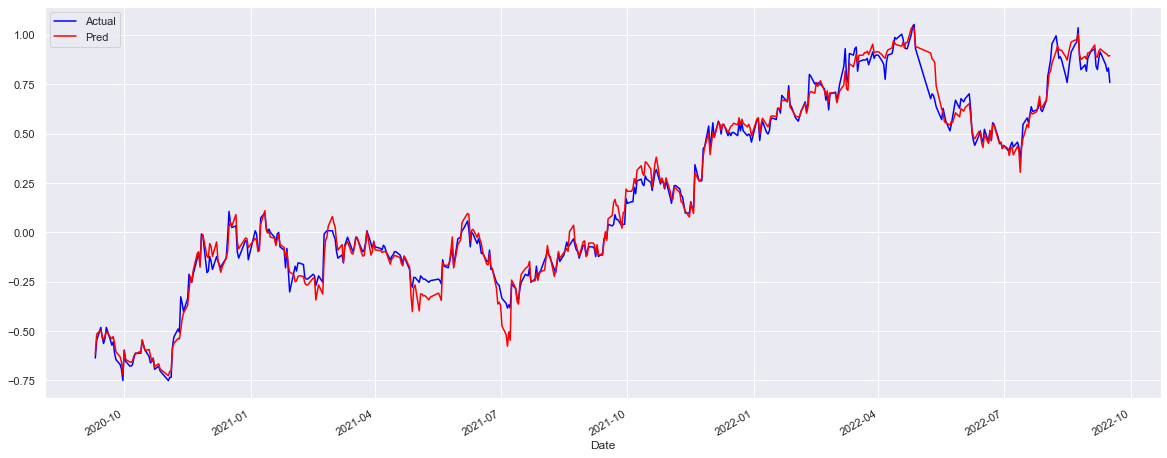

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/tlkm_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2725.171387,2700.0
2020-09-11,2848.323242,2810.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

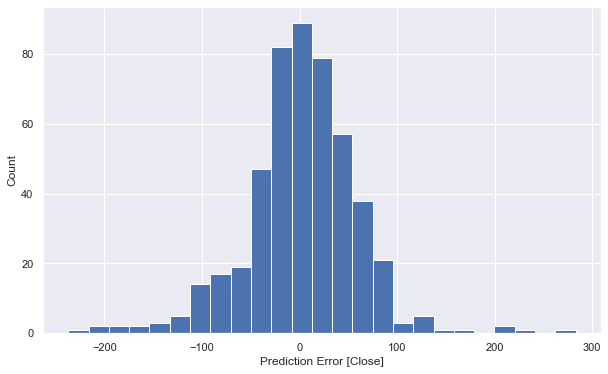

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

58.00923320300918

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

1.1426582326201764

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9895504380697284

### Save Model

In [28]:
# Save model
model.save_model('./models/tlkm.json')